# 环境配置

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz 
from sklearn import metrics
from sklearn.metrics import roc_curve, auc 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
import eli5 
from eli5.sklearn import PermutationImportance

In [2]:
import shap 
from pdpbox import pdp, info_plots 
np.random.seed(2022) 

pd.options.mode.chained_assignment = None  
%matplotlib inline

In [3]:
#查看当下路径
import os
print(os.getcwd())
os.chdir("/share/home/linmiao/bio/2022_heartEC_scRNA/mRNA/230508_3Data")
print(os.getcwd())

/share/home/linmiao/bio/2022_heartEC_scRNA/mRNA/230508_3Data
/share/home/linmiao/bio/2022_heartEC_scRNA/mRNA/230508_3Data


# Exploratory Data Analysis

In [4]:
# 导入数据
dc = pd.read_csv('./discovery/discovery.csv', index_col=0)
# 输出首尾五行
dc.head()
#查看数据集一些信息 
dc.info()


<class 'pandas.core.frame.DataFrame'>
Index: 145 entries, 653513_mRNA to R59_mRNA
Columns: 176 entries, VEGFA to group
dtypes: float64(175), int64(1)
memory usage: 200.5+ KB


In [13]:
# 按需求导出20列
# Create a list of the 20 values
columns_to_extract = ['SERPINE1', 'THY1', 'GPR56', 'SOX18', 'ID1', 'PDGFRA', 'FAP', 'CCL2', 'TNFRSF12A', 'APOD',
        'CTGF', 'CX3CL1', 'ITGA5', 'ARHGAP24', 'WARS', 'DLL1', 'PDGFRB', 'COL4A2', 'COL4A1', 'NOTCH3', 'group']

# Create a DataFrame
dc_20 = dc[columns_to_extract]
print(dc_20)

# Export the DataFrame to a CSV file
dc_20.to_csv('./0512_Features/top20_discovery.csv', index=False)

                SERPINE1       THY1     GPR56      SOX18       ID1    PDGFRA  \
653513_mRNA     79.47305  124.08090  207.0599  1247.2410  347.6941  192.8658   
647527_mRNA     82.78197   80.07734  173.8271   825.0454  234.6814  205.8048   
634021_mRNA     69.83177  101.62040  204.2791  1236.5550  274.6505  155.6794   
43_mRNA         68.51680   82.34479  196.8898   918.6678  310.2286  169.2236   
5059_mRNA      257.38570  115.11940  535.5770  2427.2770  610.0202  554.4730   
...                  ...        ...       ...        ...       ...       ...   
5033_mRNA     1364.27800  107.48790  354.8529  2212.1870  406.6346  596.7657   
R58_mRNA       129.08940  127.10510  233.5184   590.3930  285.8661  298.1889   
673482_mRNA     82.76012  124.04790  203.1692  1044.6220  219.9827  234.8759   
R656518_mRNA    74.62241   71.00110  219.3955  1136.8460  244.4054  220.5732   
R59_mRNA        77.95915  150.94540  213.3754  1140.1980  287.3901  547.6221   

                    FAP      CCL2  TNFR

In [5]:
os.chdir("/share/home/linmiao/bio/2022_heartEC_scRNA/mRNA/230508_3Data/validation1")
print(os.getcwd())
# Load the external validation set 1
V1 = pd.read_csv('validation1_new.csv', index_col=0)  # Assuming the external validation set is in a CSV file named 'validation1.csv'

/share/home/linmiao/bio/2022_heartEC_scRNA/mRNA/230508_3Data/validation1


In [7]:
os.chdir("/share/home/linmiao/bio/2022_heartEC_scRNA/mRNA/230508_3Data")
# 按需求导出20列
# Create a list of the 20 values
columns_to_extract = ['SERPINE1', 'THY1', 'GPR56', 'SOX18', 'ID1', 'PDGFRA', 'FAP', 'CCL2', 'TNFRSF12A', 'APOD',
        'CTGF', 'CX3CL1', 'ITGA5', 'ARHGAP24', 'WARS', 'DLL1', 'PDGFRB', 'COL4A2', 'COL4A1', 'NOTCH3', 'group']

# Create a DataFrame
V1_20 = V1[columns_to_extract]
print(V1_20)

# Export the DataFrame to a CSV file
V1_20.to_csv('./0512_Features/top20_validation1.csv', index=False)

         SERPINE1       THY1     GPR56      SOX18        ID1     PDGFRA  \
C00055  11.421034  10.068701  5.023235   9.331736  12.538655  13.755820   
C00192  11.526367  11.802233  5.908476  10.902209  13.342457  13.242110   
P01067  17.711008  11.322503  5.600744   9.752113  12.371697  14.939851   
P01101  13.090002   9.079469  5.925516  10.803442  13.788684  12.919845   
P01121  11.606341   8.277559  6.214904   9.734907  12.738031  13.966947   
P01140  11.707812  10.061348  5.888425  12.119952  13.873356  13.398421   
P01155  15.682839  10.740026  5.729373   9.776186  12.830502  14.402799   
P01184  13.325822   8.258040  6.215780  10.698186  13.357373  14.512989   
P01199  16.097411   8.616460  6.281471  11.356793  13.828098  12.936364   
P01202  13.192127   8.063750  5.956919  12.002004  14.176862  13.498103   
P01211  12.365583   6.438002  6.283345   9.160468  12.352886  13.360041   
P01226  11.918127   7.993263  5.795134  11.505523  13.377041  12.752710   
P01259  12.810166   7.065

In [8]:
os.chdir("/share/home/linmiao/bio/2022_heartEC_scRNA/mRNA/230508_3Data/validation2")
print(os.getcwd())
# Load the external validation set 1
V2 = pd.read_csv('validation2.csv', index_col=0)  # Assuming the external validation set is in a CSV file named 'validation1.csv'
os.chdir("/share/home/linmiao/bio/2022_heartEC_scRNA/mRNA/230508_3Data")
# 按需求导出20列
# Create a list of the 20 values
columns_to_extract = ['SERPINE1', 'THY1', 'GPR56', 'SOX18', 'ID1', 'PDGFRA', 'FAP', 'CCL2', 'TNFRSF12A', 'APOD',
        'CTGF', 'CX3CL1', 'ITGA5', 'ARHGAP24', 'WARS', 'DLL1', 'PDGFRB', 'COL4A2', 'COL4A1', 'NOTCH3', 'group']

# Create a DataFrame
V2_20 = V2[columns_to_extract]
print(V2_20)

# Export the DataFrame to a CSV file
V2_20.to_csv('./0512_Features/top20_validation2.csv', index=False)

/share/home/linmiao/bio/2022_heartEC_scRNA/mRNA/230508_3Data/validation2
            SERPINE1  THY1     GPR56  SOX18  ID1  PDGFRA  FAP  CCL2  \
GSM4887610        42    26  5.023235     47  372     723   32    38   
GSM4887611        15     8  5.908476     46  356    1463   66   267   
GSM4887612      3569    55  5.600744     56  435    1416  207   343   
GSM4887613         5    43  5.925516     40  344     938    8    63   
GSM4887614      2224   400  6.214904     52  443    2365  120   265   
GSM4887615       152    75  6.012852     23  270     257   73    25   
GSM4887616       277    64  5.690640     47  457     385   52    66   
GSM4887617        40    25  5.353678     16  306     334   28    45   
GSM4887618        60    50  5.613634     27  170     239   12    35   
GSM4887619        74   166  5.910850     31  354     513   62    62   
GSM4887620        12    17  6.268800     23  310     402   14    25   
GSM4887621        90    40  5.512238     18  230     243   61    27   
GSM4

# 模型训练

In [9]:
os.chdir("/share/home/linmiao/bio/2022_heartEC_scRNA/mRNA/230508_3Data/0512_Features")
print(os.getcwd())

/share/home/linmiao/bio/2022_heartEC_scRNA/mRNA/230508_3Data/0512_Features


In [10]:
# 导入数据
dc = pd.read_csv('top20_discovery.csv')
# 输出首尾五行
print(dc.head())
#查看数据集一些信息 
dc.info()

    SERPINE1       THY1     GPR56      SOX18       ID1    PDGFRA        FAP  \
0   79.47305  124.08090  207.0599  1247.2410  347.6941  192.8658  131.16040   
1   82.78197   80.07734  173.8271   825.0454  234.6814  205.8048   99.92714   
2   69.83177  101.62040  204.2791  1236.5550  274.6505  155.6794   76.84469   
3   68.51680   82.34479  196.8898   918.6678  310.2286  169.2236  115.45400   
4  257.38570  115.11940  535.5770  2427.2770  610.0202  554.4730   96.55703   

       CCL2  TNFRSF12A      APOD  ...    CX3CL1     ITGA5  ARHGAP24      WARS  \
0  138.3245   326.1130  1830.829  ...  239.1460  368.2082  173.9474  589.4327   
1  158.4685   603.1927  3359.967  ...  239.4812  403.0229  213.4493  502.8085   
2  204.7034   223.0116  1830.209  ...  214.8284  245.2247  140.1534  459.0861   
3  267.5554   534.8828  2213.520  ...  256.7303  260.6429  174.3299  518.6654   
4  460.4003   255.1343  3075.352  ...  269.6849  825.2678  110.1583  990.4932   

       DLL1    PDGFRB    COL4A2     CO

In [11]:
# 从dc中提取变量特征和目标变量
X = np.log(dc.drop('group', axis=1))
print(X.head())
Y = dc['group']

# 将数据切分成训练集和测试集
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1234,shuffle=True, stratify=None)

   SERPINE1      THY1     GPR56     SOX18       ID1    PDGFRA       FAP  \
0  4.375418  4.820934  5.333008  7.128689  5.851323  5.261995  4.876421   
1  4.416210  4.382993  5.158061  6.715438  5.458229  5.326928  4.604441   
2  4.246089  4.621244  5.319487  7.120085  5.615499  5.047799  4.341786   
3  4.227079  4.410915  5.282644  6.822925  5.737309  5.131221  4.748872   
4  5.550576  4.745970  6.283345  7.794525  6.413492  6.318018  4.570134   

       CCL2  TNFRSF12A      APOD      CTGF    CX3CL1     ITGA5  ARHGAP24  \
0  4.929602   5.787244  7.512524  6.631527  5.477074  5.908649  5.158753   
1  5.065556   6.402237  8.119686  6.752062  5.478475  5.998993  5.363399   
2  5.321562   5.407224  7.512185  5.820258  5.369840  5.502175  4.942738   
3  5.589327   6.282048  7.702339  7.122607  5.548026  5.563151  5.160949   
4  6.132096   5.541790  8.031175  7.320085  5.597254  6.715708  4.701918   

       WARS      DLL1    PDGFRB    COL4A2    COL4A1    NOTCH3  
0  6.379161  5.220909  6.318

In [12]:
#训练CatBoost分类模型
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split

# Assuming you have already defined X_train, X_test, Y_train, and Y_test
# Initialize the CatBoost classifier
catboost_model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=8, random_seed=1234)
# Fit the model to the training data
catboost_model.fit(X_train, Y_train)
# Make predictions on the test data
predictions = catboost_model.predict(X_test)

0:	learn: 0.5836847	total: 64.7ms	remaining: 1m 4s
1:	learn: 0.5228974	total: 67ms	remaining: 33.4s
2:	learn: 0.4557175	total: 69.8ms	remaining: 23.2s
3:	learn: 0.3960966	total: 72ms	remaining: 17.9s
4:	learn: 0.3467598	total: 74.1ms	remaining: 14.7s
5:	learn: 0.3088931	total: 76.5ms	remaining: 12.7s
6:	learn: 0.2851557	total: 78.6ms	remaining: 11.2s
7:	learn: 0.2597239	total: 80.8ms	remaining: 10s
8:	learn: 0.2378919	total: 83ms	remaining: 9.14s
9:	learn: 0.2146088	total: 85.3ms	remaining: 8.44s
10:	learn: 0.1953281	total: 87.2ms	remaining: 7.84s
11:	learn: 0.1806317	total: 89.3ms	remaining: 7.36s
12:	learn: 0.1693589	total: 91.6ms	remaining: 6.95s
13:	learn: 0.1547009	total: 93.7ms	remaining: 6.6s
14:	learn: 0.1385643	total: 95.8ms	remaining: 6.29s
15:	learn: 0.1267083	total: 97.9ms	remaining: 6.02s
16:	learn: 0.1158992	total: 100ms	remaining: 5.79s
17:	learn: 0.1096086	total: 102ms	remaining: 5.58s
18:	learn: 0.1007411	total: 104ms	remaining: 5.39s
19:	learn: 0.0920991	total: 106ms	

180:	learn: 0.0039020	total: 442ms	remaining: 2s
181:	learn: 0.0038856	total: 444ms	remaining: 2s
182:	learn: 0.0038642	total: 446ms	remaining: 1.99s
183:	learn: 0.0038476	total: 448ms	remaining: 1.99s
184:	learn: 0.0038312	total: 450ms	remaining: 1.98s
185:	learn: 0.0038155	total: 452ms	remaining: 1.98s
186:	learn: 0.0038011	total: 454ms	remaining: 1.98s
187:	learn: 0.0037812	total: 457ms	remaining: 1.97s
188:	learn: 0.0037658	total: 459ms	remaining: 1.97s
189:	learn: 0.0037399	total: 461ms	remaining: 1.96s
190:	learn: 0.0037142	total: 463ms	remaining: 1.96s
191:	learn: 0.0036981	total: 465ms	remaining: 1.96s
192:	learn: 0.0036762	total: 470ms	remaining: 1.97s
193:	learn: 0.0036617	total: 473ms	remaining: 1.97s
194:	learn: 0.0036475	total: 475ms	remaining: 1.96s
195:	learn: 0.0036228	total: 478ms	remaining: 1.96s
196:	learn: 0.0036088	total: 480ms	remaining: 1.96s
197:	learn: 0.0035947	total: 482ms	remaining: 1.95s
198:	learn: 0.0035796	total: 484ms	remaining: 1.95s
199:	learn: 0.0035

362:	learn: 0.0021030	total: 819ms	remaining: 1.44s
363:	learn: 0.0020980	total: 821ms	remaining: 1.44s
364:	learn: 0.0020934	total: 823ms	remaining: 1.43s
365:	learn: 0.0020932	total: 825ms	remaining: 1.43s
366:	learn: 0.0020931	total: 827ms	remaining: 1.43s
367:	learn: 0.0020929	total: 829ms	remaining: 1.42s
368:	learn: 0.0020864	total: 831ms	remaining: 1.42s
369:	learn: 0.0020857	total: 833ms	remaining: 1.42s
370:	learn: 0.0020809	total: 835ms	remaining: 1.42s
371:	learn: 0.0020769	total: 837ms	remaining: 1.41s
372:	learn: 0.0020723	total: 839ms	remaining: 1.41s
373:	learn: 0.0020723	total: 840ms	remaining: 1.41s
374:	learn: 0.0020656	total: 842ms	remaining: 1.4s
375:	learn: 0.0020610	total: 844ms	remaining: 1.4s
376:	learn: 0.0020565	total: 847ms	remaining: 1.4s
377:	learn: 0.0020549	total: 849ms	remaining: 1.4s
378:	learn: 0.0020485	total: 851ms	remaining: 1.39s
379:	learn: 0.0020438	total: 853ms	remaining: 1.39s
380:	learn: 0.0020383	total: 855ms	remaining: 1.39s
381:	learn: 0.00

555:	learn: 0.0016207	total: 1.2s	remaining: 960ms
556:	learn: 0.0016179	total: 1.2s	remaining: 957ms
557:	learn: 0.0016153	total: 1.21s	remaining: 955ms
558:	learn: 0.0016153	total: 1.21s	remaining: 953ms
559:	learn: 0.0016127	total: 1.21s	remaining: 951ms
560:	learn: 0.0016125	total: 1.21s	remaining: 948ms
561:	learn: 0.0016126	total: 1.21s	remaining: 946ms
562:	learn: 0.0016094	total: 1.22s	remaining: 943ms
563:	learn: 0.0016094	total: 1.22s	remaining: 941ms
564:	learn: 0.0016066	total: 1.22s	remaining: 939ms
565:	learn: 0.0016066	total: 1.22s	remaining: 936ms
566:	learn: 0.0016038	total: 1.22s	remaining: 934ms
567:	learn: 0.0016036	total: 1.22s	remaining: 932ms
568:	learn: 0.0015992	total: 1.23s	remaining: 929ms
569:	learn: 0.0015990	total: 1.23s	remaining: 927ms
570:	learn: 0.0015961	total: 1.23s	remaining: 925ms
571:	learn: 0.0015936	total: 1.23s	remaining: 922ms
572:	learn: 0.0015936	total: 1.23s	remaining: 920ms
573:	learn: 0.0015912	total: 1.24s	remaining: 918ms
574:	learn: 0.

753:	learn: 0.0013420	total: 1.59s	remaining: 518ms
754:	learn: 0.0013418	total: 1.59s	remaining: 516ms
755:	learn: 0.0013397	total: 1.59s	remaining: 514ms
756:	learn: 0.0013386	total: 1.59s	remaining: 512ms
757:	learn: 0.0013369	total: 1.6s	remaining: 510ms
758:	learn: 0.0013349	total: 1.6s	remaining: 507ms
759:	learn: 0.0013338	total: 1.6s	remaining: 505ms
760:	learn: 0.0013338	total: 1.6s	remaining: 503ms
761:	learn: 0.0013317	total: 1.6s	remaining: 501ms
762:	learn: 0.0013318	total: 1.6s	remaining: 499ms
763:	learn: 0.0013316	total: 1.61s	remaining: 497ms
764:	learn: 0.0013297	total: 1.61s	remaining: 494ms
765:	learn: 0.0013278	total: 1.61s	remaining: 492ms
766:	learn: 0.0013278	total: 1.61s	remaining: 490ms
767:	learn: 0.0013277	total: 1.61s	remaining: 488ms
768:	learn: 0.0013274	total: 1.62s	remaining: 486ms
769:	learn: 0.0013273	total: 1.62s	remaining: 484ms
770:	learn: 0.0013260	total: 1.62s	remaining: 481ms
771:	learn: 0.0013259	total: 1.62s	remaining: 479ms
772:	learn: 0.0013

953:	learn: 0.0011875	total: 1.97s	remaining: 95.2ms
954:	learn: 0.0011875	total: 1.98s	remaining: 93.1ms
955:	learn: 0.0011876	total: 1.98s	remaining: 91.1ms
956:	learn: 0.0011874	total: 1.98s	remaining: 89ms
957:	learn: 0.0011875	total: 1.98s	remaining: 86.9ms
958:	learn: 0.0011874	total: 1.98s	remaining: 84.8ms
959:	learn: 0.0011874	total: 1.99s	remaining: 82.7ms
960:	learn: 0.0011874	total: 1.99s	remaining: 80.7ms
961:	learn: 0.0011873	total: 1.99s	remaining: 78.6ms
962:	learn: 0.0011872	total: 1.99s	remaining: 76.5ms
963:	learn: 0.0011869	total: 1.99s	remaining: 74.4ms
964:	learn: 0.0011869	total: 2s	remaining: 72.4ms
965:	learn: 0.0011868	total: 2s	remaining: 70.3ms
966:	learn: 0.0011868	total: 2s	remaining: 68.2ms
967:	learn: 0.0011868	total: 2s	remaining: 66.1ms
968:	learn: 0.0011866	total: 2s	remaining: 64.1ms
969:	learn: 0.0011866	total: 2s	remaining: 62ms
970:	learn: 0.0011854	total: 2s	remaining: 59.9ms
971:	learn: 0.0011841	total: 2.01s	remaining: 57.8ms
972:	learn: 0.0011

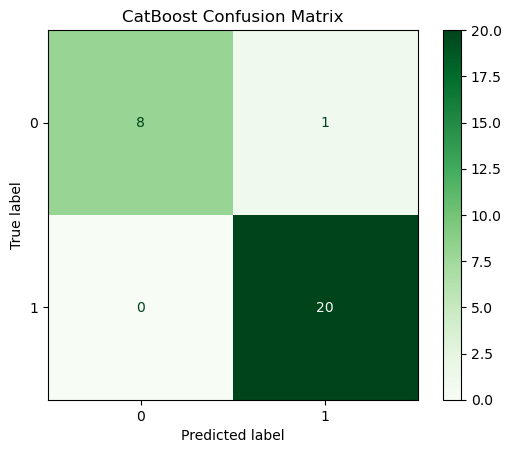

In [13]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

# Assuming you have already trained and made predictions with the CatBoost model
catboost_y_pred = catboost_model.predict(X_test)
# Calculate the confusion matrix
catboost_cm = confusion_matrix(Y_test, catboost_y_pred)
# Plot the confusion matrix
catboost_cm_plot = plot_confusion_matrix(catboost_model, X_test, Y_test, cmap='Greens')
catboost_cm_plot.ax_.set_title('CatBoost Confusion Matrix')

# Save the figure
plt.savefig("0512_catboost_confusion.jpg", dpi=450)

# Show the plot
plt.show()


In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 对测试集进行预测
predictions = catboost_model.predict(X_test)

# 计算准确率
accuracy = accuracy_score(Y_test, predictions)
# 计算精确率
precision = precision_score(Y_test, predictions)
# 计算召回率
recall = recall_score(Y_test, predictions)
# 计算 F1 分数
f1_score = f1_score(Y_test, predictions)
# 计算 AUC-ROC
auc_roc = roc_auc_score(Y_test, predictions)

# 将评估指标存储在一个字典中
evaluation_results = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1_score,
    'AUC-ROC': auc_roc
}

# 计算评估指标的均值和标准差
mean_results = {k: np.mean(v) for k, v in evaluation_results.items()}
std_results = {k: np.std(v) for k, v in evaluation_results.items()}

# 输出均值和标准差
for metric, mean in mean_results.items():
    print(f"{metric}: {mean:.4f} +/- {std_results[metric]:.4f}")

# 将评估结果输出到表格
import pandas as pd

df = pd.DataFrame([mean_results, std_results])
df.to_csv('evaluation_results.csv', index=False)


Accuracy: 0.9655 +/- 0.0000
Precision: 0.9524 +/- 0.0000
Recall: 1.0000 +/- 0.0000
F1 Score: 0.9756 +/- 0.0000
AUC-ROC: 0.9444 +/- 0.0000


# 分成train/val/test

9/3 Split (70/10/20)

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

# 从dc中提取变量特征和目标变量
X = dc.drop('group', axis=1)
Y = dc['group']

# 分割数据集
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1234, shuffle=True, stratify=None)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, test_size=0.30, random_state=1234, shuffle=True, stratify=None)

# 定义并训练模型
catboost_model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=8, random_seed=1234)
catboost_model.fit(X_train, Y_train, eval_set=(X_val, Y_val), early_stopping_rounds=100, verbose=False)

# 对模型性能进行评价
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
cv_results = cross_validate(catboost_model, X_train_val, Y_train_val, scoring=scoring, cv=5)

# 保存评估结果为DataFrame
result = {
    'model': type(catboost_model).__name__,
    'accuracy_mean': cv_results['test_accuracy'].mean(),
    'accuracy_std': cv_results['test_accuracy'].std(),
    'precision_mean': cv_results['test_precision'].mean(),
    'precision_std': cv_results['test_precision'].std(),
    'recall_mean': cv_results['test_recall'].mean(),
    'recall_std': cv_results['test_recall'].std(),
    'f1_score_mean': cv_results['test_f1'].mean(),
    'f1_score_std': cv_results['test_f1'].std(),
    'auc_roc_mean': cv_results['test_roc_auc'].mean(),
    'auc_roc_std': cv_results['test_roc_auc'].std()
}
result_df = pd.DataFrame(result, index=[0])
# 保存评估结果为CSV文件
result_df.to_csv('evaluation_results_93_Split.csv', index=False)


0:	learn: 0.5932037	total: 8.23ms	remaining: 8.22s
1:	learn: 0.5240950	total: 10.7ms	remaining: 5.31s
2:	learn: 0.4599335	total: 12.5ms	remaining: 4.16s
3:	learn: 0.4043774	total: 15.7ms	remaining: 3.9s
4:	learn: 0.3508284	total: 17.6ms	remaining: 3.5s
5:	learn: 0.3086077	total: 19.6ms	remaining: 3.24s
6:	learn: 0.2794592	total: 21.5ms	remaining: 3.05s
7:	learn: 0.2565356	total: 23.5ms	remaining: 2.92s
8:	learn: 0.2303041	total: 25.5ms	remaining: 2.8s
9:	learn: 0.2117570	total: 27.4ms	remaining: 2.71s
10:	learn: 0.1987127	total: 29.3ms	remaining: 2.64s
11:	learn: 0.1800068	total: 31.3ms	remaining: 2.58s
12:	learn: 0.1679736	total: 33.3ms	remaining: 2.53s
13:	learn: 0.1509758	total: 35.2ms	remaining: 2.48s
14:	learn: 0.1351814	total: 37.6ms	remaining: 2.47s
15:	learn: 0.1273856	total: 42.3ms	remaining: 2.6s
16:	learn: 0.1158024	total: 43.7ms	remaining: 2.53s
17:	learn: 0.1049476	total: 45.8ms	remaining: 2.5s
18:	learn: 0.0996802	total: 47.9ms	remaining: 2.47s
19:	learn: 0.0950223	total:

196:	learn: 0.0037749	total: 389ms	remaining: 1.58s
197:	learn: 0.0037575	total: 391ms	remaining: 1.58s
198:	learn: 0.0037357	total: 393ms	remaining: 1.58s
199:	learn: 0.0037186	total: 395ms	remaining: 1.58s
200:	learn: 0.0036972	total: 397ms	remaining: 1.58s
201:	learn: 0.0036805	total: 399ms	remaining: 1.57s
202:	learn: 0.0036600	total: 401ms	remaining: 1.57s
203:	learn: 0.0036439	total: 403ms	remaining: 1.57s
204:	learn: 0.0036234	total: 404ms	remaining: 1.57s
205:	learn: 0.0036073	total: 406ms	remaining: 1.57s
206:	learn: 0.0035874	total: 408ms	remaining: 1.56s
207:	learn: 0.0035716	total: 410ms	remaining: 1.56s
208:	learn: 0.0035525	total: 412ms	remaining: 1.56s
209:	learn: 0.0035368	total: 414ms	remaining: 1.56s
210:	learn: 0.0035178	total: 416ms	remaining: 1.55s
211:	learn: 0.0035025	total: 418ms	remaining: 1.55s
212:	learn: 0.0034837	total: 420ms	remaining: 1.55s
213:	learn: 0.0034689	total: 422ms	remaining: 1.55s
214:	learn: 0.0034505	total: 424ms	remaining: 1.55s
215:	learn: 

409:	learn: 0.0022592	total: 764ms	remaining: 1.1s
410:	learn: 0.0022545	total: 766ms	remaining: 1.1s
411:	learn: 0.0022478	total: 768ms	remaining: 1.09s
412:	learn: 0.0022477	total: 770ms	remaining: 1.09s
413:	learn: 0.0022476	total: 771ms	remaining: 1.09s
414:	learn: 0.0022476	total: 773ms	remaining: 1.09s
415:	learn: 0.0022476	total: 774ms	remaining: 1.09s
416:	learn: 0.0022476	total: 776ms	remaining: 1.08s
417:	learn: 0.0022474	total: 778ms	remaining: 1.08s
418:	learn: 0.0022474	total: 779ms	remaining: 1.08s
419:	learn: 0.0022474	total: 781ms	remaining: 1.08s
420:	learn: 0.0022473	total: 782ms	remaining: 1.08s
421:	learn: 0.0022472	total: 784ms	remaining: 1.07s
422:	learn: 0.0022446	total: 786ms	remaining: 1.07s
423:	learn: 0.0022428	total: 787ms	remaining: 1.07s
424:	learn: 0.0022391	total: 789ms	remaining: 1.07s
425:	learn: 0.0022390	total: 791ms	remaining: 1.06s
426:	learn: 0.0022323	total: 793ms	remaining: 1.06s
427:	learn: 0.0022285	total: 794ms	remaining: 1.06s
428:	learn: 0.

634:	learn: 0.0019677	total: 1.14s	remaining: 657ms
635:	learn: 0.0019677	total: 1.15s	remaining: 656ms
636:	learn: 0.0019677	total: 1.15s	remaining: 654ms
637:	learn: 0.0019676	total: 1.15s	remaining: 652ms
638:	learn: 0.0019674	total: 1.15s	remaining: 650ms
639:	learn: 0.0019674	total: 1.15s	remaining: 648ms
640:	learn: 0.0019673	total: 1.15s	remaining: 646ms
641:	learn: 0.0019672	total: 1.16s	remaining: 644ms
642:	learn: 0.0019671	total: 1.16s	remaining: 642ms
643:	learn: 0.0019669	total: 1.16s	remaining: 641ms
644:	learn: 0.0019669	total: 1.16s	remaining: 639ms
645:	learn: 0.0019668	total: 1.16s	remaining: 637ms
646:	learn: 0.0019667	total: 1.16s	remaining: 635ms
647:	learn: 0.0019667	total: 1.17s	remaining: 633ms
648:	learn: 0.0019667	total: 1.17s	remaining: 631ms
649:	learn: 0.0019666	total: 1.17s	remaining: 629ms
650:	learn: 0.0019665	total: 1.17s	remaining: 627ms
651:	learn: 0.0019666	total: 1.17s	remaining: 625ms
652:	learn: 0.0019666	total: 1.17s	remaining: 624ms
653:	learn: 

863:	learn: 0.0018784	total: 1.52s	remaining: 240ms
864:	learn: 0.0018783	total: 1.52s	remaining: 238ms
865:	learn: 0.0018784	total: 1.53s	remaining: 236ms
866:	learn: 0.0018783	total: 1.53s	remaining: 234ms
867:	learn: 0.0018783	total: 1.53s	remaining: 233ms
868:	learn: 0.0018783	total: 1.53s	remaining: 231ms
869:	learn: 0.0018783	total: 1.53s	remaining: 229ms
870:	learn: 0.0018782	total: 1.53s	remaining: 227ms
871:	learn: 0.0018783	total: 1.54s	remaining: 226ms
872:	learn: 0.0018783	total: 1.54s	remaining: 224ms
873:	learn: 0.0018782	total: 1.54s	remaining: 222ms
874:	learn: 0.0018782	total: 1.54s	remaining: 220ms
875:	learn: 0.0018782	total: 1.54s	remaining: 218ms
876:	learn: 0.0018782	total: 1.54s	remaining: 217ms
877:	learn: 0.0018781	total: 1.55s	remaining: 215ms
878:	learn: 0.0018781	total: 1.55s	remaining: 213ms
879:	learn: 0.0018781	total: 1.55s	remaining: 211ms
880:	learn: 0.0018781	total: 1.55s	remaining: 210ms
881:	learn: 0.0018780	total: 1.55s	remaining: 208ms
882:	learn: 

45:	learn: 0.0278662	total: 92.3ms	remaining: 1.91s
46:	learn: 0.0272724	total: 94.3ms	remaining: 1.91s
47:	learn: 0.0266530	total: 96.3ms	remaining: 1.91s
48:	learn: 0.0257744	total: 98.2ms	remaining: 1.91s
49:	learn: 0.0242564	total: 99.4ms	remaining: 1.89s
50:	learn: 0.0236825	total: 101ms	remaining: 1.89s
51:	learn: 0.0230791	total: 103ms	remaining: 1.88s
52:	learn: 0.0225577	total: 105ms	remaining: 1.88s
53:	learn: 0.0220182	total: 107ms	remaining: 1.87s
54:	learn: 0.0215888	total: 109ms	remaining: 1.87s
55:	learn: 0.0211481	total: 111ms	remaining: 1.87s
56:	learn: 0.0206493	total: 113ms	remaining: 1.87s
57:	learn: 0.0200933	total: 115ms	remaining: 1.87s
58:	learn: 0.0197244	total: 117ms	remaining: 1.87s
59:	learn: 0.0194269	total: 119ms	remaining: 1.87s
60:	learn: 0.0190522	total: 121ms	remaining: 1.87s
61:	learn: 0.0186840	total: 123ms	remaining: 1.86s
62:	learn: 0.0182741	total: 125ms	remaining: 1.86s
63:	learn: 0.0178756	total: 127ms	remaining: 1.86s
64:	learn: 0.0174641	total

243:	learn: 0.0038624	total: 472ms	remaining: 1.46s
244:	learn: 0.0038491	total: 474ms	remaining: 1.46s
245:	learn: 0.0038358	total: 476ms	remaining: 1.46s
246:	learn: 0.0038228	total: 478ms	remaining: 1.46s
247:	learn: 0.0038099	total: 479ms	remaining: 1.45s
248:	learn: 0.0037971	total: 481ms	remaining: 1.45s
249:	learn: 0.0037842	total: 483ms	remaining: 1.45s
250:	learn: 0.0037717	total: 485ms	remaining: 1.45s
251:	learn: 0.0037590	total: 487ms	remaining: 1.45s
252:	learn: 0.0037467	total: 489ms	remaining: 1.44s
253:	learn: 0.0037342	total: 491ms	remaining: 1.44s
254:	learn: 0.0037221	total: 493ms	remaining: 1.44s
255:	learn: 0.0037099	total: 495ms	remaining: 1.44s
256:	learn: 0.0036980	total: 496ms	remaining: 1.44s
257:	learn: 0.0036857	total: 498ms	remaining: 1.43s
258:	learn: 0.0036741	total: 500ms	remaining: 1.43s
259:	learn: 0.0036623	total: 502ms	remaining: 1.43s
260:	learn: 0.0036499	total: 504ms	remaining: 1.43s
261:	learn: 0.0036375	total: 506ms	remaining: 1.43s
262:	learn: 

444:	learn: 0.0019513	total: 854ms	remaining: 1.06s
445:	learn: 0.0019444	total: 856ms	remaining: 1.06s
446:	learn: 0.0019376	total: 858ms	remaining: 1.06s
447:	learn: 0.0019330	total: 860ms	remaining: 1.06s
448:	learn: 0.0019275	total: 862ms	remaining: 1.06s
449:	learn: 0.0019249	total: 864ms	remaining: 1.05s
450:	learn: 0.0019189	total: 866ms	remaining: 1.05s
451:	learn: 0.0019134	total: 867ms	remaining: 1.05s
452:	learn: 0.0019122	total: 869ms	remaining: 1.05s
453:	learn: 0.0019062	total: 871ms	remaining: 1.05s
454:	learn: 0.0019025	total: 873ms	remaining: 1.04s
455:	learn: 0.0018977	total: 875ms	remaining: 1.04s
456:	learn: 0.0018912	total: 877ms	remaining: 1.04s
457:	learn: 0.0018863	total: 879ms	remaining: 1.04s
458:	learn: 0.0018804	total: 881ms	remaining: 1.04s
459:	learn: 0.0018760	total: 883ms	remaining: 1.04s
460:	learn: 0.0018724	total: 885ms	remaining: 1.03s
461:	learn: 0.0018689	total: 886ms	remaining: 1.03s
462:	learn: 0.0018654	total: 888ms	remaining: 1.03s
463:	learn: 

666:	learn: 0.0017969	total: 1.24s	remaining: 618ms
667:	learn: 0.0017969	total: 1.24s	remaining: 616ms
668:	learn: 0.0017969	total: 1.24s	remaining: 614ms
669:	learn: 0.0017969	total: 1.24s	remaining: 612ms
670:	learn: 0.0017969	total: 1.24s	remaining: 610ms
671:	learn: 0.0017969	total: 1.25s	remaining: 608ms
672:	learn: 0.0017969	total: 1.25s	remaining: 607ms
673:	learn: 0.0017969	total: 1.25s	remaining: 605ms
674:	learn: 0.0017969	total: 1.25s	remaining: 603ms
675:	learn: 0.0017969	total: 1.25s	remaining: 601ms
676:	learn: 0.0017969	total: 1.25s	remaining: 599ms
677:	learn: 0.0017969	total: 1.26s	remaining: 597ms
678:	learn: 0.0017969	total: 1.26s	remaining: 595ms
679:	learn: 0.0017969	total: 1.26s	remaining: 593ms
680:	learn: 0.0017969	total: 1.26s	remaining: 591ms
681:	learn: 0.0017969	total: 1.26s	remaining: 589ms
682:	learn: 0.0017969	total: 1.26s	remaining: 587ms
683:	learn: 0.0017969	total: 1.27s	remaining: 585ms
684:	learn: 0.0017969	total: 1.27s	remaining: 583ms
685:	learn: 

931:	learn: 0.0017969	total: 1.68s	remaining: 123ms
932:	learn: 0.0017969	total: 1.68s	remaining: 121ms
933:	learn: 0.0017969	total: 1.69s	remaining: 119ms
934:	learn: 0.0017969	total: 1.69s	remaining: 117ms
935:	learn: 0.0017969	total: 1.69s	remaining: 115ms
936:	learn: 0.0017969	total: 1.69s	remaining: 114ms
937:	learn: 0.0017969	total: 1.69s	remaining: 112ms
938:	learn: 0.0017969	total: 1.69s	remaining: 110ms
939:	learn: 0.0017969	total: 1.7s	remaining: 108ms
940:	learn: 0.0017969	total: 1.7s	remaining: 106ms
941:	learn: 0.0017969	total: 1.7s	remaining: 105ms
942:	learn: 0.0017969	total: 1.7s	remaining: 103ms
943:	learn: 0.0017969	total: 1.7s	remaining: 101ms
944:	learn: 0.0017969	total: 1.7s	remaining: 99.2ms
945:	learn: 0.0017969	total: 1.71s	remaining: 97.4ms
946:	learn: 0.0017969	total: 1.71s	remaining: 95.6ms
947:	learn: 0.0017969	total: 1.71s	remaining: 93.8ms
948:	learn: 0.0017969	total: 1.71s	remaining: 91.9ms
949:	learn: 0.0017969	total: 1.71s	remaining: 90.1ms
950:	learn: 

107:	learn: 0.0084789	total: 211ms	remaining: 1.74s
108:	learn: 0.0083832	total: 213ms	remaining: 1.74s
109:	learn: 0.0082905	total: 215ms	remaining: 1.74s
110:	learn: 0.0081570	total: 217ms	remaining: 1.74s
111:	learn: 0.0080291	total: 219ms	remaining: 1.73s
112:	learn: 0.0079061	total: 221ms	remaining: 1.73s
113:	learn: 0.0077920	total: 223ms	remaining: 1.73s
114:	learn: 0.0076822	total: 224ms	remaining: 1.73s
115:	learn: 0.0075767	total: 226ms	remaining: 1.72s
116:	learn: 0.0075088	total: 228ms	remaining: 1.72s
117:	learn: 0.0074082	total: 230ms	remaining: 1.72s
118:	learn: 0.0073107	total: 232ms	remaining: 1.72s
119:	learn: 0.0072278	total: 234ms	remaining: 1.72s
120:	learn: 0.0071354	total: 236ms	remaining: 1.71s
121:	learn: 0.0070464	total: 238ms	remaining: 1.71s
122:	learn: 0.0069596	total: 240ms	remaining: 1.71s
123:	learn: 0.0068838	total: 242ms	remaining: 1.71s
124:	learn: 0.0068018	total: 243ms	remaining: 1.7s
125:	learn: 0.0067220	total: 245ms	remaining: 1.7s
126:	learn: 0.

307:	learn: 0.0027744	total: 596ms	remaining: 1.34s
308:	learn: 0.0027665	total: 598ms	remaining: 1.34s
309:	learn: 0.0027568	total: 600ms	remaining: 1.33s
310:	learn: 0.0027492	total: 602ms	remaining: 1.33s
311:	learn: 0.0027425	total: 604ms	remaining: 1.33s
312:	learn: 0.0027330	total: 606ms	remaining: 1.33s
313:	learn: 0.0027256	total: 607ms	remaining: 1.33s
314:	learn: 0.0027161	total: 609ms	remaining: 1.32s
315:	learn: 0.0027086	total: 611ms	remaining: 1.32s
316:	learn: 0.0027014	total: 613ms	remaining: 1.32s
317:	learn: 0.0026925	total: 615ms	remaining: 1.32s
318:	learn: 0.0026860	total: 617ms	remaining: 1.32s
319:	learn: 0.0026770	total: 619ms	remaining: 1.31s
320:	learn: 0.0026698	total: 621ms	remaining: 1.31s
321:	learn: 0.0026625	total: 623ms	remaining: 1.31s
322:	learn: 0.0026541	total: 625ms	remaining: 1.31s
323:	learn: 0.0026468	total: 626ms	remaining: 1.31s
324:	learn: 0.0026405	total: 628ms	remaining: 1.3s
325:	learn: 0.0026317	total: 630ms	remaining: 1.3s
326:	learn: 0.

514:	learn: 0.0018457	total: 979ms	remaining: 922ms
515:	learn: 0.0018445	total: 981ms	remaining: 920ms
516:	learn: 0.0018412	total: 983ms	remaining: 918ms
517:	learn: 0.0018412	total: 985ms	remaining: 916ms
518:	learn: 0.0018412	total: 986ms	remaining: 914ms
519:	learn: 0.0018412	total: 988ms	remaining: 912ms
520:	learn: 0.0018412	total: 990ms	remaining: 910ms
521:	learn: 0.0018412	total: 991ms	remaining: 908ms
522:	learn: 0.0018412	total: 993ms	remaining: 906ms
523:	learn: 0.0018412	total: 995ms	remaining: 904ms
524:	learn: 0.0018412	total: 996ms	remaining: 901ms
525:	learn: 0.0018412	total: 998ms	remaining: 899ms
526:	learn: 0.0018412	total: 1000ms	remaining: 897ms
527:	learn: 0.0018412	total: 1s	remaining: 895ms
528:	learn: 0.0018412	total: 1s	remaining: 893ms
529:	learn: 0.0018412	total: 1s	remaining: 891ms
530:	learn: 0.0018412	total: 1.01s	remaining: 889ms
531:	learn: 0.0018412	total: 1.01s	remaining: 887ms
532:	learn: 0.0018412	total: 1.01s	remaining: 884ms
533:	learn: 0.001841

745:	learn: 0.0018412	total: 1.36s	remaining: 464ms
746:	learn: 0.0018412	total: 1.36s	remaining: 462ms
747:	learn: 0.0018412	total: 1.36s	remaining: 460ms
748:	learn: 0.0018412	total: 1.37s	remaining: 458ms
749:	learn: 0.0018412	total: 1.37s	remaining: 456ms
750:	learn: 0.0018412	total: 1.37s	remaining: 454ms
751:	learn: 0.0018412	total: 1.37s	remaining: 453ms
752:	learn: 0.0018412	total: 1.37s	remaining: 451ms
753:	learn: 0.0018412	total: 1.38s	remaining: 449ms
754:	learn: 0.0018412	total: 1.38s	remaining: 447ms
755:	learn: 0.0018412	total: 1.38s	remaining: 445ms
756:	learn: 0.0018412	total: 1.38s	remaining: 443ms
757:	learn: 0.0018412	total: 1.38s	remaining: 441ms
758:	learn: 0.0018412	total: 1.38s	remaining: 439ms
759:	learn: 0.0018412	total: 1.39s	remaining: 437ms
760:	learn: 0.0018412	total: 1.39s	remaining: 435ms
761:	learn: 0.0018412	total: 1.39s	remaining: 434ms
762:	learn: 0.0018412	total: 1.39s	remaining: 432ms
763:	learn: 0.0018412	total: 1.39s	remaining: 430ms
764:	learn: 

979:	learn: 0.0018412	total: 1.74s	remaining: 35.6ms
980:	learn: 0.0018412	total: 1.75s	remaining: 33.8ms
981:	learn: 0.0018412	total: 1.75s	remaining: 32ms
982:	learn: 0.0018412	total: 1.75s	remaining: 30.2ms
983:	learn: 0.0018412	total: 1.75s	remaining: 28.5ms
984:	learn: 0.0018412	total: 1.75s	remaining: 26.7ms
985:	learn: 0.0018412	total: 1.75s	remaining: 24.9ms
986:	learn: 0.0018412	total: 1.75s	remaining: 23.1ms
987:	learn: 0.0018412	total: 1.76s	remaining: 21.3ms
988:	learn: 0.0018412	total: 1.76s	remaining: 19.6ms
989:	learn: 0.0018412	total: 1.76s	remaining: 17.8ms
990:	learn: 0.0018412	total: 1.76s	remaining: 16ms
991:	learn: 0.0018412	total: 1.76s	remaining: 14.2ms
992:	learn: 0.0018412	total: 1.76s	remaining: 12.4ms
993:	learn: 0.0018412	total: 1.77s	remaining: 10.7ms
994:	learn: 0.0018412	total: 1.77s	remaining: 8.89ms
995:	learn: 0.0018412	total: 1.77s	remaining: 7.11ms
996:	learn: 0.0018412	total: 1.77s	remaining: 5.33ms
997:	learn: 0.0018412	total: 1.77s	remaining: 3.55

152:	learn: 0.0071981	total: 289ms	remaining: 1.6s
153:	learn: 0.0071414	total: 291ms	remaining: 1.6s
154:	learn: 0.0070961	total: 293ms	remaining: 1.59s
155:	learn: 0.0070510	total: 294ms	remaining: 1.59s
156:	learn: 0.0069970	total: 296ms	remaining: 1.59s
157:	learn: 0.0069533	total: 298ms	remaining: 1.59s
158:	learn: 0.0069104	total: 300ms	remaining: 1.59s
159:	learn: 0.0068682	total: 302ms	remaining: 1.58s
160:	learn: 0.0068171	total: 304ms	remaining: 1.58s
161:	learn: 0.0067757	total: 306ms	remaining: 1.58s
162:	learn: 0.0067345	total: 307ms	remaining: 1.58s
163:	learn: 0.0066851	total: 309ms	remaining: 1.58s
164:	learn: 0.0066457	total: 311ms	remaining: 1.57s
165:	learn: 0.0065977	total: 313ms	remaining: 1.57s
166:	learn: 0.0065592	total: 315ms	remaining: 1.57s
167:	learn: 0.0065129	total: 317ms	remaining: 1.57s
168:	learn: 0.0064762	total: 318ms	remaining: 1.57s
169:	learn: 0.0064401	total: 320ms	remaining: 1.56s
170:	learn: 0.0064044	total: 322ms	remaining: 1.56s
171:	learn: 0.

355:	learn: 0.0025057	total: 670ms	remaining: 1.21s
356:	learn: 0.0024895	total: 672ms	remaining: 1.21s
357:	learn: 0.0024815	total: 673ms	remaining: 1.21s
358:	learn: 0.0024737	total: 675ms	remaining: 1.21s
359:	learn: 0.0024646	total: 677ms	remaining: 1.2s
360:	learn: 0.0024437	total: 679ms	remaining: 1.2s
361:	learn: 0.0024361	total: 681ms	remaining: 1.2s
362:	learn: 0.0024284	total: 683ms	remaining: 1.2s
363:	learn: 0.0024210	total: 685ms	remaining: 1.2s
364:	learn: 0.0024209	total: 686ms	remaining: 1.19s
365:	learn: 0.0024209	total: 688ms	remaining: 1.19s
366:	learn: 0.0024209	total: 690ms	remaining: 1.19s
367:	learn: 0.0024209	total: 692ms	remaining: 1.19s
368:	learn: 0.0024209	total: 693ms	remaining: 1.19s
369:	learn: 0.0024209	total: 695ms	remaining: 1.18s
370:	learn: 0.0024209	total: 697ms	remaining: 1.18s
371:	learn: 0.0024209	total: 698ms	remaining: 1.18s
372:	learn: 0.0024209	total: 700ms	remaining: 1.18s
373:	learn: 0.0024209	total: 701ms	remaining: 1.17s
374:	learn: 0.002

582:	learn: 0.0024209	total: 1.05s	remaining: 753ms
583:	learn: 0.0024209	total: 1.05s	remaining: 751ms
584:	learn: 0.0024209	total: 1.06s	remaining: 749ms
585:	learn: 0.0024209	total: 1.06s	remaining: 747ms
586:	learn: 0.0024209	total: 1.06s	remaining: 745ms
587:	learn: 0.0024209	total: 1.06s	remaining: 744ms
588:	learn: 0.0024209	total: 1.06s	remaining: 742ms
589:	learn: 0.0024209	total: 1.06s	remaining: 740ms
590:	learn: 0.0024209	total: 1.07s	remaining: 738ms
591:	learn: 0.0024209	total: 1.07s	remaining: 736ms
592:	learn: 0.0024209	total: 1.07s	remaining: 734ms
593:	learn: 0.0024209	total: 1.07s	remaining: 732ms
594:	learn: 0.0024209	total: 1.07s	remaining: 730ms
595:	learn: 0.0024209	total: 1.07s	remaining: 728ms
596:	learn: 0.0024209	total: 1.08s	remaining: 726ms
597:	learn: 0.0024209	total: 1.08s	remaining: 725ms
598:	learn: 0.0024209	total: 1.08s	remaining: 723ms
599:	learn: 0.0024209	total: 1.08s	remaining: 721ms
600:	learn: 0.0024209	total: 1.08s	remaining: 719ms
601:	learn: 

808:	learn: 0.0024209	total: 1.44s	remaining: 339ms
809:	learn: 0.0024209	total: 1.44s	remaining: 337ms
810:	learn: 0.0024209	total: 1.44s	remaining: 335ms
811:	learn: 0.0024209	total: 1.44s	remaining: 334ms
812:	learn: 0.0024209	total: 1.44s	remaining: 332ms
813:	learn: 0.0024209	total: 1.44s	remaining: 330ms
814:	learn: 0.0024209	total: 1.45s	remaining: 328ms
815:	learn: 0.0024209	total: 1.45s	remaining: 326ms
816:	learn: 0.0024209	total: 1.45s	remaining: 325ms
817:	learn: 0.0024209	total: 1.45s	remaining: 323ms
818:	learn: 0.0024209	total: 1.45s	remaining: 321ms
819:	learn: 0.0024209	total: 1.45s	remaining: 319ms
820:	learn: 0.0024209	total: 1.46s	remaining: 317ms
821:	learn: 0.0024209	total: 1.46s	remaining: 316ms
822:	learn: 0.0024209	total: 1.46s	remaining: 314ms
823:	learn: 0.0024209	total: 1.46s	remaining: 312ms
824:	learn: 0.0024209	total: 1.46s	remaining: 310ms
825:	learn: 0.0024209	total: 1.46s	remaining: 308ms
826:	learn: 0.0024209	total: 1.47s	remaining: 307ms
827:	learn: 

0:	learn: 0.5833941	total: 5.61ms	remaining: 5.61s
1:	learn: 0.5037451	total: 7.53ms	remaining: 3.76s
2:	learn: 0.4283029	total: 9.66ms	remaining: 3.21s
3:	learn: 0.3802965	total: 11.8ms	remaining: 2.94s
4:	learn: 0.3242900	total: 13.9ms	remaining: 2.77s
5:	learn: 0.2886681	total: 15.8ms	remaining: 2.62s
6:	learn: 0.2590452	total: 17.8ms	remaining: 2.52s
7:	learn: 0.2388994	total: 19.7ms	remaining: 2.44s
8:	learn: 0.2133038	total: 21.5ms	remaining: 2.37s
9:	learn: 0.1976124	total: 23.6ms	remaining: 2.33s
10:	learn: 0.1820486	total: 25.4ms	remaining: 2.29s
11:	learn: 0.1638943	total: 27.3ms	remaining: 2.25s
12:	learn: 0.1535745	total: 29.2ms	remaining: 2.22s
13:	learn: 0.1370505	total: 31.1ms	remaining: 2.19s
14:	learn: 0.1241374	total: 33ms	remaining: 2.17s
15:	learn: 0.1170731	total: 34.9ms	remaining: 2.15s
16:	learn: 0.1086724	total: 36.8ms	remaining: 2.13s
17:	learn: 0.0997886	total: 38.7ms	remaining: 2.11s
18:	learn: 0.0935180	total: 40.6ms	remaining: 2.1s
19:	learn: 0.0874048	tota

204:	learn: 0.0028516	total: 387ms	remaining: 1.5s
205:	learn: 0.0028356	total: 389ms	remaining: 1.5s
206:	learn: 0.0028214	total: 391ms	remaining: 1.5s
207:	learn: 0.0028058	total: 393ms	remaining: 1.5s
208:	learn: 0.0027918	total: 395ms	remaining: 1.49s
209:	learn: 0.0027764	total: 397ms	remaining: 1.49s
210:	learn: 0.0027629	total: 399ms	remaining: 1.49s
211:	learn: 0.0027479	total: 401ms	remaining: 1.49s
212:	learn: 0.0027345	total: 403ms	remaining: 1.49s
213:	learn: 0.0027201	total: 405ms	remaining: 1.49s
214:	learn: 0.0027073	total: 407ms	remaining: 1.48s
215:	learn: 0.0026963	total: 409ms	remaining: 1.48s
216:	learn: 0.0026817	total: 410ms	remaining: 1.48s
217:	learn: 0.0026693	total: 413ms	remaining: 1.48s
218:	learn: 0.0026555	total: 414ms	remaining: 1.48s
219:	learn: 0.0026433	total: 416ms	remaining: 1.48s
220:	learn: 0.0026294	total: 418ms	remaining: 1.47s
221:	learn: 0.0026175	total: 420ms	remaining: 1.47s
222:	learn: 0.0026072	total: 422ms	remaining: 1.47s
223:	learn: 0.00

369:	learn: 0.0018452	total: 698ms	remaining: 1.19s
370:	learn: 0.0018451	total: 700ms	remaining: 1.19s
371:	learn: 0.0018451	total: 702ms	remaining: 1.18s
372:	learn: 0.0018417	total: 704ms	remaining: 1.18s
373:	learn: 0.0018417	total: 706ms	remaining: 1.18s
374:	learn: 0.0018416	total: 707ms	remaining: 1.18s
375:	learn: 0.0018416	total: 709ms	remaining: 1.18s
376:	learn: 0.0018415	total: 711ms	remaining: 1.17s
377:	learn: 0.0018367	total: 713ms	remaining: 1.17s
378:	learn: 0.0018317	total: 715ms	remaining: 1.17s
379:	learn: 0.0018270	total: 717ms	remaining: 1.17s
380:	learn: 0.0018214	total: 719ms	remaining: 1.17s
381:	learn: 0.0018212	total: 720ms	remaining: 1.17s
382:	learn: 0.0018164	total: 722ms	remaining: 1.16s
383:	learn: 0.0018125	total: 724ms	remaining: 1.16s
384:	learn: 0.0018079	total: 726ms	remaining: 1.16s
385:	learn: 0.0018078	total: 728ms	remaining: 1.16s
386:	learn: 0.0018078	total: 730ms	remaining: 1.16s
387:	learn: 0.0018076	total: 732ms	remaining: 1.15s
388:	learn: 

585:	learn: 0.0015951	total: 1.08s	remaining: 764ms
586:	learn: 0.0015951	total: 1.08s	remaining: 763ms
587:	learn: 0.0015949	total: 1.08s	remaining: 761ms
588:	learn: 0.0015948	total: 1.09s	remaining: 759ms
589:	learn: 0.0015949	total: 1.09s	remaining: 757ms
590:	learn: 0.0015948	total: 1.09s	remaining: 755ms
591:	learn: 0.0015946	total: 1.09s	remaining: 753ms
592:	learn: 0.0015946	total: 1.09s	remaining: 751ms
593:	learn: 0.0015946	total: 1.09s	remaining: 749ms
594:	learn: 0.0015946	total: 1.1s	remaining: 747ms
595:	learn: 0.0015944	total: 1.1s	remaining: 745ms
596:	learn: 0.0015944	total: 1.1s	remaining: 743ms
597:	learn: 0.0015917	total: 1.1s	remaining: 742ms
598:	learn: 0.0015902	total: 1.1s	remaining: 740ms
599:	learn: 0.0015898	total: 1.11s	remaining: 738ms
600:	learn: 0.0015864	total: 1.11s	remaining: 736ms
601:	learn: 0.0015831	total: 1.11s	remaining: 736ms
602:	learn: 0.0015810	total: 1.11s	remaining: 734ms
603:	learn: 0.0015809	total: 1.12s	remaining: 732ms
604:	learn: 0.001

811:	learn: 0.0015777	total: 1.47s	remaining: 340ms
812:	learn: 0.0015777	total: 1.47s	remaining: 338ms
813:	learn: 0.0015777	total: 1.47s	remaining: 336ms
814:	learn: 0.0015777	total: 1.47s	remaining: 334ms
815:	learn: 0.0015777	total: 1.47s	remaining: 332ms
816:	learn: 0.0015777	total: 1.48s	remaining: 330ms
817:	learn: 0.0015777	total: 1.48s	remaining: 329ms
818:	learn: 0.0015777	total: 1.48s	remaining: 327ms
819:	learn: 0.0015777	total: 1.48s	remaining: 325ms
820:	learn: 0.0015777	total: 1.48s	remaining: 323ms
821:	learn: 0.0015777	total: 1.48s	remaining: 321ms
822:	learn: 0.0015777	total: 1.49s	remaining: 319ms
823:	learn: 0.0015777	total: 1.49s	remaining: 318ms
824:	learn: 0.0015777	total: 1.49s	remaining: 316ms
825:	learn: 0.0015777	total: 1.49s	remaining: 314ms
826:	learn: 0.0015777	total: 1.49s	remaining: 312ms
827:	learn: 0.0015777	total: 1.49s	remaining: 310ms
828:	learn: 0.0015777	total: 1.5s	remaining: 308ms
829:	learn: 0.0015777	total: 1.5s	remaining: 307ms
830:	learn: 0.

In [16]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# 创建模型列表
models = [
    LogisticRegression(),
    SVC(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    CatBoostClassifier(),
    LGBMClassifier(),
    XGBClassifier(),
    KNeighborsClassifier(),
    MLPClassifier(),
    GradientBoostingClassifier(),
    DecisionTreeClassifier()
]

# 创建评估指标列表
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1_score': 'f1',
    'auc_roc': 'roc_auc'
}

# 执行交叉验证和模型评估
results = []
for model in models:
    cv_results = cross_validate(model, X_train, Y_train, cv=5, scoring=scoring)
    result = {
        'model': type(model).__name__,
        'accuracy_mean': cv_results['test_accuracy'].mean(),
        'accuracy_std': cv_results['test_accuracy'].std(),
        'precision_mean': cv_results['test_precision'].mean(),
        'precision_std': cv_results['test_precision'].std(),
        'recall_mean': cv_results['test_recall'].mean(),
        'recall_std': cv_results['test_recall'].std(),
        'f1_score_mean': cv_results['test_f1_score'].mean(),
        'f1_score_std': cv_results['test_f1_score'].std(),
        'auc_roc_mean': cv_results['test_auc_roc'].mean(),
        'auc_roc_std': cv_results['test_auc_roc'].std()
    }
    results.append(result)

# 将结果导出为CSV文件
results_df = pd.DataFrame(results)
results_df.to_csv('models_evaluation_93.csv', index=False)


Learning rate set to 0.003185
0:	learn: 0.6898940	total: 4.41ms	remaining: 4.4s
1:	learn: 0.6866125	total: 5.76ms	remaining: 2.87s
2:	learn: 0.6830522	total: 7.04ms	remaining: 2.34s
3:	learn: 0.6797677	total: 8.28ms	remaining: 2.06s
4:	learn: 0.6766101	total: 9.41ms	remaining: 1.87s
5:	learn: 0.6739855	total: 10.6ms	remaining: 1.75s
6:	learn: 0.6694861	total: 11.7ms	remaining: 1.66s
7:	learn: 0.6659586	total: 12.8ms	remaining: 1.58s
8:	learn: 0.6628749	total: 14ms	remaining: 1.54s
9:	learn: 0.6587781	total: 15.2ms	remaining: 1.5s
10:	learn: 0.6551735	total: 16.3ms	remaining: 1.47s
11:	learn: 0.6523639	total: 17.5ms	remaining: 1.44s
12:	learn: 0.6497128	total: 18.7ms	remaining: 1.42s
13:	learn: 0.6465206	total: 19.8ms	remaining: 1.4s
14:	learn: 0.6434988	total: 20.9ms	remaining: 1.37s
15:	learn: 0.6399562	total: 22ms	remaining: 1.35s
16:	learn: 0.6364541	total: 23.1ms	remaining: 1.33s
17:	learn: 0.6338162	total: 24.2ms	remaining: 1.32s
18:	learn: 0.6303197	total: 25.3ms	remaining: 1.31s

320:	learn: 0.1846613	total: 362ms	remaining: 766ms
321:	learn: 0.1842101	total: 363ms	remaining: 765ms
322:	learn: 0.1836700	total: 364ms	remaining: 764ms
323:	learn: 0.1831146	total: 366ms	remaining: 763ms
324:	learn: 0.1825778	total: 367ms	remaining: 762ms
325:	learn: 0.1820426	total: 368ms	remaining: 760ms
326:	learn: 0.1816210	total: 369ms	remaining: 759ms
327:	learn: 0.1809131	total: 370ms	remaining: 758ms
328:	learn: 0.1803109	total: 371ms	remaining: 757ms
329:	learn: 0.1798046	total: 372ms	remaining: 755ms
330:	learn: 0.1793785	total: 373ms	remaining: 754ms
331:	learn: 0.1787680	total: 374ms	remaining: 753ms
332:	learn: 0.1784747	total: 375ms	remaining: 752ms
333:	learn: 0.1780822	total: 376ms	remaining: 751ms
334:	learn: 0.1775953	total: 377ms	remaining: 749ms
335:	learn: 0.1770207	total: 378ms	remaining: 748ms
336:	learn: 0.1765614	total: 380ms	remaining: 747ms
337:	learn: 0.1760438	total: 381ms	remaining: 746ms
338:	learn: 0.1755120	total: 382ms	remaining: 745ms
339:	learn: 

485:	learn: 0.1166821	total: 547ms	remaining: 578ms
486:	learn: 0.1163975	total: 548ms	remaining: 577ms
487:	learn: 0.1161628	total: 549ms	remaining: 576ms
488:	learn: 0.1157749	total: 550ms	remaining: 575ms
489:	learn: 0.1154847	total: 551ms	remaining: 574ms
490:	learn: 0.1152761	total: 552ms	remaining: 573ms
491:	learn: 0.1150329	total: 553ms	remaining: 571ms
492:	learn: 0.1146866	total: 555ms	remaining: 570ms
493:	learn: 0.1144562	total: 556ms	remaining: 569ms
494:	learn: 0.1141968	total: 557ms	remaining: 568ms
495:	learn: 0.1139552	total: 558ms	remaining: 567ms
496:	learn: 0.1136916	total: 559ms	remaining: 566ms
497:	learn: 0.1133058	total: 560ms	remaining: 565ms
498:	learn: 0.1130467	total: 561ms	remaining: 564ms
499:	learn: 0.1127964	total: 563ms	remaining: 563ms
500:	learn: 0.1125035	total: 564ms	remaining: 561ms
501:	learn: 0.1122070	total: 565ms	remaining: 560ms
502:	learn: 0.1119291	total: 566ms	remaining: 559ms
503:	learn: 0.1115902	total: 567ms	remaining: 558ms
504:	learn: 

650:	learn: 0.0797804	total: 734ms	remaining: 394ms
651:	learn: 0.0796464	total: 735ms	remaining: 393ms
652:	learn: 0.0795315	total: 737ms	remaining: 391ms
653:	learn: 0.0793532	total: 738ms	remaining: 390ms
654:	learn: 0.0792318	total: 739ms	remaining: 389ms
655:	learn: 0.0790906	total: 740ms	remaining: 388ms
656:	learn: 0.0789223	total: 741ms	remaining: 387ms
657:	learn: 0.0787816	total: 742ms	remaining: 386ms
658:	learn: 0.0786020	total: 743ms	remaining: 385ms
659:	learn: 0.0784171	total: 744ms	remaining: 383ms
660:	learn: 0.0782951	total: 745ms	remaining: 382ms
661:	learn: 0.0780603	total: 746ms	remaining: 381ms
662:	learn: 0.0778327	total: 747ms	remaining: 380ms
663:	learn: 0.0776840	total: 748ms	remaining: 379ms
664:	learn: 0.0775009	total: 749ms	remaining: 378ms
665:	learn: 0.0773589	total: 751ms	remaining: 376ms
666:	learn: 0.0772006	total: 752ms	remaining: 375ms
667:	learn: 0.0770536	total: 753ms	remaining: 374ms
668:	learn: 0.0769289	total: 754ms	remaining: 373ms
669:	learn: 

817:	learn: 0.0578768	total: 922ms	remaining: 205ms
818:	learn: 0.0577431	total: 923ms	remaining: 204ms
819:	learn: 0.0576327	total: 924ms	remaining: 203ms
820:	learn: 0.0575527	total: 926ms	remaining: 202ms
821:	learn: 0.0574365	total: 927ms	remaining: 201ms
822:	learn: 0.0573293	total: 928ms	remaining: 200ms
823:	learn: 0.0572478	total: 929ms	remaining: 198ms
824:	learn: 0.0571605	total: 930ms	remaining: 197ms
825:	learn: 0.0570839	total: 931ms	remaining: 196ms
826:	learn: 0.0569713	total: 932ms	remaining: 195ms
827:	learn: 0.0568689	total: 933ms	remaining: 194ms
828:	learn: 0.0567416	total: 934ms	remaining: 193ms
829:	learn: 0.0566483	total: 936ms	remaining: 192ms
830:	learn: 0.0565454	total: 937ms	remaining: 190ms
831:	learn: 0.0563905	total: 938ms	remaining: 189ms
832:	learn: 0.0562958	total: 939ms	remaining: 188ms
833:	learn: 0.0562262	total: 940ms	remaining: 187ms
834:	learn: 0.0561377	total: 941ms	remaining: 186ms
835:	learn: 0.0560212	total: 942ms	remaining: 185ms
836:	learn: 

987:	learn: 0.0436772	total: 1.11s	remaining: 13.5ms
988:	learn: 0.0435974	total: 1.11s	remaining: 12.3ms
989:	learn: 0.0435147	total: 1.11s	remaining: 11.2ms
990:	learn: 0.0434420	total: 1.11s	remaining: 10.1ms
991:	learn: 0.0433499	total: 1.11s	remaining: 8.98ms
992:	learn: 0.0433020	total: 1.11s	remaining: 7.86ms
993:	learn: 0.0432489	total: 1.11s	remaining: 6.74ms
994:	learn: 0.0431717	total: 1.12s	remaining: 5.61ms
995:	learn: 0.0430559	total: 1.12s	remaining: 4.49ms
996:	learn: 0.0430014	total: 1.12s	remaining: 3.37ms
997:	learn: 0.0429523	total: 1.12s	remaining: 2.24ms
998:	learn: 0.0428989	total: 1.12s	remaining: 1.12ms
999:	learn: 0.0428306	total: 1.12s	remaining: 0us
Learning rate set to 0.003207
0:	learn: 0.6889099	total: 2.15ms	remaining: 2.15s
1:	learn: 0.6851343	total: 3.24ms	remaining: 1.62s
2:	learn: 0.6818759	total: 4.32ms	remaining: 1.44s
3:	learn: 0.6784456	total: 5.44ms	remaining: 1.35s
4:	learn: 0.6753116	total: 6.61ms	remaining: 1.31s
5:	learn: 0.6727135	total: 7.

277:	learn: 0.2247280	total: 312ms	remaining: 812ms
278:	learn: 0.2236768	total: 314ms	remaining: 811ms
279:	learn: 0.2225967	total: 315ms	remaining: 809ms
280:	learn: 0.2217386	total: 316ms	remaining: 808ms
281:	learn: 0.2209159	total: 317ms	remaining: 807ms
282:	learn: 0.2199778	total: 318ms	remaining: 806ms
283:	learn: 0.2192164	total: 319ms	remaining: 805ms
284:	learn: 0.2185038	total: 320ms	remaining: 804ms
285:	learn: 0.2176307	total: 322ms	remaining: 803ms
286:	learn: 0.2169561	total: 323ms	remaining: 801ms
287:	learn: 0.2159614	total: 324ms	remaining: 800ms
288:	learn: 0.2154039	total: 325ms	remaining: 799ms
289:	learn: 0.2147513	total: 326ms	remaining: 798ms
290:	learn: 0.2140567	total: 327ms	remaining: 797ms
291:	learn: 0.2130783	total: 328ms	remaining: 795ms
292:	learn: 0.2123633	total: 329ms	remaining: 794ms
293:	learn: 0.2117959	total: 330ms	remaining: 793ms
294:	learn: 0.2112807	total: 331ms	remaining: 792ms
295:	learn: 0.2107239	total: 332ms	remaining: 790ms
296:	learn: 

443:	learn: 0.1366487	total: 497ms	remaining: 623ms
444:	learn: 0.1362632	total: 498ms	remaining: 622ms
445:	learn: 0.1359028	total: 500ms	remaining: 621ms
446:	learn: 0.1356231	total: 501ms	remaining: 619ms
447:	learn: 0.1353341	total: 502ms	remaining: 618ms
448:	learn: 0.1348531	total: 503ms	remaining: 617ms
449:	learn: 0.1345187	total: 504ms	remaining: 616ms
450:	learn: 0.1342222	total: 505ms	remaining: 615ms
451:	learn: 0.1338804	total: 507ms	remaining: 614ms
452:	learn: 0.1335972	total: 508ms	remaining: 613ms
453:	learn: 0.1330837	total: 509ms	remaining: 612ms
454:	learn: 0.1327087	total: 510ms	remaining: 611ms
455:	learn: 0.1324753	total: 511ms	remaining: 610ms
456:	learn: 0.1322156	total: 512ms	remaining: 608ms
457:	learn: 0.1318415	total: 513ms	remaining: 607ms
458:	learn: 0.1314925	total: 514ms	remaining: 606ms
459:	learn: 0.1311944	total: 515ms	remaining: 605ms
460:	learn: 0.1308379	total: 516ms	remaining: 604ms
461:	learn: 0.1304429	total: 518ms	remaining: 603ms
462:	learn: 

613:	learn: 0.0903267	total: 685ms	remaining: 431ms
614:	learn: 0.0901325	total: 686ms	remaining: 430ms
615:	learn: 0.0899826	total: 687ms	remaining: 429ms
616:	learn: 0.0897626	total: 689ms	remaining: 427ms
617:	learn: 0.0895855	total: 690ms	remaining: 426ms
618:	learn: 0.0893616	total: 691ms	remaining: 425ms
619:	learn: 0.0891321	total: 692ms	remaining: 424ms
620:	learn: 0.0889282	total: 693ms	remaining: 423ms
621:	learn: 0.0887597	total: 694ms	remaining: 422ms
622:	learn: 0.0885726	total: 695ms	remaining: 421ms
623:	learn: 0.0884211	total: 697ms	remaining: 420ms
624:	learn: 0.0882376	total: 698ms	remaining: 419ms
625:	learn: 0.0880611	total: 699ms	remaining: 417ms
626:	learn: 0.0878750	total: 700ms	remaining: 416ms
627:	learn: 0.0876699	total: 701ms	remaining: 415ms
628:	learn: 0.0874947	total: 702ms	remaining: 414ms
629:	learn: 0.0872977	total: 704ms	remaining: 413ms
630:	learn: 0.0870862	total: 705ms	remaining: 412ms
631:	learn: 0.0868780	total: 706ms	remaining: 411ms
632:	learn: 

783:	learn: 0.0651637	total: 873ms	remaining: 241ms
784:	learn: 0.0650030	total: 875ms	remaining: 240ms
785:	learn: 0.0648672	total: 876ms	remaining: 238ms
786:	learn: 0.0647172	total: 877ms	remaining: 237ms
787:	learn: 0.0645975	total: 878ms	remaining: 236ms
788:	learn: 0.0644955	total: 879ms	remaining: 235ms
789:	learn: 0.0644031	total: 880ms	remaining: 234ms
790:	learn: 0.0643061	total: 881ms	remaining: 233ms
791:	learn: 0.0642000	total: 882ms	remaining: 232ms
792:	learn: 0.0640759	total: 883ms	remaining: 231ms
793:	learn: 0.0640002	total: 885ms	remaining: 229ms
794:	learn: 0.0639304	total: 886ms	remaining: 228ms
795:	learn: 0.0637988	total: 887ms	remaining: 227ms
796:	learn: 0.0637152	total: 888ms	remaining: 226ms
797:	learn: 0.0636231	total: 889ms	remaining: 225ms
798:	learn: 0.0634746	total: 890ms	remaining: 224ms
799:	learn: 0.0633597	total: 891ms	remaining: 223ms
800:	learn: 0.0632283	total: 892ms	remaining: 222ms
801:	learn: 0.0631142	total: 893ms	remaining: 221ms
802:	learn: 

952:	learn: 0.0495828	total: 1.06s	remaining: 52.4ms
953:	learn: 0.0495107	total: 1.06s	remaining: 51.2ms
954:	learn: 0.0494369	total: 1.06s	remaining: 50.1ms
955:	learn: 0.0493397	total: 1.06s	remaining: 49ms
956:	learn: 0.0492768	total: 1.07s	remaining: 47.9ms
957:	learn: 0.0492186	total: 1.07s	remaining: 46.8ms
958:	learn: 0.0491628	total: 1.07s	remaining: 45.7ms
959:	learn: 0.0490853	total: 1.07s	remaining: 44.6ms
960:	learn: 0.0489841	total: 1.07s	remaining: 43.4ms
961:	learn: 0.0489030	total: 1.07s	remaining: 42.3ms
962:	learn: 0.0488241	total: 1.07s	remaining: 41.2ms
963:	learn: 0.0487477	total: 1.07s	remaining: 40.1ms
964:	learn: 0.0486786	total: 1.07s	remaining: 39ms
965:	learn: 0.0486130	total: 1.08s	remaining: 37.9ms
966:	learn: 0.0485481	total: 1.08s	remaining: 36.8ms
967:	learn: 0.0484625	total: 1.08s	remaining: 35.7ms
968:	learn: 0.0483976	total: 1.08s	remaining: 34.5ms
969:	learn: 0.0483257	total: 1.08s	remaining: 33.4ms
970:	learn: 0.0482098	total: 1.08s	remaining: 32.3

249:	learn: 0.2352900	total: 282ms	remaining: 845ms
250:	learn: 0.2344657	total: 283ms	remaining: 844ms
251:	learn: 0.2334748	total: 284ms	remaining: 843ms
252:	learn: 0.2327744	total: 285ms	remaining: 842ms
253:	learn: 0.2321922	total: 286ms	remaining: 840ms
254:	learn: 0.2313023	total: 287ms	remaining: 839ms
255:	learn: 0.2303863	total: 288ms	remaining: 838ms
256:	learn: 0.2294426	total: 289ms	remaining: 837ms
257:	learn: 0.2286916	total: 290ms	remaining: 835ms
258:	learn: 0.2279070	total: 292ms	remaining: 834ms
259:	learn: 0.2270550	total: 293ms	remaining: 833ms
260:	learn: 0.2260720	total: 294ms	remaining: 832ms
261:	learn: 0.2250328	total: 295ms	remaining: 830ms
262:	learn: 0.2243298	total: 296ms	remaining: 829ms
263:	learn: 0.2236244	total: 297ms	remaining: 828ms
264:	learn: 0.2226499	total: 298ms	remaining: 827ms
265:	learn: 0.2221299	total: 299ms	remaining: 826ms
266:	learn: 0.2213244	total: 300ms	remaining: 825ms
267:	learn: 0.2203702	total: 302ms	remaining: 824ms
268:	learn: 

415:	learn: 0.1396031	total: 466ms	remaining: 655ms
416:	learn: 0.1391907	total: 468ms	remaining: 654ms
417:	learn: 0.1389049	total: 469ms	remaining: 654ms
418:	learn: 0.1383705	total: 471ms	remaining: 653ms
419:	learn: 0.1380456	total: 472ms	remaining: 652ms
420:	learn: 0.1376760	total: 474ms	remaining: 651ms
421:	learn: 0.1372906	total: 475ms	remaining: 650ms
422:	learn: 0.1369067	total: 476ms	remaining: 649ms
423:	learn: 0.1365836	total: 477ms	remaining: 648ms
424:	learn: 0.1362525	total: 478ms	remaining: 647ms
425:	learn: 0.1356912	total: 479ms	remaining: 645ms
426:	learn: 0.1352695	total: 480ms	remaining: 644ms
427:	learn: 0.1348904	total: 481ms	remaining: 643ms
428:	learn: 0.1345292	total: 482ms	remaining: 642ms
429:	learn: 0.1340547	total: 483ms	remaining: 641ms
430:	learn: 0.1337854	total: 485ms	remaining: 640ms
431:	learn: 0.1334557	total: 486ms	remaining: 638ms
432:	learn: 0.1330804	total: 487ms	remaining: 637ms
433:	learn: 0.1327385	total: 488ms	remaining: 636ms
434:	learn: 

579:	learn: 0.0930547	total: 655ms	remaining: 474ms
580:	learn: 0.0927872	total: 656ms	remaining: 473ms
581:	learn: 0.0926335	total: 657ms	remaining: 472ms
582:	learn: 0.0924410	total: 658ms	remaining: 471ms
583:	learn: 0.0921966	total: 659ms	remaining: 470ms
584:	learn: 0.0920271	total: 660ms	remaining: 468ms
585:	learn: 0.0918405	total: 661ms	remaining: 467ms
586:	learn: 0.0916020	total: 662ms	remaining: 466ms
587:	learn: 0.0914231	total: 664ms	remaining: 465ms
588:	learn: 0.0912424	total: 665ms	remaining: 464ms
589:	learn: 0.0910485	total: 666ms	remaining: 463ms
590:	learn: 0.0907915	total: 667ms	remaining: 461ms
591:	learn: 0.0906103	total: 668ms	remaining: 460ms
592:	learn: 0.0903652	total: 669ms	remaining: 459ms
593:	learn: 0.0901479	total: 670ms	remaining: 458ms
594:	learn: 0.0899447	total: 671ms	remaining: 457ms
595:	learn: 0.0897744	total: 672ms	remaining: 456ms
596:	learn: 0.0895318	total: 673ms	remaining: 455ms
597:	learn: 0.0892656	total: 675ms	remaining: 453ms
598:	learn: 

746:	learn: 0.0658356	total: 842ms	remaining: 285ms
747:	learn: 0.0657261	total: 843ms	remaining: 284ms
748:	learn: 0.0655801	total: 844ms	remaining: 283ms
749:	learn: 0.0654623	total: 845ms	remaining: 282ms
750:	learn: 0.0653654	total: 847ms	remaining: 281ms
751:	learn: 0.0652125	total: 848ms	remaining: 280ms
752:	learn: 0.0651104	total: 849ms	remaining: 278ms
753:	learn: 0.0649611	total: 850ms	remaining: 277ms
754:	learn: 0.0648349	total: 851ms	remaining: 276ms
755:	learn: 0.0647223	total: 852ms	remaining: 275ms
756:	learn: 0.0646101	total: 853ms	remaining: 274ms
757:	learn: 0.0645218	total: 854ms	remaining: 273ms
758:	learn: 0.0643896	total: 856ms	remaining: 272ms
759:	learn: 0.0642502	total: 857ms	remaining: 271ms
760:	learn: 0.0641004	total: 858ms	remaining: 269ms
761:	learn: 0.0639719	total: 859ms	remaining: 268ms
762:	learn: 0.0638688	total: 860ms	remaining: 267ms
763:	learn: 0.0637662	total: 861ms	remaining: 266ms
764:	learn: 0.0636821	total: 862ms	remaining: 265ms
765:	learn: 

915:	learn: 0.0492453	total: 1.03s	remaining: 94.4ms
916:	learn: 0.0491490	total: 1.03s	remaining: 93.3ms
917:	learn: 0.0490725	total: 1.03s	remaining: 92.2ms
918:	learn: 0.0490124	total: 1.03s	remaining: 91ms
919:	learn: 0.0489491	total: 1.03s	remaining: 89.9ms
920:	learn: 0.0488287	total: 1.03s	remaining: 88.8ms
921:	learn: 0.0487507	total: 1.04s	remaining: 87.7ms
922:	learn: 0.0486971	total: 1.04s	remaining: 86.5ms
923:	learn: 0.0485394	total: 1.04s	remaining: 85.4ms
924:	learn: 0.0484365	total: 1.04s	remaining: 84.3ms
925:	learn: 0.0483588	total: 1.04s	remaining: 83.2ms
926:	learn: 0.0482488	total: 1.04s	remaining: 82ms
927:	learn: 0.0481548	total: 1.04s	remaining: 80.9ms
928:	learn: 0.0480832	total: 1.04s	remaining: 79.8ms
929:	learn: 0.0480124	total: 1.04s	remaining: 78.7ms
930:	learn: 0.0479345	total: 1.05s	remaining: 77.6ms
931:	learn: 0.0478756	total: 1.05s	remaining: 76.4ms
932:	learn: 0.0477415	total: 1.05s	remaining: 75.3ms
933:	learn: 0.0476489	total: 1.05s	remaining: 74.2

208:	learn: 0.2686726	total: 242ms	remaining: 914ms
209:	learn: 0.2677369	total: 243ms	remaining: 913ms
210:	learn: 0.2665581	total: 244ms	remaining: 911ms
211:	learn: 0.2655272	total: 245ms	remaining: 910ms
212:	learn: 0.2646304	total: 246ms	remaining: 909ms
213:	learn: 0.2636403	total: 247ms	remaining: 908ms
214:	learn: 0.2624777	total: 248ms	remaining: 906ms
215:	learn: 0.2612855	total: 249ms	remaining: 905ms
216:	learn: 0.2603362	total: 251ms	remaining: 904ms
217:	learn: 0.2594038	total: 252ms	remaining: 903ms
218:	learn: 0.2584377	total: 253ms	remaining: 902ms
219:	learn: 0.2575610	total: 254ms	remaining: 902ms
220:	learn: 0.2568380	total: 255ms	remaining: 900ms
221:	learn: 0.2559367	total: 257ms	remaining: 899ms
222:	learn: 0.2549891	total: 258ms	remaining: 898ms
223:	learn: 0.2540855	total: 259ms	remaining: 897ms
224:	learn: 0.2534480	total: 260ms	remaining: 895ms
225:	learn: 0.2524880	total: 261ms	remaining: 894ms
226:	learn: 0.2518749	total: 262ms	remaining: 892ms
227:	learn: 

370:	learn: 0.1553169	total: 424ms	remaining: 719ms
371:	learn: 0.1549672	total: 425ms	remaining: 718ms
372:	learn: 0.1544453	total: 426ms	remaining: 717ms
373:	learn: 0.1540079	total: 428ms	remaining: 716ms
374:	learn: 0.1535601	total: 429ms	remaining: 715ms
375:	learn: 0.1530467	total: 430ms	remaining: 714ms
376:	learn: 0.1527258	total: 431ms	remaining: 713ms
377:	learn: 0.1523834	total: 432ms	remaining: 712ms
378:	learn: 0.1518631	total: 434ms	remaining: 711ms
379:	learn: 0.1513829	total: 435ms	remaining: 710ms
380:	learn: 0.1509611	total: 437ms	remaining: 709ms
381:	learn: 0.1505598	total: 438ms	remaining: 709ms
382:	learn: 0.1501097	total: 440ms	remaining: 708ms
383:	learn: 0.1496942	total: 441ms	remaining: 707ms
384:	learn: 0.1493274	total: 442ms	remaining: 706ms
385:	learn: 0.1486223	total: 443ms	remaining: 705ms
386:	learn: 0.1482150	total: 444ms	remaining: 704ms
387:	learn: 0.1478292	total: 446ms	remaining: 703ms
388:	learn: 0.1473917	total: 447ms	remaining: 702ms
389:	learn: 

531:	learn: 0.1000946	total: 613ms	remaining: 539ms
532:	learn: 0.0998082	total: 614ms	remaining: 538ms
533:	learn: 0.0995229	total: 616ms	remaining: 537ms
534:	learn: 0.0991604	total: 617ms	remaining: 536ms
535:	learn: 0.0989469	total: 618ms	remaining: 535ms
536:	learn: 0.0987310	total: 619ms	remaining: 534ms
537:	learn: 0.0985451	total: 620ms	remaining: 533ms
538:	learn: 0.0982741	total: 621ms	remaining: 532ms
539:	learn: 0.0979748	total: 623ms	remaining: 530ms
540:	learn: 0.0976998	total: 624ms	remaining: 529ms
541:	learn: 0.0974934	total: 625ms	remaining: 528ms
542:	learn: 0.0972841	total: 626ms	remaining: 527ms
543:	learn: 0.0970254	total: 628ms	remaining: 526ms
544:	learn: 0.0968863	total: 629ms	remaining: 525ms
545:	learn: 0.0966527	total: 630ms	remaining: 524ms
546:	learn: 0.0964468	total: 631ms	remaining: 523ms
547:	learn: 0.0962277	total: 632ms	remaining: 522ms
548:	learn: 0.0960265	total: 634ms	remaining: 520ms
549:	learn: 0.0958585	total: 635ms	remaining: 519ms
550:	learn: 

691:	learn: 0.0704476	total: 801ms	remaining: 357ms
692:	learn: 0.0703263	total: 803ms	remaining: 356ms
693:	learn: 0.0701818	total: 804ms	remaining: 354ms
694:	learn: 0.0700336	total: 805ms	remaining: 353ms
695:	learn: 0.0698511	total: 806ms	remaining: 352ms
696:	learn: 0.0697134	total: 807ms	remaining: 351ms
697:	learn: 0.0695653	total: 808ms	remaining: 350ms
698:	learn: 0.0694326	total: 809ms	remaining: 349ms
699:	learn: 0.0692836	total: 811ms	remaining: 347ms
700:	learn: 0.0691238	total: 812ms	remaining: 346ms
701:	learn: 0.0690084	total: 813ms	remaining: 345ms
702:	learn: 0.0687940	total: 814ms	remaining: 344ms
703:	learn: 0.0686410	total: 815ms	remaining: 343ms
704:	learn: 0.0685222	total: 816ms	remaining: 342ms
705:	learn: 0.0684398	total: 818ms	remaining: 340ms
706:	learn: 0.0682894	total: 819ms	remaining: 339ms
707:	learn: 0.0681868	total: 820ms	remaining: 338ms
708:	learn: 0.0680459	total: 821ms	remaining: 337ms
709:	learn: 0.0678971	total: 822ms	remaining: 336ms
710:	learn: 

851:	learn: 0.0527900	total: 990ms	remaining: 172ms
852:	learn: 0.0527256	total: 991ms	remaining: 171ms
853:	learn: 0.0526312	total: 992ms	remaining: 170ms
854:	learn: 0.0525438	total: 993ms	remaining: 168ms
855:	learn: 0.0524464	total: 995ms	remaining: 167ms
856:	learn: 0.0523519	total: 996ms	remaining: 166ms
857:	learn: 0.0522901	total: 997ms	remaining: 165ms
858:	learn: 0.0522290	total: 998ms	remaining: 164ms
859:	learn: 0.0521292	total: 999ms	remaining: 163ms
860:	learn: 0.0520647	total: 1s	remaining: 161ms
861:	learn: 0.0519862	total: 1s	remaining: 160ms
862:	learn: 0.0519113	total: 1s	remaining: 159ms
863:	learn: 0.0518316	total: 1s	remaining: 158ms
864:	learn: 0.0517364	total: 1s	remaining: 157ms
865:	learn: 0.0516294	total: 1s	remaining: 156ms
866:	learn: 0.0515383	total: 1.01s	remaining: 154ms
867:	learn: 0.0514691	total: 1.01s	remaining: 153ms
868:	learn: 0.0513424	total: 1.01s	remaining: 152ms
869:	learn: 0.0512137	total: 1.01s	remaining: 151ms
870:	learn: 0.0511344	total: 1

153:	learn: 0.3395637	total: 181ms	remaining: 992ms
154:	learn: 0.3381728	total: 182ms	remaining: 990ms
155:	learn: 0.3369941	total: 183ms	remaining: 989ms
156:	learn: 0.3354936	total: 184ms	remaining: 987ms
157:	learn: 0.3338671	total: 185ms	remaining: 986ms
158:	learn: 0.3326144	total: 186ms	remaining: 986ms
159:	learn: 0.3311000	total: 187ms	remaining: 983ms
160:	learn: 0.3296341	total: 188ms	remaining: 981ms
161:	learn: 0.3285945	total: 190ms	remaining: 981ms
162:	learn: 0.3270315	total: 191ms	remaining: 979ms
163:	learn: 0.3258636	total: 192ms	remaining: 978ms
164:	learn: 0.3246000	total: 193ms	remaining: 976ms
165:	learn: 0.3231598	total: 194ms	remaining: 975ms
166:	learn: 0.3220646	total: 195ms	remaining: 973ms
167:	learn: 0.3210136	total: 196ms	remaining: 972ms
168:	learn: 0.3192505	total: 197ms	remaining: 971ms
169:	learn: 0.3181386	total: 199ms	remaining: 970ms
170:	learn: 0.3170969	total: 200ms	remaining: 968ms
171:	learn: 0.3159901	total: 201ms	remaining: 967ms
172:	learn: 

314:	learn: 0.1885158	total: 366ms	remaining: 795ms
315:	learn: 0.1879531	total: 367ms	remaining: 794ms
316:	learn: 0.1872029	total: 368ms	remaining: 793ms
317:	learn: 0.1863847	total: 369ms	remaining: 791ms
318:	learn: 0.1857296	total: 370ms	remaining: 790ms
319:	learn: 0.1852773	total: 371ms	remaining: 789ms
320:	learn: 0.1846138	total: 372ms	remaining: 788ms
321:	learn: 0.1840847	total: 374ms	remaining: 787ms
322:	learn: 0.1834920	total: 375ms	remaining: 786ms
323:	learn: 0.1830113	total: 376ms	remaining: 785ms
324:	learn: 0.1824190	total: 377ms	remaining: 783ms
325:	learn: 0.1817013	total: 378ms	remaining: 782ms
326:	learn: 0.1812382	total: 380ms	remaining: 781ms
327:	learn: 0.1808499	total: 381ms	remaining: 780ms
328:	learn: 0.1803108	total: 382ms	remaining: 779ms
329:	learn: 0.1797519	total: 383ms	remaining: 778ms
330:	learn: 0.1793015	total: 384ms	remaining: 777ms
331:	learn: 0.1786831	total: 385ms	remaining: 775ms
332:	learn: 0.1780330	total: 386ms	remaining: 774ms
333:	learn: 

474:	learn: 0.1194208	total: 553ms	remaining: 611ms
475:	learn: 0.1191123	total: 554ms	remaining: 610ms
476:	learn: 0.1187841	total: 555ms	remaining: 609ms
477:	learn: 0.1184614	total: 556ms	remaining: 608ms
478:	learn: 0.1182011	total: 558ms	remaining: 606ms
479:	learn: 0.1179053	total: 559ms	remaining: 605ms
480:	learn: 0.1175445	total: 560ms	remaining: 604ms
481:	learn: 0.1170236	total: 561ms	remaining: 603ms
482:	learn: 0.1168034	total: 562ms	remaining: 602ms
483:	learn: 0.1164666	total: 563ms	remaining: 600ms
484:	learn: 0.1161882	total: 564ms	remaining: 599ms
485:	learn: 0.1159606	total: 565ms	remaining: 598ms
486:	learn: 0.1157077	total: 567ms	remaining: 597ms
487:	learn: 0.1154150	total: 568ms	remaining: 596ms
488:	learn: 0.1151011	total: 569ms	remaining: 595ms
489:	learn: 0.1147650	total: 570ms	remaining: 593ms
490:	learn: 0.1144573	total: 571ms	remaining: 592ms
491:	learn: 0.1141513	total: 573ms	remaining: 591ms
492:	learn: 0.1138355	total: 574ms	remaining: 590ms
493:	learn: 

636:	learn: 0.0807324	total: 741ms	remaining: 422ms
637:	learn: 0.0805940	total: 742ms	remaining: 421ms
638:	learn: 0.0804487	total: 743ms	remaining: 420ms
639:	learn: 0.0802843	total: 744ms	remaining: 419ms
640:	learn: 0.0801031	total: 745ms	remaining: 417ms
641:	learn: 0.0799404	total: 746ms	remaining: 416ms
642:	learn: 0.0797450	total: 748ms	remaining: 415ms
643:	learn: 0.0796002	total: 749ms	remaining: 414ms
644:	learn: 0.0794304	total: 750ms	remaining: 413ms
645:	learn: 0.0792168	total: 751ms	remaining: 411ms
646:	learn: 0.0790482	total: 752ms	remaining: 410ms
647:	learn: 0.0789100	total: 753ms	remaining: 409ms
648:	learn: 0.0786983	total: 754ms	remaining: 408ms
649:	learn: 0.0785398	total: 755ms	remaining: 407ms
650:	learn: 0.0783918	total: 756ms	remaining: 405ms
651:	learn: 0.0781995	total: 758ms	remaining: 404ms
652:	learn: 0.0780115	total: 759ms	remaining: 403ms
653:	learn: 0.0778385	total: 760ms	remaining: 402ms
654:	learn: 0.0777220	total: 761ms	remaining: 401ms
655:	learn: 

799:	learn: 0.0589177	total: 928ms	remaining: 232ms
800:	learn: 0.0588282	total: 930ms	remaining: 231ms
801:	learn: 0.0587346	total: 931ms	remaining: 230ms
802:	learn: 0.0586219	total: 932ms	remaining: 229ms
803:	learn: 0.0585480	total: 933ms	remaining: 227ms
804:	learn: 0.0584118	total: 934ms	remaining: 226ms
805:	learn: 0.0582889	total: 935ms	remaining: 225ms
806:	learn: 0.0581768	total: 937ms	remaining: 224ms
807:	learn: 0.0580876	total: 938ms	remaining: 223ms
808:	learn: 0.0579806	total: 939ms	remaining: 222ms
809:	learn: 0.0578558	total: 940ms	remaining: 221ms
810:	learn: 0.0577661	total: 941ms	remaining: 219ms
811:	learn: 0.0576620	total: 943ms	remaining: 218ms
812:	learn: 0.0575800	total: 944ms	remaining: 217ms
813:	learn: 0.0574709	total: 945ms	remaining: 216ms
814:	learn: 0.0573514	total: 946ms	remaining: 215ms
815:	learn: 0.0572489	total: 947ms	remaining: 214ms
816:	learn: 0.0571488	total: 948ms	remaining: 212ms
817:	learn: 0.0570573	total: 949ms	remaining: 211ms
818:	learn: 

962:	learn: 0.0448395	total: 1.12s	remaining: 42.9ms
963:	learn: 0.0447919	total: 1.12s	remaining: 41.7ms
964:	learn: 0.0447324	total: 1.12s	remaining: 40.6ms
965:	learn: 0.0446455	total: 1.12s	remaining: 39.4ms
966:	learn: 0.0445787	total: 1.12s	remaining: 38.3ms
967:	learn: 0.0445183	total: 1.12s	remaining: 37.1ms
968:	learn: 0.0444588	total: 1.12s	remaining: 36ms
969:	learn: 0.0443838	total: 1.12s	remaining: 34.8ms
970:	learn: 0.0443278	total: 1.13s	remaining: 33.6ms
971:	learn: 0.0442739	total: 1.13s	remaining: 32.5ms
972:	learn: 0.0442061	total: 1.13s	remaining: 31.3ms
973:	learn: 0.0441469	total: 1.13s	remaining: 30.2ms
974:	learn: 0.0440847	total: 1.13s	remaining: 29ms
975:	learn: 0.0440312	total: 1.13s	remaining: 27.8ms
976:	learn: 0.0439496	total: 1.13s	remaining: 26.7ms
977:	learn: 0.0438831	total: 1.13s	remaining: 25.5ms
978:	learn: 0.0438273	total: 1.14s	remaining: 24.4ms
979:	learn: 0.0437822	total: 1.14s	remaining: 23.2ms
980:	learn: 0.0437237	total: 1.14s	remaining: 22ms

按10/2 Split (70/10/20) 区分

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

# 从dc中提取变量特征和目标变量
X = dc.drop('group', axis=1)
Y = dc['group']

# 分割数据集
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1234, shuffle=True, stratify=None)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, test_size=0.125, random_state=1234, shuffle=True, stratify=None)

# 定义并训练模型
catboost_model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=8, random_seed=1234)
catboost_model.fit(X_train, Y_train, eval_set=(X_val, Y_val), early_stopping_rounds=100, verbose=False)

# 对模型性能进行评价
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
cv_results = cross_validate(catboost_model, X_train_val, Y_train_val, scoring=scoring, cv=5)

# 保存评估结果为DataFrame
result = {
    'model': type(catboost_model).__name__,
    'accuracy_mean': cv_results['test_accuracy'].mean(),
    'accuracy_std': cv_results['test_accuracy'].std(),
    'precision_mean': cv_results['test_precision'].mean(),
    'precision_std': cv_results['test_precision'].std(),
    'recall_mean': cv_results['test_recall'].mean(),
    'recall_std': cv_results['test_recall'].std(),
    'f1_score_mean': cv_results['test_f1'].mean(),
    'f1_score_std': cv_results['test_f1'].std(),
    'auc_roc_mean': cv_results['test_roc_auc'].mean(),
    'auc_roc_std': cv_results['test_roc_auc'].std()
}
result_df = pd.DataFrame(result, index=[0])
# 保存评估结果为CSV文件
result_df.to_csv('evaluation_results_102_Split.csv', index=False)

0:	learn: 0.5932037	total: 4.66ms	remaining: 4.66s
1:	learn: 0.5240950	total: 6.8ms	remaining: 3.39s
2:	learn: 0.4599335	total: 8.89ms	remaining: 2.96s
3:	learn: 0.4043774	total: 10.8ms	remaining: 2.7s
4:	learn: 0.3508284	total: 17.9ms	remaining: 3.56s
5:	learn: 0.3086077	total: 19.7ms	remaining: 3.27s
6:	learn: 0.2794592	total: 21.8ms	remaining: 3.1s
7:	learn: 0.2565356	total: 23.8ms	remaining: 2.95s
8:	learn: 0.2303041	total: 25.6ms	remaining: 2.82s
9:	learn: 0.2117570	total: 27.7ms	remaining: 2.74s
10:	learn: 0.1987127	total: 29.6ms	remaining: 2.66s
11:	learn: 0.1800068	total: 31.5ms	remaining: 2.6s
12:	learn: 0.1679736	total: 33.5ms	remaining: 2.54s
13:	learn: 0.1509758	total: 35.3ms	remaining: 2.49s
14:	learn: 0.1351814	total: 37.2ms	remaining: 2.45s
15:	learn: 0.1273856	total: 40.2ms	remaining: 2.47s
16:	learn: 0.1158024	total: 41.4ms	remaining: 2.39s
17:	learn: 0.1049476	total: 43.4ms	remaining: 2.37s
18:	learn: 0.0996802	total: 45.3ms	remaining: 2.34s
19:	learn: 0.0950223	total

196:	learn: 0.0037749	total: 385ms	remaining: 1.57s
197:	learn: 0.0037575	total: 387ms	remaining: 1.57s
198:	learn: 0.0037357	total: 389ms	remaining: 1.56s
199:	learn: 0.0037186	total: 391ms	remaining: 1.56s
200:	learn: 0.0036972	total: 393ms	remaining: 1.56s
201:	learn: 0.0036805	total: 394ms	remaining: 1.56s
202:	learn: 0.0036600	total: 396ms	remaining: 1.56s
203:	learn: 0.0036439	total: 398ms	remaining: 1.55s
204:	learn: 0.0036234	total: 400ms	remaining: 1.55s
205:	learn: 0.0036073	total: 402ms	remaining: 1.55s
206:	learn: 0.0035874	total: 404ms	remaining: 1.55s
207:	learn: 0.0035716	total: 406ms	remaining: 1.54s
208:	learn: 0.0035525	total: 408ms	remaining: 1.54s
209:	learn: 0.0035368	total: 410ms	remaining: 1.54s
210:	learn: 0.0035178	total: 412ms	remaining: 1.54s
211:	learn: 0.0035025	total: 414ms	remaining: 1.54s
212:	learn: 0.0034837	total: 416ms	remaining: 1.54s
213:	learn: 0.0034689	total: 418ms	remaining: 1.53s
214:	learn: 0.0034505	total: 420ms	remaining: 1.53s
215:	learn: 

406:	learn: 0.0022747	total: 763ms	remaining: 1.11s
407:	learn: 0.0022679	total: 765ms	remaining: 1.11s
408:	learn: 0.0022647	total: 767ms	remaining: 1.11s
409:	learn: 0.0022592	total: 769ms	remaining: 1.11s
410:	learn: 0.0022545	total: 771ms	remaining: 1.1s
411:	learn: 0.0022478	total: 773ms	remaining: 1.1s
412:	learn: 0.0022477	total: 774ms	remaining: 1.1s
413:	learn: 0.0022476	total: 776ms	remaining: 1.1s
414:	learn: 0.0022476	total: 778ms	remaining: 1.1s
415:	learn: 0.0022476	total: 779ms	remaining: 1.09s
416:	learn: 0.0022476	total: 781ms	remaining: 1.09s
417:	learn: 0.0022474	total: 783ms	remaining: 1.09s
418:	learn: 0.0022474	total: 784ms	remaining: 1.09s
419:	learn: 0.0022474	total: 786ms	remaining: 1.08s
420:	learn: 0.0022473	total: 788ms	remaining: 1.08s
421:	learn: 0.0022472	total: 789ms	remaining: 1.08s
422:	learn: 0.0022446	total: 791ms	remaining: 1.08s
423:	learn: 0.0022428	total: 793ms	remaining: 1.08s
424:	learn: 0.0022391	total: 795ms	remaining: 1.07s
425:	learn: 0.002

630:	learn: 0.0019740	total: 1.15s	remaining: 670ms
631:	learn: 0.0019696	total: 1.15s	remaining: 668ms
632:	learn: 0.0019680	total: 1.15s	remaining: 666ms
633:	learn: 0.0019679	total: 1.15s	remaining: 664ms
634:	learn: 0.0019677	total: 1.15s	remaining: 663ms
635:	learn: 0.0019677	total: 1.15s	remaining: 661ms
636:	learn: 0.0019677	total: 1.16s	remaining: 659ms
637:	learn: 0.0019676	total: 1.16s	remaining: 657ms
638:	learn: 0.0019674	total: 1.16s	remaining: 655ms
639:	learn: 0.0019674	total: 1.16s	remaining: 653ms
640:	learn: 0.0019673	total: 1.16s	remaining: 651ms
641:	learn: 0.0019672	total: 1.16s	remaining: 649ms
642:	learn: 0.0019671	total: 1.17s	remaining: 647ms
643:	learn: 0.0019669	total: 1.17s	remaining: 645ms
644:	learn: 0.0019669	total: 1.17s	remaining: 644ms
645:	learn: 0.0019668	total: 1.17s	remaining: 642ms
646:	learn: 0.0019667	total: 1.17s	remaining: 640ms
647:	learn: 0.0019667	total: 1.17s	remaining: 638ms
648:	learn: 0.0019667	total: 1.18s	remaining: 636ms
649:	learn: 

854:	learn: 0.0018817	total: 1.52s	remaining: 258ms
855:	learn: 0.0018786	total: 1.52s	remaining: 256ms
856:	learn: 0.0018785	total: 1.52s	remaining: 255ms
857:	learn: 0.0018784	total: 1.53s	remaining: 253ms
858:	learn: 0.0018784	total: 1.53s	remaining: 251ms
859:	learn: 0.0018784	total: 1.53s	remaining: 249ms
860:	learn: 0.0018784	total: 1.53s	remaining: 247ms
861:	learn: 0.0018784	total: 1.53s	remaining: 246ms
862:	learn: 0.0018783	total: 1.53s	remaining: 244ms
863:	learn: 0.0018784	total: 1.54s	remaining: 242ms
864:	learn: 0.0018783	total: 1.54s	remaining: 240ms
865:	learn: 0.0018784	total: 1.54s	remaining: 238ms
866:	learn: 0.0018783	total: 1.54s	remaining: 237ms
867:	learn: 0.0018783	total: 1.54s	remaining: 235ms
868:	learn: 0.0018783	total: 1.54s	remaining: 233ms
869:	learn: 0.0018783	total: 1.55s	remaining: 231ms
870:	learn: 0.0018782	total: 1.55s	remaining: 229ms
871:	learn: 0.0018783	total: 1.55s	remaining: 228ms
872:	learn: 0.0018783	total: 1.55s	remaining: 226ms
873:	learn: 

41:	learn: 0.0313755	total: 84.5ms	remaining: 1.93s
42:	learn: 0.0304454	total: 86.4ms	remaining: 1.92s
43:	learn: 0.0295939	total: 88.4ms	remaining: 1.92s
44:	learn: 0.0288007	total: 90.4ms	remaining: 1.92s
45:	learn: 0.0278662	total: 92.4ms	remaining: 1.92s
46:	learn: 0.0272724	total: 94.3ms	remaining: 1.91s
47:	learn: 0.0266530	total: 96.2ms	remaining: 1.91s
48:	learn: 0.0257744	total: 98.1ms	remaining: 1.9s
49:	learn: 0.0242564	total: 99.3ms	remaining: 1.89s
50:	learn: 0.0236825	total: 102ms	remaining: 1.89s
51:	learn: 0.0230791	total: 104ms	remaining: 1.89s
52:	learn: 0.0225577	total: 106ms	remaining: 1.89s
53:	learn: 0.0220182	total: 108ms	remaining: 1.89s
54:	learn: 0.0215888	total: 110ms	remaining: 1.88s
55:	learn: 0.0211481	total: 111ms	remaining: 1.88s
56:	learn: 0.0206493	total: 114ms	remaining: 1.88s
57:	learn: 0.0200933	total: 115ms	remaining: 1.87s
58:	learn: 0.0197244	total: 117ms	remaining: 1.87s
59:	learn: 0.0194269	total: 119ms	remaining: 1.87s
60:	learn: 0.0190522	to

236:	learn: 0.0039583	total: 465ms	remaining: 1.5s
237:	learn: 0.0039442	total: 467ms	remaining: 1.49s
238:	learn: 0.0039301	total: 469ms	remaining: 1.49s
239:	learn: 0.0039164	total: 471ms	remaining: 1.49s
240:	learn: 0.0039029	total: 472ms	remaining: 1.49s
241:	learn: 0.0038890	total: 474ms	remaining: 1.49s
242:	learn: 0.0038757	total: 476ms	remaining: 1.48s
243:	learn: 0.0038624	total: 478ms	remaining: 1.48s
244:	learn: 0.0038491	total: 480ms	remaining: 1.48s
245:	learn: 0.0038358	total: 482ms	remaining: 1.48s
246:	learn: 0.0038228	total: 484ms	remaining: 1.48s
247:	learn: 0.0038099	total: 486ms	remaining: 1.47s
248:	learn: 0.0037971	total: 488ms	remaining: 1.47s
249:	learn: 0.0037842	total: 490ms	remaining: 1.47s
250:	learn: 0.0037717	total: 492ms	remaining: 1.47s
251:	learn: 0.0037590	total: 494ms	remaining: 1.47s
252:	learn: 0.0037467	total: 496ms	remaining: 1.46s
253:	learn: 0.0037342	total: 498ms	remaining: 1.46s
254:	learn: 0.0037221	total: 500ms	remaining: 1.46s
255:	learn: 0

433:	learn: 0.0020129	total: 848ms	remaining: 1.11s
434:	learn: 0.0020055	total: 850ms	remaining: 1.1s
435:	learn: 0.0020006	total: 852ms	remaining: 1.1s
436:	learn: 0.0019942	total: 854ms	remaining: 1.1s
437:	learn: 0.0019893	total: 856ms	remaining: 1.1s
438:	learn: 0.0019821	total: 858ms	remaining: 1.1s
439:	learn: 0.0019753	total: 860ms	remaining: 1.09s
440:	learn: 0.0019695	total: 862ms	remaining: 1.09s
441:	learn: 0.0019638	total: 864ms	remaining: 1.09s
442:	learn: 0.0019577	total: 865ms	remaining: 1.09s
443:	learn: 0.0019560	total: 867ms	remaining: 1.08s
444:	learn: 0.0019513	total: 869ms	remaining: 1.08s
445:	learn: 0.0019444	total: 871ms	remaining: 1.08s
446:	learn: 0.0019376	total: 873ms	remaining: 1.08s
447:	learn: 0.0019330	total: 875ms	remaining: 1.08s
448:	learn: 0.0019275	total: 877ms	remaining: 1.07s
449:	learn: 0.0019249	total: 879ms	remaining: 1.07s
450:	learn: 0.0019189	total: 881ms	remaining: 1.07s
451:	learn: 0.0019134	total: 882ms	remaining: 1.07s
452:	learn: 0.001

655:	learn: 0.0017969	total: 1.23s	remaining: 646ms
656:	learn: 0.0017969	total: 1.23s	remaining: 644ms
657:	learn: 0.0017969	total: 1.23s	remaining: 642ms
658:	learn: 0.0017969	total: 1.24s	remaining: 640ms
659:	learn: 0.0017969	total: 1.24s	remaining: 638ms
660:	learn: 0.0017969	total: 1.24s	remaining: 636ms
661:	learn: 0.0017969	total: 1.24s	remaining: 634ms
662:	learn: 0.0017969	total: 1.24s	remaining: 632ms
663:	learn: 0.0017969	total: 1.24s	remaining: 630ms
664:	learn: 0.0017969	total: 1.25s	remaining: 628ms
665:	learn: 0.0017969	total: 1.25s	remaining: 626ms
666:	learn: 0.0017969	total: 1.25s	remaining: 624ms
667:	learn: 0.0017969	total: 1.25s	remaining: 622ms
668:	learn: 0.0017969	total: 1.25s	remaining: 620ms
669:	learn: 0.0017969	total: 1.25s	remaining: 618ms
670:	learn: 0.0017969	total: 1.26s	remaining: 616ms
671:	learn: 0.0017969	total: 1.26s	remaining: 614ms
672:	learn: 0.0017969	total: 1.26s	remaining: 612ms
673:	learn: 0.0017969	total: 1.26s	remaining: 610ms
674:	learn: 

882:	learn: 0.0017969	total: 1.61s	remaining: 214ms
883:	learn: 0.0017969	total: 1.61s	remaining: 212ms
884:	learn: 0.0017969	total: 1.62s	remaining: 210ms
885:	learn: 0.0017969	total: 1.62s	remaining: 208ms
886:	learn: 0.0017969	total: 1.62s	remaining: 206ms
887:	learn: 0.0017969	total: 1.62s	remaining: 205ms
888:	learn: 0.0017969	total: 1.62s	remaining: 203ms
889:	learn: 0.0017969	total: 1.63s	remaining: 201ms
890:	learn: 0.0017969	total: 1.63s	remaining: 199ms
891:	learn: 0.0017969	total: 1.63s	remaining: 197ms
892:	learn: 0.0017969	total: 1.63s	remaining: 195ms
893:	learn: 0.0017969	total: 1.63s	remaining: 194ms
894:	learn: 0.0017969	total: 1.63s	remaining: 192ms
895:	learn: 0.0017969	total: 1.64s	remaining: 190ms
896:	learn: 0.0017969	total: 1.64s	remaining: 188ms
897:	learn: 0.0017969	total: 1.64s	remaining: 186ms
898:	learn: 0.0017969	total: 1.64s	remaining: 184ms
899:	learn: 0.0017969	total: 1.64s	remaining: 183ms
900:	learn: 0.0017969	total: 1.64s	remaining: 181ms
901:	learn: 

71:	learn: 0.0152581	total: 138ms	remaining: 1.78s
72:	learn: 0.0149423	total: 140ms	remaining: 1.78s
73:	learn: 0.0147068	total: 142ms	remaining: 1.78s
74:	learn: 0.0144016	total: 144ms	remaining: 1.78s
75:	learn: 0.0140023	total: 146ms	remaining: 1.78s
76:	learn: 0.0137733	total: 148ms	remaining: 1.78s
77:	learn: 0.0134576	total: 150ms	remaining: 1.77s
78:	learn: 0.0132548	total: 152ms	remaining: 1.77s
79:	learn: 0.0129895	total: 154ms	remaining: 1.77s
80:	learn: 0.0127396	total: 156ms	remaining: 1.77s
81:	learn: 0.0124799	total: 158ms	remaining: 1.76s
82:	learn: 0.0123169	total: 160ms	remaining: 1.76s
83:	learn: 0.0121028	total: 162ms	remaining: 1.76s
84:	learn: 0.0118928	total: 164ms	remaining: 1.76s
85:	learn: 0.0117301	total: 166ms	remaining: 1.76s
86:	learn: 0.0114733	total: 168ms	remaining: 1.76s
87:	learn: 0.0113234	total: 170ms	remaining: 1.76s
88:	learn: 0.0111304	total: 171ms	remaining: 1.75s
89:	learn: 0.0109501	total: 173ms	remaining: 1.75s
90:	learn: 0.0107874	total: 175

271:	learn: 0.0031129	total: 519ms	remaining: 1.39s
272:	learn: 0.0031007	total: 521ms	remaining: 1.39s
273:	learn: 0.0030909	total: 523ms	remaining: 1.39s
274:	learn: 0.0030810	total: 525ms	remaining: 1.38s
275:	learn: 0.0030715	total: 527ms	remaining: 1.38s
276:	learn: 0.0030595	total: 528ms	remaining: 1.38s
277:	learn: 0.0030500	total: 530ms	remaining: 1.38s
278:	learn: 0.0030414	total: 532ms	remaining: 1.37s
279:	learn: 0.0030298	total: 534ms	remaining: 1.37s
280:	learn: 0.0030205	total: 536ms	remaining: 1.37s
281:	learn: 0.0030110	total: 538ms	remaining: 1.37s
282:	learn: 0.0030030	total: 540ms	remaining: 1.37s
283:	learn: 0.0029917	total: 542ms	remaining: 1.36s
284:	learn: 0.0029805	total: 543ms	remaining: 1.36s
285:	learn: 0.0029715	total: 545ms	remaining: 1.36s
286:	learn: 0.0029623	total: 547ms	remaining: 1.36s
287:	learn: 0.0029534	total: 549ms	remaining: 1.36s
288:	learn: 0.0029427	total: 552ms	remaining: 1.36s
289:	learn: 0.0029340	total: 555ms	remaining: 1.36s
290:	learn: 

473:	learn: 0.0019496	total: 902ms	remaining: 1s
474:	learn: 0.0019495	total: 904ms	remaining: 999ms
475:	learn: 0.0019487	total: 906ms	remaining: 997ms
476:	learn: 0.0019453	total: 908ms	remaining: 995ms
477:	learn: 0.0019453	total: 909ms	remaining: 993ms
478:	learn: 0.0019410	total: 911ms	remaining: 991ms
479:	learn: 0.0019376	total: 913ms	remaining: 989ms
480:	learn: 0.0019342	total: 915ms	remaining: 987ms
481:	learn: 0.0019294	total: 917ms	remaining: 986ms
482:	learn: 0.0019260	total: 919ms	remaining: 984ms
483:	learn: 0.0019258	total: 921ms	remaining: 982ms
484:	learn: 0.0019248	total: 923ms	remaining: 980ms
485:	learn: 0.0019216	total: 925ms	remaining: 978ms
486:	learn: 0.0019211	total: 927ms	remaining: 976ms
487:	learn: 0.0019185	total: 928ms	remaining: 974ms
488:	learn: 0.0019149	total: 930ms	remaining: 972ms
489:	learn: 0.0019116	total: 932ms	remaining: 970ms
490:	learn: 0.0019103	total: 934ms	remaining: 968ms
491:	learn: 0.0019069	total: 936ms	remaining: 966ms
492:	learn: 0.0

697:	learn: 0.0018412	total: 1.29s	remaining: 556ms
698:	learn: 0.0018412	total: 1.29s	remaining: 555ms
699:	learn: 0.0018412	total: 1.29s	remaining: 553ms
700:	learn: 0.0018412	total: 1.29s	remaining: 551ms
701:	learn: 0.0018412	total: 1.29s	remaining: 549ms
702:	learn: 0.0018412	total: 1.29s	remaining: 547ms
703:	learn: 0.0018412	total: 1.3s	remaining: 545ms
704:	learn: 0.0018412	total: 1.3s	remaining: 543ms
705:	learn: 0.0018412	total: 1.3s	remaining: 541ms
706:	learn: 0.0018412	total: 1.3s	remaining: 539ms
707:	learn: 0.0018412	total: 1.3s	remaining: 537ms
708:	learn: 0.0018412	total: 1.3s	remaining: 535ms
709:	learn: 0.0018412	total: 1.31s	remaining: 534ms
710:	learn: 0.0018412	total: 1.31s	remaining: 532ms
711:	learn: 0.0018412	total: 1.31s	remaining: 530ms
712:	learn: 0.0018412	total: 1.31s	remaining: 528ms
713:	learn: 0.0018412	total: 1.31s	remaining: 526ms
714:	learn: 0.0018412	total: 1.31s	remaining: 524ms
715:	learn: 0.0018412	total: 1.32s	remaining: 522ms
716:	learn: 0.0018

925:	learn: 0.0018412	total: 1.67s	remaining: 133ms
926:	learn: 0.0018412	total: 1.67s	remaining: 132ms
927:	learn: 0.0018412	total: 1.67s	remaining: 130ms
928:	learn: 0.0018412	total: 1.67s	remaining: 128ms
929:	learn: 0.0018412	total: 1.68s	remaining: 126ms
930:	learn: 0.0018412	total: 1.68s	remaining: 124ms
931:	learn: 0.0018412	total: 1.68s	remaining: 122ms
932:	learn: 0.0018412	total: 1.68s	remaining: 121ms
933:	learn: 0.0018412	total: 1.68s	remaining: 119ms
934:	learn: 0.0018412	total: 1.68s	remaining: 117ms
935:	learn: 0.0018412	total: 1.68s	remaining: 115ms
936:	learn: 0.0018412	total: 1.69s	remaining: 113ms
937:	learn: 0.0018412	total: 1.69s	remaining: 112ms
938:	learn: 0.0018412	total: 1.69s	remaining: 110ms
939:	learn: 0.0018412	total: 1.69s	remaining: 108ms
940:	learn: 0.0018412	total: 1.69s	remaining: 106ms
941:	learn: 0.0018412	total: 1.7s	remaining: 104ms
942:	learn: 0.0018412	total: 1.7s	remaining: 103ms
943:	learn: 0.0018412	total: 1.7s	remaining: 101ms
944:	learn: 0.0

96:	learn: 0.0115443	total: 198ms	remaining: 1.84s
97:	learn: 0.0114085	total: 200ms	remaining: 1.84s
98:	learn: 0.0112760	total: 202ms	remaining: 1.84s
99:	learn: 0.0111524	total: 204ms	remaining: 1.83s
100:	learn: 0.0110481	total: 206ms	remaining: 1.83s
101:	learn: 0.0109245	total: 208ms	remaining: 1.83s
102:	learn: 0.0108124	total: 210ms	remaining: 1.83s
103:	learn: 0.0107014	total: 212ms	remaining: 1.82s
104:	learn: 0.0105859	total: 214ms	remaining: 1.82s
105:	learn: 0.0104733	total: 216ms	remaining: 1.82s
106:	learn: 0.0103625	total: 218ms	remaining: 1.82s
107:	learn: 0.0102543	total: 220ms	remaining: 1.81s
108:	learn: 0.0101494	total: 222ms	remaining: 1.81s
109:	learn: 0.0100454	total: 224ms	remaining: 1.81s
110:	learn: 0.0099522	total: 226ms	remaining: 1.81s
111:	learn: 0.0098535	total: 228ms	remaining: 1.81s
112:	learn: 0.0097639	total: 230ms	remaining: 1.8s
113:	learn: 0.0096691	total: 232ms	remaining: 1.8s
114:	learn: 0.0095828	total: 234ms	remaining: 1.8s
115:	learn: 0.00949

289:	learn: 0.0032597	total: 582ms	remaining: 1.42s
290:	learn: 0.0032475	total: 584ms	remaining: 1.42s
291:	learn: 0.0032354	total: 586ms	remaining: 1.42s
292:	learn: 0.0032239	total: 588ms	remaining: 1.42s
293:	learn: 0.0032123	total: 590ms	remaining: 1.42s
294:	learn: 0.0032007	total: 592ms	remaining: 1.41s
295:	learn: 0.0031895	total: 594ms	remaining: 1.41s
296:	learn: 0.0031779	total: 596ms	remaining: 1.41s
297:	learn: 0.0031666	total: 598ms	remaining: 1.41s
298:	learn: 0.0031557	total: 600ms	remaining: 1.41s
299:	learn: 0.0031446	total: 602ms	remaining: 1.4s
300:	learn: 0.0031315	total: 604ms	remaining: 1.4s
301:	learn: 0.0031207	total: 606ms	remaining: 1.4s
302:	learn: 0.0031079	total: 608ms	remaining: 1.4s
303:	learn: 0.0030953	total: 610ms	remaining: 1.4s
304:	learn: 0.0030828	total: 612ms	remaining: 1.39s
305:	learn: 0.0030704	total: 614ms	remaining: 1.39s
306:	learn: 0.0030599	total: 616ms	remaining: 1.39s
307:	learn: 0.0030476	total: 618ms	remaining: 1.39s
308:	learn: 0.003

498:	learn: 0.0024209	total: 963ms	remaining: 967ms
499:	learn: 0.0024209	total: 965ms	remaining: 965ms
500:	learn: 0.0024209	total: 967ms	remaining: 963ms
501:	learn: 0.0024209	total: 969ms	remaining: 961ms
502:	learn: 0.0024209	total: 970ms	remaining: 959ms
503:	learn: 0.0024209	total: 972ms	remaining: 957ms
504:	learn: 0.0024209	total: 974ms	remaining: 954ms
505:	learn: 0.0024209	total: 976ms	remaining: 952ms
506:	learn: 0.0024209	total: 977ms	remaining: 950ms
507:	learn: 0.0024209	total: 979ms	remaining: 948ms
508:	learn: 0.0024209	total: 981ms	remaining: 946ms
509:	learn: 0.0024209	total: 982ms	remaining: 944ms
510:	learn: 0.0024209	total: 984ms	remaining: 942ms
511:	learn: 0.0024209	total: 986ms	remaining: 940ms
512:	learn: 0.0024209	total: 988ms	remaining: 938ms
513:	learn: 0.0024209	total: 989ms	remaining: 935ms
514:	learn: 0.0024209	total: 991ms	remaining: 933ms
515:	learn: 0.0024209	total: 993ms	remaining: 931ms
516:	learn: 0.0024209	total: 995ms	remaining: 929ms
517:	learn: 

720:	learn: 0.0024209	total: 1.34s	remaining: 521ms
721:	learn: 0.0024209	total: 1.35s	remaining: 519ms
722:	learn: 0.0024209	total: 1.35s	remaining: 517ms
723:	learn: 0.0024209	total: 1.35s	remaining: 515ms
724:	learn: 0.0024209	total: 1.35s	remaining: 513ms
725:	learn: 0.0024209	total: 1.35s	remaining: 511ms
726:	learn: 0.0024209	total: 1.35s	remaining: 509ms
727:	learn: 0.0024209	total: 1.36s	remaining: 507ms
728:	learn: 0.0024209	total: 1.36s	remaining: 505ms
729:	learn: 0.0024209	total: 1.36s	remaining: 503ms
730:	learn: 0.0024209	total: 1.36s	remaining: 501ms
731:	learn: 0.0024209	total: 1.36s	remaining: 499ms
732:	learn: 0.0024209	total: 1.36s	remaining: 498ms
733:	learn: 0.0024209	total: 1.37s	remaining: 496ms
734:	learn: 0.0024209	total: 1.37s	remaining: 494ms
735:	learn: 0.0024209	total: 1.37s	remaining: 492ms
736:	learn: 0.0024209	total: 1.37s	remaining: 490ms
737:	learn: 0.0024209	total: 1.37s	remaining: 488ms
738:	learn: 0.0024209	total: 1.38s	remaining: 486ms
739:	learn: 

940:	learn: 0.0024209	total: 1.72s	remaining: 108ms
941:	learn: 0.0024209	total: 1.73s	remaining: 106ms
942:	learn: 0.0024209	total: 1.73s	remaining: 104ms
943:	learn: 0.0024209	total: 1.73s	remaining: 103ms
944:	learn: 0.0024209	total: 1.73s	remaining: 101ms
945:	learn: 0.0024209	total: 1.73s	remaining: 99ms
946:	learn: 0.0024209	total: 1.74s	remaining: 97.1ms
947:	learn: 0.0024209	total: 1.74s	remaining: 95.3ms
948:	learn: 0.0024209	total: 1.74s	remaining: 93.4ms
949:	learn: 0.0024209	total: 1.74s	remaining: 91.6ms
950:	learn: 0.0024209	total: 1.74s	remaining: 89.8ms
951:	learn: 0.0024209	total: 1.74s	remaining: 87.9ms
952:	learn: 0.0024209	total: 1.75s	remaining: 86.1ms
953:	learn: 0.0024209	total: 1.75s	remaining: 84.3ms
954:	learn: 0.0024209	total: 1.75s	remaining: 82.4ms
955:	learn: 0.0024209	total: 1.75s	remaining: 80.6ms
956:	learn: 0.0024209	total: 1.75s	remaining: 78.8ms
957:	learn: 0.0024209	total: 1.75s	remaining: 76.9ms
958:	learn: 0.0024209	total: 1.76s	remaining: 75.1ms


111:	learn: 0.0065743	total: 222ms	remaining: 1.76s
112:	learn: 0.0064565	total: 224ms	remaining: 1.76s
113:	learn: 0.0063437	total: 225ms	remaining: 1.75s
114:	learn: 0.0062358	total: 227ms	remaining: 1.75s
115:	learn: 0.0061322	total: 228ms	remaining: 1.74s
116:	learn: 0.0060334	total: 230ms	remaining: 1.73s
117:	learn: 0.0059380	total: 231ms	remaining: 1.73s
118:	learn: 0.0058462	total: 233ms	remaining: 1.72s
119:	learn: 0.0057580	total: 235ms	remaining: 1.72s
120:	learn: 0.0056732	total: 236ms	remaining: 1.71s
121:	learn: 0.0055910	total: 238ms	remaining: 1.71s
122:	learn: 0.0055116	total: 239ms	remaining: 1.7s
123:	learn: 0.0054349	total: 241ms	remaining: 1.7s
124:	learn: 0.0053609	total: 242ms	remaining: 1.7s
125:	learn: 0.0052891	total: 244ms	remaining: 1.69s
126:	learn: 0.0052200	total: 245ms	remaining: 1.69s
127:	learn: 0.0051527	total: 247ms	remaining: 1.68s
128:	learn: 0.0050871	total: 248ms	remaining: 1.68s
129:	learn: 0.0050236	total: 250ms	remaining: 1.67s
130:	learn: 0.0

316:	learn: 0.0019965	total: 605ms	remaining: 1.3s
317:	learn: 0.0019934	total: 607ms	remaining: 1.3s
318:	learn: 0.0019876	total: 609ms	remaining: 1.3s
319:	learn: 0.0019809	total: 611ms	remaining: 1.3s
320:	learn: 0.0019809	total: 613ms	remaining: 1.3s
321:	learn: 0.0019808	total: 615ms	remaining: 1.29s
322:	learn: 0.0019807	total: 617ms	remaining: 1.29s
323:	learn: 0.0019808	total: 618ms	remaining: 1.29s
324:	learn: 0.0019807	total: 620ms	remaining: 1.29s
325:	learn: 0.0019742	total: 622ms	remaining: 1.29s
326:	learn: 0.0019742	total: 624ms	remaining: 1.28s
327:	learn: 0.0019742	total: 626ms	remaining: 1.28s
328:	learn: 0.0019742	total: 627ms	remaining: 1.28s
329:	learn: 0.0019741	total: 629ms	remaining: 1.28s
330:	learn: 0.0019741	total: 631ms	remaining: 1.27s
331:	learn: 0.0019741	total: 632ms	remaining: 1.27s
332:	learn: 0.0019741	total: 634ms	remaining: 1.27s
333:	learn: 0.0019739	total: 636ms	remaining: 1.27s
334:	learn: 0.0019740	total: 637ms	remaining: 1.26s
335:	learn: 0.001

526:	learn: 0.0016151	total: 990ms	remaining: 888ms
527:	learn: 0.0016151	total: 991ms	remaining: 886ms
528:	learn: 0.0016150	total: 993ms	remaining: 884ms
529:	learn: 0.0016151	total: 995ms	remaining: 882ms
530:	learn: 0.0016150	total: 996ms	remaining: 880ms
531:	learn: 0.0016150	total: 998ms	remaining: 878ms
532:	learn: 0.0016151	total: 1s	remaining: 878ms
533:	learn: 0.0016150	total: 1s	remaining: 876ms
534:	learn: 0.0016151	total: 1s	remaining: 874ms
535:	learn: 0.0016150	total: 1.01s	remaining: 872ms
536:	learn: 0.0016150	total: 1.01s	remaining: 870ms
537:	learn: 0.0016150	total: 1.01s	remaining: 867ms
538:	learn: 0.0016110	total: 1.01s	remaining: 866ms
539:	learn: 0.0016109	total: 1.01s	remaining: 864ms
540:	learn: 0.0016110	total: 1.01s	remaining: 862ms
541:	learn: 0.0016109	total: 1.02s	remaining: 860ms
542:	learn: 0.0016109	total: 1.02s	remaining: 858ms
543:	learn: 0.0016109	total: 1.02s	remaining: 856ms
544:	learn: 0.0016109	total: 1.02s	remaining: 854ms
545:	learn: 0.0016109

743:	learn: 0.0015777	total: 1.37s	remaining: 472ms
744:	learn: 0.0015777	total: 1.37s	remaining: 470ms
745:	learn: 0.0015777	total: 1.37s	remaining: 468ms
746:	learn: 0.0015777	total: 1.38s	remaining: 466ms
747:	learn: 0.0015777	total: 1.38s	remaining: 464ms
748:	learn: 0.0015777	total: 1.38s	remaining: 462ms
749:	learn: 0.0015777	total: 1.38s	remaining: 460ms
750:	learn: 0.0015777	total: 1.38s	remaining: 458ms
751:	learn: 0.0015777	total: 1.38s	remaining: 457ms
752:	learn: 0.0015777	total: 1.39s	remaining: 455ms
753:	learn: 0.0015777	total: 1.39s	remaining: 453ms
754:	learn: 0.0015777	total: 1.39s	remaining: 451ms
755:	learn: 0.0015777	total: 1.39s	remaining: 449ms
756:	learn: 0.0015777	total: 1.39s	remaining: 447ms
757:	learn: 0.0015777	total: 1.39s	remaining: 445ms
758:	learn: 0.0015777	total: 1.4s	remaining: 443ms
759:	learn: 0.0015777	total: 1.4s	remaining: 442ms
760:	learn: 0.0015777	total: 1.4s	remaining: 440ms
761:	learn: 0.0015777	total: 1.4s	remaining: 438ms
762:	learn: 0.00

966:	learn: 0.0015777	total: 1.75s	remaining: 59.8ms
967:	learn: 0.0015777	total: 1.75s	remaining: 58ms
968:	learn: 0.0015777	total: 1.76s	remaining: 56.2ms
969:	learn: 0.0015777	total: 1.76s	remaining: 54.4ms
970:	learn: 0.0015777	total: 1.76s	remaining: 52.5ms
971:	learn: 0.0015777	total: 1.76s	remaining: 50.7ms
972:	learn: 0.0015777	total: 1.76s	remaining: 48.9ms
973:	learn: 0.0015777	total: 1.76s	remaining: 47.1ms
974:	learn: 0.0015777	total: 1.77s	remaining: 45.3ms
975:	learn: 0.0015777	total: 1.77s	remaining: 43.5ms
976:	learn: 0.0015777	total: 1.77s	remaining: 41.7ms
977:	learn: 0.0015777	total: 1.77s	remaining: 39.9ms
978:	learn: 0.0015777	total: 1.77s	remaining: 38ms
979:	learn: 0.0015777	total: 1.77s	remaining: 36.2ms
980:	learn: 0.0015777	total: 1.78s	remaining: 34.4ms
981:	learn: 0.0015777	total: 1.78s	remaining: 32.6ms
982:	learn: 0.0015777	total: 1.78s	remaining: 30.8ms
983:	learn: 0.0015777	total: 1.78s	remaining: 29ms
984:	learn: 0.0015777	total: 1.78s	remaining: 27.2ms

In [18]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# 创建模型列表
models = [
    LogisticRegression(),
    SVC(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    CatBoostClassifier(),
    LGBMClassifier(),
    XGBClassifier(),
    KNeighborsClassifier(),
    MLPClassifier(),
    GradientBoostingClassifier(),
    DecisionTreeClassifier()
]

# 创建评估指标列表
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1_score': 'f1',
    'auc_roc': 'roc_auc'
}

# 执行交叉验证和模型评估
results = []
for model in models:
    cv_results = cross_validate(model, X_train, Y_train, cv=5, scoring=scoring)
    result = {
        'model': type(model).__name__,
        'accuracy_mean': cv_results['test_accuracy'].mean(),
        'accuracy_std': cv_results['test_accuracy'].std(),
        'precision_mean': cv_results['test_precision'].mean(),
        'precision_std': cv_results['test_precision'].std(),
        'recall_mean': cv_results['test_recall'].mean(),
        'recall_std': cv_results['test_recall'].std(),
        'f1_score_mean': cv_results['test_f1_score'].mean(),
        'f1_score_std': cv_results['test_f1_score'].std(),
        'auc_roc_mean': cv_results['test_auc_roc'].mean(),
        'auc_roc_std': cv_results['test_auc_roc'].std()
    }
    results.append(result)

# 将结果导出为CSV文件
results_df = pd.DataFrame(results)
results_df.to_csv('models_evaluation_102.csv', index=False)


Learning rate set to 0.003504
0:	learn: 0.6884373	total: 4.5ms	remaining: 4.5s
1:	learn: 0.6843843	total: 6.26ms	remaining: 3.12s
2:	learn: 0.6807698	total: 7.79ms	remaining: 2.59s
3:	learn: 0.6772511	total: 9.29ms	remaining: 2.31s
4:	learn: 0.6742157	total: 10.6ms	remaining: 2.1s
5:	learn: 0.6719621	total: 11.8ms	remaining: 1.95s
6:	learn: 0.6686406	total: 13.1ms	remaining: 1.86s
7:	learn: 0.6645750	total: 14.3ms	remaining: 1.78s
8:	learn: 0.6602318	total: 15.6ms	remaining: 1.72s
9:	learn: 0.6574625	total: 16.8ms	remaining: 1.66s
10:	learn: 0.6542548	total: 18.3ms	remaining: 1.64s
11:	learn: 0.6502524	total: 19.6ms	remaining: 1.61s
12:	learn: 0.6458064	total: 20.8ms	remaining: 1.58s
13:	learn: 0.6410330	total: 22.2ms	remaining: 1.56s
14:	learn: 0.6382124	total: 23.5ms	remaining: 1.54s
15:	learn: 0.6346277	total: 24.7ms	remaining: 1.52s
16:	learn: 0.6306500	total: 25.9ms	remaining: 1.5s
17:	learn: 0.6267614	total: 27.2ms	remaining: 1.48s
18:	learn: 0.6236632	total: 28.4ms	remaining: 1.

279:	learn: 0.1909412	total: 364ms	remaining: 937ms
280:	learn: 0.1901191	total: 365ms	remaining: 935ms
281:	learn: 0.1894976	total: 367ms	remaining: 934ms
282:	learn: 0.1888516	total: 368ms	remaining: 932ms
283:	learn: 0.1882762	total: 369ms	remaining: 931ms
284:	learn: 0.1875920	total: 370ms	remaining: 929ms
285:	learn: 0.1869850	total: 372ms	remaining: 928ms
286:	learn: 0.1862607	total: 373ms	remaining: 926ms
287:	learn: 0.1857584	total: 374ms	remaining: 925ms
288:	learn: 0.1851920	total: 376ms	remaining: 924ms
289:	learn: 0.1846669	total: 377ms	remaining: 922ms
290:	learn: 0.1841100	total: 378ms	remaining: 921ms
291:	learn: 0.1833764	total: 379ms	remaining: 919ms
292:	learn: 0.1827758	total: 380ms	remaining: 918ms
293:	learn: 0.1822466	total: 382ms	remaining: 916ms
294:	learn: 0.1814325	total: 383ms	remaining: 915ms
295:	learn: 0.1808637	total: 384ms	remaining: 914ms
296:	learn: 0.1802422	total: 385ms	remaining: 912ms
297:	learn: 0.1793241	total: 387ms	remaining: 911ms
298:	learn: 

576:	learn: 0.0797126	total: 739ms	remaining: 542ms
577:	learn: 0.0795497	total: 741ms	remaining: 541ms
578:	learn: 0.0793649	total: 742ms	remaining: 540ms
579:	learn: 0.0791248	total: 743ms	remaining: 538ms
580:	learn: 0.0788786	total: 745ms	remaining: 537ms
581:	learn: 0.0786451	total: 746ms	remaining: 536ms
582:	learn: 0.0784568	total: 747ms	remaining: 534ms
583:	learn: 0.0782488	total: 749ms	remaining: 533ms
584:	learn: 0.0780843	total: 750ms	remaining: 532ms
585:	learn: 0.0779361	total: 751ms	remaining: 531ms
586:	learn: 0.0777067	total: 752ms	remaining: 529ms
587:	learn: 0.0774856	total: 754ms	remaining: 528ms
588:	learn: 0.0772740	total: 755ms	remaining: 527ms
589:	learn: 0.0771239	total: 756ms	remaining: 525ms
590:	learn: 0.0769395	total: 757ms	remaining: 524ms
591:	learn: 0.0768118	total: 759ms	remaining: 523ms
592:	learn: 0.0766177	total: 760ms	remaining: 521ms
593:	learn: 0.0764469	total: 761ms	remaining: 520ms
594:	learn: 0.0762850	total: 762ms	remaining: 519ms
595:	learn: 

875:	learn: 0.0442262	total: 1.12s	remaining: 158ms
876:	learn: 0.0441456	total: 1.12s	remaining: 157ms
877:	learn: 0.0440471	total: 1.12s	remaining: 155ms
878:	learn: 0.0439843	total: 1.12s	remaining: 154ms
879:	learn: 0.0439230	total: 1.12s	remaining: 153ms
880:	learn: 0.0438288	total: 1.12s	remaining: 152ms
881:	learn: 0.0437743	total: 1.12s	remaining: 150ms
882:	learn: 0.0437293	total: 1.13s	remaining: 149ms
883:	learn: 0.0436431	total: 1.13s	remaining: 148ms
884:	learn: 0.0435311	total: 1.13s	remaining: 147ms
885:	learn: 0.0434544	total: 1.13s	remaining: 145ms
886:	learn: 0.0433808	total: 1.13s	remaining: 144ms
887:	learn: 0.0433180	total: 1.13s	remaining: 143ms
888:	learn: 0.0432489	total: 1.13s	remaining: 142ms
889:	learn: 0.0431853	total: 1.14s	remaining: 140ms
890:	learn: 0.0431186	total: 1.14s	remaining: 139ms
891:	learn: 0.0430739	total: 1.14s	remaining: 138ms
892:	learn: 0.0429558	total: 1.14s	remaining: 136ms
893:	learn: 0.0428674	total: 1.14s	remaining: 135ms
894:	learn: 

142:	learn: 0.3252821	total: 178ms	remaining: 1.07s
143:	learn: 0.3241905	total: 180ms	remaining: 1.07s
144:	learn: 0.3227605	total: 181ms	remaining: 1.07s
145:	learn: 0.3212624	total: 182ms	remaining: 1.06s
146:	learn: 0.3197329	total: 183ms	remaining: 1.06s
147:	learn: 0.3180503	total: 185ms	remaining: 1.06s
148:	learn: 0.3162701	total: 186ms	remaining: 1.06s
149:	learn: 0.3147658	total: 187ms	remaining: 1.06s
150:	learn: 0.3134589	total: 188ms	remaining: 1.06s
151:	learn: 0.3119639	total: 189ms	remaining: 1.05s
152:	learn: 0.3106169	total: 190ms	remaining: 1.05s
153:	learn: 0.3091891	total: 192ms	remaining: 1.05s
154:	learn: 0.3078506	total: 193ms	remaining: 1.05s
155:	learn: 0.3064373	total: 194ms	remaining: 1.05s
156:	learn: 0.3052278	total: 196ms	remaining: 1.05s
157:	learn: 0.3040230	total: 197ms	remaining: 1.05s
158:	learn: 0.3026444	total: 198ms	remaining: 1.05s
159:	learn: 0.3013536	total: 199ms	remaining: 1.04s
160:	learn: 0.2999923	total: 200ms	remaining: 1.04s
161:	learn: 

447:	learn: 0.1077966	total: 549ms	remaining: 677ms
448:	learn: 0.1074600	total: 551ms	remaining: 676ms
449:	learn: 0.1071753	total: 552ms	remaining: 674ms
450:	learn: 0.1068837	total: 553ms	remaining: 673ms
451:	learn: 0.1064676	total: 554ms	remaining: 672ms
452:	learn: 0.1062535	total: 556ms	remaining: 671ms
453:	learn: 0.1059986	total: 557ms	remaining: 669ms
454:	learn: 0.1056940	total: 558ms	remaining: 668ms
455:	learn: 0.1054642	total: 559ms	remaining: 667ms
456:	learn: 0.1051117	total: 560ms	remaining: 666ms
457:	learn: 0.1048442	total: 561ms	remaining: 664ms
458:	learn: 0.1045710	total: 563ms	remaining: 663ms
459:	learn: 0.1043389	total: 564ms	remaining: 662ms
460:	learn: 0.1040670	total: 565ms	remaining: 661ms
461:	learn: 0.1037785	total: 566ms	remaining: 659ms
462:	learn: 0.1034721	total: 567ms	remaining: 658ms
463:	learn: 0.1031680	total: 569ms	remaining: 657ms
464:	learn: 0.1028399	total: 570ms	remaining: 655ms
465:	learn: 0.1026007	total: 571ms	remaining: 654ms
466:	learn: 

759:	learn: 0.0521173	total: 926ms	remaining: 292ms
760:	learn: 0.0520254	total: 927ms	remaining: 291ms
761:	learn: 0.0519436	total: 928ms	remaining: 290ms
762:	learn: 0.0518494	total: 929ms	remaining: 289ms
763:	learn: 0.0517611	total: 931ms	remaining: 287ms
764:	learn: 0.0515847	total: 931ms	remaining: 286ms
765:	learn: 0.0514678	total: 933ms	remaining: 285ms
766:	learn: 0.0513035	total: 934ms	remaining: 284ms
767:	learn: 0.0511951	total: 935ms	remaining: 282ms
768:	learn: 0.0510967	total: 936ms	remaining: 281ms
769:	learn: 0.0510023	total: 937ms	remaining: 280ms
770:	learn: 0.0508746	total: 938ms	remaining: 279ms
771:	learn: 0.0507815	total: 940ms	remaining: 278ms
772:	learn: 0.0506982	total: 941ms	remaining: 276ms
773:	learn: 0.0506076	total: 942ms	remaining: 275ms
774:	learn: 0.0505292	total: 943ms	remaining: 274ms
775:	learn: 0.0504369	total: 945ms	remaining: 273ms
776:	learn: 0.0503590	total: 946ms	remaining: 271ms
777:	learn: 0.0502766	total: 947ms	remaining: 270ms
778:	learn: 

32:	learn: 0.5766018	total: 47.2ms	remaining: 1.38s
33:	learn: 0.5736803	total: 48.4ms	remaining: 1.38s
34:	learn: 0.5705103	total: 50ms	remaining: 1.38s
35:	learn: 0.5674895	total: 51.1ms	remaining: 1.37s
36:	learn: 0.5642585	total: 52.3ms	remaining: 1.36s
37:	learn: 0.5618128	total: 53.6ms	remaining: 1.36s
38:	learn: 0.5591462	total: 54.8ms	remaining: 1.35s
39:	learn: 0.5561015	total: 55.9ms	remaining: 1.34s
40:	learn: 0.5532169	total: 57ms	remaining: 1.33s
41:	learn: 0.5501364	total: 58.2ms	remaining: 1.33s
42:	learn: 0.5470769	total: 59.4ms	remaining: 1.32s
43:	learn: 0.5447571	total: 60.6ms	remaining: 1.32s
44:	learn: 0.5417596	total: 61.7ms	remaining: 1.31s
45:	learn: 0.5389484	total: 63ms	remaining: 1.31s
46:	learn: 0.5362386	total: 64.4ms	remaining: 1.3s
47:	learn: 0.5343924	total: 65.6ms	remaining: 1.3s
48:	learn: 0.5313242	total: 66.7ms	remaining: 1.29s
49:	learn: 0.5283458	total: 67.9ms	remaining: 1.29s
50:	learn: 0.5253465	total: 69.1ms	remaining: 1.29s
51:	learn: 0.5224925

288:	learn: 0.1919639	total: 361ms	remaining: 889ms
289:	learn: 0.1913190	total: 362ms	remaining: 887ms
290:	learn: 0.1905834	total: 364ms	remaining: 886ms
291:	learn: 0.1899543	total: 365ms	remaining: 885ms
292:	learn: 0.1892121	total: 366ms	remaining: 883ms
293:	learn: 0.1884231	total: 367ms	remaining: 882ms
294:	learn: 0.1879412	total: 368ms	remaining: 880ms
295:	learn: 0.1872378	total: 369ms	remaining: 879ms
296:	learn: 0.1866076	total: 371ms	remaining: 878ms
297:	learn: 0.1861638	total: 372ms	remaining: 876ms
298:	learn: 0.1854600	total: 373ms	remaining: 875ms
299:	learn: 0.1848444	total: 375ms	remaining: 874ms
300:	learn: 0.1841364	total: 376ms	remaining: 872ms
301:	learn: 0.1835767	total: 377ms	remaining: 871ms
302:	learn: 0.1830351	total: 378ms	remaining: 870ms
303:	learn: 0.1822448	total: 379ms	remaining: 868ms
304:	learn: 0.1815064	total: 380ms	remaining: 867ms
305:	learn: 0.1810206	total: 382ms	remaining: 865ms
306:	learn: 0.1804079	total: 383ms	remaining: 864ms
307:	learn: 

598:	learn: 0.0804917	total: 734ms	remaining: 491ms
599:	learn: 0.0803649	total: 735ms	remaining: 490ms
600:	learn: 0.0802201	total: 736ms	remaining: 489ms
601:	learn: 0.0800188	total: 738ms	remaining: 488ms
602:	learn: 0.0798823	total: 739ms	remaining: 487ms
603:	learn: 0.0796846	total: 740ms	remaining: 485ms
604:	learn: 0.0794960	total: 741ms	remaining: 484ms
605:	learn: 0.0792776	total: 743ms	remaining: 483ms
606:	learn: 0.0790830	total: 744ms	remaining: 482ms
607:	learn: 0.0788769	total: 745ms	remaining: 480ms
608:	learn: 0.0786220	total: 746ms	remaining: 479ms
609:	learn: 0.0784011	total: 747ms	remaining: 478ms
610:	learn: 0.0782332	total: 749ms	remaining: 477ms
611:	learn: 0.0780554	total: 750ms	remaining: 475ms
612:	learn: 0.0778274	total: 751ms	remaining: 474ms
613:	learn: 0.0776443	total: 752ms	remaining: 473ms
614:	learn: 0.0775352	total: 753ms	remaining: 472ms
615:	learn: 0.0773484	total: 755ms	remaining: 470ms
616:	learn: 0.0772370	total: 756ms	remaining: 469ms
617:	learn: 

906:	learn: 0.0439893	total: 1.11s	remaining: 114ms
907:	learn: 0.0439164	total: 1.11s	remaining: 113ms
908:	learn: 0.0438529	total: 1.11s	remaining: 111ms
909:	learn: 0.0437662	total: 1.11s	remaining: 110ms
910:	learn: 0.0437027	total: 1.11s	remaining: 109ms
911:	learn: 0.0436216	total: 1.12s	remaining: 108ms
912:	learn: 0.0435669	total: 1.12s	remaining: 106ms
913:	learn: 0.0434901	total: 1.12s	remaining: 105ms
914:	learn: 0.0434182	total: 1.12s	remaining: 104ms
915:	learn: 0.0433466	total: 1.12s	remaining: 103ms
916:	learn: 0.0432784	total: 1.12s	remaining: 102ms
917:	learn: 0.0431803	total: 1.12s	remaining: 100ms
918:	learn: 0.0431003	total: 1.12s	remaining: 99.2ms
919:	learn: 0.0430344	total: 1.13s	remaining: 97.9ms
920:	learn: 0.0429703	total: 1.13s	remaining: 96.7ms
921:	learn: 0.0428870	total: 1.13s	remaining: 95.5ms
922:	learn: 0.0428192	total: 1.13s	remaining: 94.3ms
923:	learn: 0.0427685	total: 1.13s	remaining: 93.1ms
924:	learn: 0.0426952	total: 1.13s	remaining: 91.8ms
925:	

177:	learn: 0.2791426	total: 214ms	remaining: 989ms
178:	learn: 0.2780793	total: 215ms	remaining: 988ms
179:	learn: 0.2769259	total: 217ms	remaining: 987ms
180:	learn: 0.2752668	total: 218ms	remaining: 986ms
181:	learn: 0.2738484	total: 219ms	remaining: 986ms
182:	learn: 0.2725624	total: 220ms	remaining: 984ms
183:	learn: 0.2713796	total: 222ms	remaining: 983ms
184:	learn: 0.2702137	total: 223ms	remaining: 981ms
185:	learn: 0.2691545	total: 224ms	remaining: 980ms
186:	learn: 0.2683308	total: 225ms	remaining: 978ms
187:	learn: 0.2674068	total: 226ms	remaining: 976ms
188:	learn: 0.2663979	total: 227ms	remaining: 975ms
189:	learn: 0.2651100	total: 228ms	remaining: 973ms
190:	learn: 0.2643413	total: 230ms	remaining: 972ms
191:	learn: 0.2631790	total: 231ms	remaining: 971ms
192:	learn: 0.2618837	total: 232ms	remaining: 970ms
193:	learn: 0.2609913	total: 233ms	remaining: 969ms
194:	learn: 0.2601029	total: 234ms	remaining: 967ms
195:	learn: 0.2590547	total: 235ms	remaining: 965ms
196:	learn: 

491:	learn: 0.0962780	total: 586ms	remaining: 605ms
492:	learn: 0.0960241	total: 588ms	remaining: 604ms
493:	learn: 0.0958337	total: 589ms	remaining: 603ms
494:	learn: 0.0955828	total: 590ms	remaining: 602ms
495:	learn: 0.0953108	total: 591ms	remaining: 601ms
496:	learn: 0.0950991	total: 592ms	remaining: 600ms
497:	learn: 0.0948509	total: 593ms	remaining: 598ms
498:	learn: 0.0946118	total: 595ms	remaining: 597ms
499:	learn: 0.0943977	total: 596ms	remaining: 596ms
500:	learn: 0.0941277	total: 597ms	remaining: 595ms
501:	learn: 0.0938672	total: 598ms	remaining: 593ms
502:	learn: 0.0936126	total: 599ms	remaining: 592ms
503:	learn: 0.0933846	total: 601ms	remaining: 591ms
504:	learn: 0.0931106	total: 602ms	remaining: 590ms
505:	learn: 0.0928649	total: 603ms	remaining: 589ms
506:	learn: 0.0926495	total: 604ms	remaining: 587ms
507:	learn: 0.0923345	total: 605ms	remaining: 586ms
508:	learn: 0.0920744	total: 606ms	remaining: 585ms
509:	learn: 0.0917359	total: 608ms	remaining: 584ms
510:	learn: 

650:	learn: 0.0653148	total: 774ms	remaining: 415ms
651:	learn: 0.0651767	total: 775ms	remaining: 413ms
652:	learn: 0.0650255	total: 776ms	remaining: 412ms
653:	learn: 0.0648415	total: 777ms	remaining: 411ms
654:	learn: 0.0647310	total: 778ms	remaining: 410ms
655:	learn: 0.0646104	total: 779ms	remaining: 409ms
656:	learn: 0.0645070	total: 781ms	remaining: 408ms
657:	learn: 0.0643785	total: 782ms	remaining: 406ms
658:	learn: 0.0642436	total: 783ms	remaining: 405ms
659:	learn: 0.0641667	total: 784ms	remaining: 404ms
660:	learn: 0.0640090	total: 785ms	remaining: 403ms
661:	learn: 0.0638485	total: 787ms	remaining: 402ms
662:	learn: 0.0637465	total: 788ms	remaining: 401ms
663:	learn: 0.0636522	total: 789ms	remaining: 399ms
664:	learn: 0.0635172	total: 790ms	remaining: 398ms
665:	learn: 0.0634006	total: 791ms	remaining: 397ms
666:	learn: 0.0632751	total: 793ms	remaining: 396ms
667:	learn: 0.0631252	total: 794ms	remaining: 395ms
668:	learn: 0.0629862	total: 795ms	remaining: 393ms
669:	learn: 

810:	learn: 0.0481902	total: 962ms	remaining: 224ms
811:	learn: 0.0480918	total: 964ms	remaining: 223ms
812:	learn: 0.0480111	total: 965ms	remaining: 222ms
813:	learn: 0.0479511	total: 966ms	remaining: 221ms
814:	learn: 0.0478882	total: 967ms	remaining: 220ms
815:	learn: 0.0478045	total: 968ms	remaining: 218ms
816:	learn: 0.0477487	total: 969ms	remaining: 217ms
817:	learn: 0.0476666	total: 971ms	remaining: 216ms
818:	learn: 0.0475746	total: 972ms	remaining: 215ms
819:	learn: 0.0475221	total: 973ms	remaining: 214ms
820:	learn: 0.0474161	total: 974ms	remaining: 212ms
821:	learn: 0.0473436	total: 975ms	remaining: 211ms
822:	learn: 0.0472539	total: 976ms	remaining: 210ms
823:	learn: 0.0471954	total: 978ms	remaining: 209ms
824:	learn: 0.0471157	total: 979ms	remaining: 208ms
825:	learn: 0.0470371	total: 980ms	remaining: 206ms
826:	learn: 0.0469481	total: 981ms	remaining: 205ms
827:	learn: 0.0468372	total: 982ms	remaining: 204ms
828:	learn: 0.0467484	total: 984ms	remaining: 203ms
829:	learn: 

968:	learn: 0.0372531	total: 1.15s	remaining: 36.8ms
969:	learn: 0.0371838	total: 1.15s	remaining: 35.6ms
970:	learn: 0.0371506	total: 1.15s	remaining: 34.4ms
971:	learn: 0.0370957	total: 1.15s	remaining: 33.2ms
972:	learn: 0.0370460	total: 1.15s	remaining: 32ms
973:	learn: 0.0369938	total: 1.16s	remaining: 30.9ms
974:	learn: 0.0369397	total: 1.16s	remaining: 29.7ms
975:	learn: 0.0368884	total: 1.16s	remaining: 28.5ms
976:	learn: 0.0367859	total: 1.16s	remaining: 27.3ms
977:	learn: 0.0367280	total: 1.16s	remaining: 26.1ms
978:	learn: 0.0366801	total: 1.16s	remaining: 24.9ms
979:	learn: 0.0366032	total: 1.16s	remaining: 23.7ms
980:	learn: 0.0365410	total: 1.16s	remaining: 22.6ms
981:	learn: 0.0364680	total: 1.17s	remaining: 21.4ms
982:	learn: 0.0364302	total: 1.17s	remaining: 20.2ms
983:	learn: 0.0363825	total: 1.17s	remaining: 19ms
984:	learn: 0.0363300	total: 1.17s	remaining: 17.8ms
985:	learn: 0.0362815	total: 1.17s	remaining: 16.6ms
986:	learn: 0.0362084	total: 1.17s	remaining: 15.4

244:	learn: 0.2117540	total: 295ms	remaining: 909ms
245:	learn: 0.2107883	total: 296ms	remaining: 908ms
246:	learn: 0.2100898	total: 298ms	remaining: 907ms
247:	learn: 0.2090719	total: 299ms	remaining: 906ms
248:	learn: 0.2081259	total: 300ms	remaining: 904ms
249:	learn: 0.2072540	total: 301ms	remaining: 903ms
250:	learn: 0.2062464	total: 302ms	remaining: 902ms
251:	learn: 0.2055903	total: 303ms	remaining: 900ms
252:	learn: 0.2047630	total: 305ms	remaining: 899ms
253:	learn: 0.2041067	total: 306ms	remaining: 898ms
254:	learn: 0.2032220	total: 307ms	remaining: 896ms
255:	learn: 0.2025316	total: 308ms	remaining: 895ms
256:	learn: 0.2017032	total: 309ms	remaining: 894ms
257:	learn: 0.2011322	total: 310ms	remaining: 892ms
258:	learn: 0.2003666	total: 311ms	remaining: 891ms
259:	learn: 0.1996012	total: 313ms	remaining: 890ms
260:	learn: 0.1989561	total: 314ms	remaining: 888ms
261:	learn: 0.1983057	total: 315ms	remaining: 887ms
262:	learn: 0.1974781	total: 316ms	remaining: 886ms
263:	learn: 

402:	learn: 0.1260040	total: 480ms	remaining: 712ms
403:	learn: 0.1256432	total: 482ms	remaining: 710ms
404:	learn: 0.1253433	total: 483ms	remaining: 709ms
405:	learn: 0.1249644	total: 484ms	remaining: 708ms
406:	learn: 0.1245623	total: 485ms	remaining: 707ms
407:	learn: 0.1241213	total: 486ms	remaining: 706ms
408:	learn: 0.1237789	total: 488ms	remaining: 704ms
409:	learn: 0.1235428	total: 489ms	remaining: 703ms
410:	learn: 0.1231894	total: 490ms	remaining: 702ms
411:	learn: 0.1228515	total: 491ms	remaining: 701ms
412:	learn: 0.1224920	total: 492ms	remaining: 699ms
413:	learn: 0.1220051	total: 493ms	remaining: 698ms
414:	learn: 0.1217353	total: 494ms	remaining: 697ms
415:	learn: 0.1214189	total: 495ms	remaining: 696ms
416:	learn: 0.1211360	total: 497ms	remaining: 694ms
417:	learn: 0.1207516	total: 498ms	remaining: 693ms
418:	learn: 0.1203665	total: 499ms	remaining: 692ms
419:	learn: 0.1200718	total: 500ms	remaining: 691ms
420:	learn: 0.1197280	total: 501ms	remaining: 689ms
421:	learn: 

562:	learn: 0.0831852	total: 669ms	remaining: 519ms
563:	learn: 0.0829296	total: 670ms	remaining: 518ms
564:	learn: 0.0827764	total: 672ms	remaining: 517ms
565:	learn: 0.0824465	total: 673ms	remaining: 516ms
566:	learn: 0.0822721	total: 674ms	remaining: 515ms
567:	learn: 0.0820906	total: 675ms	remaining: 513ms
568:	learn: 0.0819241	total: 676ms	remaining: 512ms
569:	learn: 0.0816821	total: 678ms	remaining: 511ms
570:	learn: 0.0814840	total: 679ms	remaining: 510ms
571:	learn: 0.0813023	total: 680ms	remaining: 509ms
572:	learn: 0.0811404	total: 681ms	remaining: 507ms
573:	learn: 0.0809534	total: 682ms	remaining: 506ms
574:	learn: 0.0807911	total: 683ms	remaining: 505ms
575:	learn: 0.0805180	total: 684ms	remaining: 504ms
576:	learn: 0.0803420	total: 685ms	remaining: 503ms
577:	learn: 0.0801744	total: 687ms	remaining: 501ms
578:	learn: 0.0799861	total: 688ms	remaining: 500ms
579:	learn: 0.0797935	total: 689ms	remaining: 499ms
580:	learn: 0.0795668	total: 690ms	remaining: 498ms
581:	learn: 

721:	learn: 0.0587000	total: 857ms	remaining: 330ms
722:	learn: 0.0585722	total: 858ms	remaining: 329ms
723:	learn: 0.0584959	total: 859ms	remaining: 328ms
724:	learn: 0.0583811	total: 860ms	remaining: 326ms
725:	learn: 0.0582248	total: 862ms	remaining: 325ms
726:	learn: 0.0581209	total: 863ms	remaining: 324ms
727:	learn: 0.0579860	total: 864ms	remaining: 323ms
728:	learn: 0.0578597	total: 865ms	remaining: 322ms
729:	learn: 0.0576869	total: 867ms	remaining: 320ms
730:	learn: 0.0575457	total: 868ms	remaining: 319ms
731:	learn: 0.0574256	total: 869ms	remaining: 318ms
732:	learn: 0.0573088	total: 870ms	remaining: 317ms
733:	learn: 0.0572074	total: 871ms	remaining: 316ms
734:	learn: 0.0571094	total: 873ms	remaining: 315ms
735:	learn: 0.0569787	total: 874ms	remaining: 313ms
736:	learn: 0.0568760	total: 875ms	remaining: 312ms
737:	learn: 0.0567674	total: 876ms	remaining: 311ms
738:	learn: 0.0566686	total: 877ms	remaining: 310ms
739:	learn: 0.0565667	total: 879ms	remaining: 309ms
740:	learn: 

880:	learn: 0.0443366	total: 1.04s	remaining: 141ms
881:	learn: 0.0442625	total: 1.04s	remaining: 140ms
882:	learn: 0.0441812	total: 1.05s	remaining: 139ms
883:	learn: 0.0441115	total: 1.05s	remaining: 138ms
884:	learn: 0.0440376	total: 1.05s	remaining: 136ms
885:	learn: 0.0439613	total: 1.05s	remaining: 135ms
886:	learn: 0.0438860	total: 1.05s	remaining: 134ms
887:	learn: 0.0438179	total: 1.05s	remaining: 133ms
888:	learn: 0.0437451	total: 1.05s	remaining: 132ms
889:	learn: 0.0436851	total: 1.05s	remaining: 130ms
890:	learn: 0.0436172	total: 1.06s	remaining: 129ms
891:	learn: 0.0435311	total: 1.06s	remaining: 128ms
892:	learn: 0.0434552	total: 1.06s	remaining: 127ms
893:	learn: 0.0433929	total: 1.06s	remaining: 126ms
894:	learn: 0.0433270	total: 1.06s	remaining: 124ms
895:	learn: 0.0432484	total: 1.06s	remaining: 123ms
896:	learn: 0.0431625	total: 1.06s	remaining: 122ms
897:	learn: 0.0431056	total: 1.06s	remaining: 121ms
898:	learn: 0.0430379	total: 1.06s	remaining: 120ms
899:	learn: 

按11/1 Split (70/10/20)区分

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

# 从dc中提取变量特征和目标变量
X = dc.drop('group', axis=1)
Y = dc['group']

# 分割数据集
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size=0.0909, random_state=1234, shuffle=True, stratify=None)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, test_size=0.0909, random_state=1234, shuffle=True, stratify=None)

# 定义并训练模型
catboost_model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=8, random_seed=1234)
catboost_model.fit(X_train, Y_train, eval_set=(X_val, Y_val), early_stopping_rounds=100, verbose=False)

# 对模型性能进行评价
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
cv_results = cross_validate(catboost_model, X_train_val, Y_train_val, scoring=scoring, cv=5)

# 保存评估结果为DataFrame
result = {
    'model': type(catboost_model).__name__,
    'accuracy_mean': cv_results['test_accuracy'].mean(),
    'accuracy_std': cv_results['test_accuracy'].std(),
    'precision_mean': cv_results['test_precision'].mean(),
    'precision_std': cv_results['test_precision'].std(),
    'recall_mean': cv_results['test_recall'].mean(),
    'recall_std': cv_results['test_recall'].std(),
    'f1_score_mean': cv_results['test_f1'].mean(),
    'f1_score_std': cv_results['test_f1'].std(),
    'auc_roc_mean': cv_results['test_roc_auc'].mean(),
    'auc_roc_std': cv_results['test_roc_auc'].std()
}
result_df = pd.DataFrame(result, index=[0])
# 保存评估结果为CSV文件
result_df.to_csv('evaluation_results_111_Split.csv', index=False)

0:	learn: 0.5857437	total: 4.43ms	remaining: 4.43s
1:	learn: 0.5135138	total: 6.55ms	remaining: 3.27s
2:	learn: 0.4446348	total: 8.65ms	remaining: 2.88s
3:	learn: 0.3880887	total: 10.7ms	remaining: 2.67s
4:	learn: 0.3334902	total: 12.7ms	remaining: 2.54s
5:	learn: 0.2916493	total: 14.9ms	remaining: 2.46s
6:	learn: 0.2595700	total: 16.9ms	remaining: 2.4s
7:	learn: 0.2277119	total: 19ms	remaining: 2.35s
8:	learn: 0.2073086	total: 21ms	remaining: 2.31s
9:	learn: 0.1868387	total: 23.1ms	remaining: 2.28s
10:	learn: 0.1727378	total: 25.1ms	remaining: 2.26s
11:	learn: 0.1600816	total: 27.2ms	remaining: 2.24s
12:	learn: 0.1496607	total: 29.2ms	remaining: 2.22s
13:	learn: 0.1365983	total: 31.2ms	remaining: 2.2s
14:	learn: 0.1278024	total: 33.2ms	remaining: 2.18s
15:	learn: 0.1187802	total: 35.5ms	remaining: 2.18s
16:	learn: 0.1093622	total: 37.4ms	remaining: 2.16s
17:	learn: 0.1049169	total: 39.4ms	remaining: 2.15s
18:	learn: 0.0986404	total: 41.4ms	remaining: 2.14s
19:	learn: 0.0919306	total: 

186:	learn: 0.0038250	total: 385ms	remaining: 1.67s
187:	learn: 0.0037974	total: 387ms	remaining: 1.67s
188:	learn: 0.0037801	total: 389ms	remaining: 1.67s
189:	learn: 0.0037598	total: 391ms	remaining: 1.67s
190:	learn: 0.0037385	total: 393ms	remaining: 1.66s
191:	learn: 0.0037049	total: 395ms	remaining: 1.66s
192:	learn: 0.0036883	total: 397ms	remaining: 1.66s
193:	learn: 0.0036625	total: 399ms	remaining: 1.66s
194:	learn: 0.0036413	total: 401ms	remaining: 1.66s
195:	learn: 0.0036106	total: 403ms	remaining: 1.65s
196:	learn: 0.0035949	total: 405ms	remaining: 1.65s
197:	learn: 0.0035703	total: 408ms	remaining: 1.65s
198:	learn: 0.0035532	total: 410ms	remaining: 1.65s
199:	learn: 0.0035239	total: 412ms	remaining: 1.65s
200:	learn: 0.0035007	total: 414ms	remaining: 1.64s
201:	learn: 0.0034859	total: 416ms	remaining: 1.64s
202:	learn: 0.0034712	total: 417ms	remaining: 1.64s
203:	learn: 0.0034345	total: 419ms	remaining: 1.64s
204:	learn: 0.0034201	total: 421ms	remaining: 1.63s
205:	learn: 

379:	learn: 0.0019966	total: 764ms	remaining: 1.25s
380:	learn: 0.0019906	total: 766ms	remaining: 1.24s
381:	learn: 0.0019905	total: 768ms	remaining: 1.24s
382:	learn: 0.0019890	total: 769ms	remaining: 1.24s
383:	learn: 0.0019889	total: 771ms	remaining: 1.24s
384:	learn: 0.0019888	total: 773ms	remaining: 1.24s
385:	learn: 0.0019845	total: 775ms	remaining: 1.23s
386:	learn: 0.0019824	total: 777ms	remaining: 1.23s
387:	learn: 0.0019821	total: 779ms	remaining: 1.23s
388:	learn: 0.0019770	total: 781ms	remaining: 1.23s
389:	learn: 0.0019692	total: 783ms	remaining: 1.22s
390:	learn: 0.0019692	total: 785ms	remaining: 1.22s
391:	learn: 0.0019691	total: 787ms	remaining: 1.22s
392:	learn: 0.0019652	total: 789ms	remaining: 1.22s
393:	learn: 0.0019609	total: 791ms	remaining: 1.22s
394:	learn: 0.0019557	total: 793ms	remaining: 1.21s
395:	learn: 0.0019534	total: 794ms	remaining: 1.21s
396:	learn: 0.0019533	total: 796ms	remaining: 1.21s
397:	learn: 0.0019500	total: 798ms	remaining: 1.21s
398:	learn: 

585:	learn: 0.0016820	total: 1.15s	remaining: 812ms
586:	learn: 0.0016818	total: 1.15s	remaining: 810ms
587:	learn: 0.0016818	total: 1.15s	remaining: 807ms
588:	learn: 0.0016811	total: 1.15s	remaining: 805ms
589:	learn: 0.0016780	total: 1.16s	remaining: 803ms
590:	learn: 0.0016757	total: 1.16s	remaining: 801ms
591:	learn: 0.0016756	total: 1.16s	remaining: 799ms
592:	learn: 0.0016755	total: 1.16s	remaining: 797ms
593:	learn: 0.0016753	total: 1.16s	remaining: 795ms
594:	learn: 0.0016752	total: 1.17s	remaining: 793ms
595:	learn: 0.0016751	total: 1.17s	remaining: 791ms
596:	learn: 0.0016714	total: 1.17s	remaining: 789ms
597:	learn: 0.0016714	total: 1.17s	remaining: 787ms
598:	learn: 0.0016679	total: 1.17s	remaining: 785ms
599:	learn: 0.0016679	total: 1.17s	remaining: 783ms
600:	learn: 0.0016640	total: 1.18s	remaining: 781ms
601:	learn: 0.0016608	total: 1.18s	remaining: 779ms
602:	learn: 0.0016609	total: 1.18s	remaining: 777ms
603:	learn: 0.0016608	total: 1.18s	remaining: 775ms
604:	learn: 

793:	learn: 0.0015212	total: 1.53s	remaining: 397ms
794:	learn: 0.0015211	total: 1.53s	remaining: 395ms
795:	learn: 0.0015211	total: 1.53s	remaining: 393ms
796:	learn: 0.0015210	total: 1.53s	remaining: 391ms
797:	learn: 0.0015181	total: 1.54s	remaining: 389ms
798:	learn: 0.0015180	total: 1.54s	remaining: 387ms
799:	learn: 0.0015180	total: 1.54s	remaining: 385ms
800:	learn: 0.0015179	total: 1.54s	remaining: 383ms
801:	learn: 0.0015179	total: 1.54s	remaining: 381ms
802:	learn: 0.0015154	total: 1.55s	remaining: 379ms
803:	learn: 0.0015154	total: 1.55s	remaining: 378ms
804:	learn: 0.0015153	total: 1.55s	remaining: 376ms
805:	learn: 0.0015152	total: 1.55s	remaining: 374ms
806:	learn: 0.0015153	total: 1.55s	remaining: 372ms
807:	learn: 0.0015152	total: 1.55s	remaining: 370ms
808:	learn: 0.0015151	total: 1.56s	remaining: 368ms
809:	learn: 0.0015150	total: 1.56s	remaining: 366ms
810:	learn: 0.0015149	total: 1.56s	remaining: 364ms
811:	learn: 0.0015149	total: 1.56s	remaining: 362ms
812:	learn: 

0:	learn: 0.5900132	total: 2.6ms	remaining: 2.6s
1:	learn: 0.5213825	total: 4.73ms	remaining: 2.36s
2:	learn: 0.4497411	total: 7.01ms	remaining: 2.33s
3:	learn: 0.3852719	total: 9.01ms	remaining: 2.24s
4:	learn: 0.3412612	total: 11ms	remaining: 2.19s
5:	learn: 0.2987007	total: 13.2ms	remaining: 2.19s
6:	learn: 0.2684971	total: 15.3ms	remaining: 2.17s
7:	learn: 0.2442282	total: 17.4ms	remaining: 2.15s
8:	learn: 0.2225224	total: 19.3ms	remaining: 2.13s
9:	learn: 0.2020017	total: 21.4ms	remaining: 2.11s
10:	learn: 0.1855459	total: 23.4ms	remaining: 2.1s
11:	learn: 0.1692716	total: 25.5ms	remaining: 2.1s
12:	learn: 0.1577888	total: 27.7ms	remaining: 2.1s
13:	learn: 0.1431424	total: 29.7ms	remaining: 2.09s
14:	learn: 0.1323841	total: 31.8ms	remaining: 2.09s
15:	learn: 0.1218655	total: 33.8ms	remaining: 2.08s
16:	learn: 0.1087215	total: 35.4ms	remaining: 2.04s
17:	learn: 0.1004094	total: 37.5ms	remaining: 2.05s
18:	learn: 0.0944849	total: 39.6ms	remaining: 2.04s
19:	learn: 0.0893683	total: 4

184:	learn: 0.0040480	total: 381ms	remaining: 1.68s
185:	learn: 0.0040112	total: 383ms	remaining: 1.68s
186:	learn: 0.0039843	total: 385ms	remaining: 1.67s
187:	learn: 0.0039632	total: 387ms	remaining: 1.67s
188:	learn: 0.0039505	total: 389ms	remaining: 1.67s
189:	learn: 0.0039196	total: 391ms	remaining: 1.67s
190:	learn: 0.0038939	total: 394ms	remaining: 1.67s
191:	learn: 0.0038687	total: 396ms	remaining: 1.67s
192:	learn: 0.0038439	total: 398ms	remaining: 1.66s
193:	learn: 0.0038163	total: 400ms	remaining: 1.66s
194:	learn: 0.0037874	total: 402ms	remaining: 1.66s
195:	learn: 0.0037657	total: 404ms	remaining: 1.66s
196:	learn: 0.0037430	total: 406ms	remaining: 1.66s
197:	learn: 0.0037210	total: 408ms	remaining: 1.65s
198:	learn: 0.0036952	total: 410ms	remaining: 1.65s
199:	learn: 0.0036753	total: 412ms	remaining: 1.65s
200:	learn: 0.0036612	total: 414ms	remaining: 1.65s
201:	learn: 0.0036428	total: 416ms	remaining: 1.64s
202:	learn: 0.0036233	total: 418ms	remaining: 1.64s
203:	learn: 

369:	learn: 0.0019072	total: 758ms	remaining: 1.29s
370:	learn: 0.0019012	total: 760ms	remaining: 1.29s
371:	learn: 0.0018962	total: 762ms	remaining: 1.29s
372:	learn: 0.0018911	total: 764ms	remaining: 1.28s
373:	learn: 0.0018843	total: 766ms	remaining: 1.28s
374:	learn: 0.0018843	total: 768ms	remaining: 1.28s
375:	learn: 0.0018787	total: 770ms	remaining: 1.28s
376:	learn: 0.0018736	total: 772ms	remaining: 1.28s
377:	learn: 0.0018737	total: 774ms	remaining: 1.27s
378:	learn: 0.0018696	total: 776ms	remaining: 1.27s
379:	learn: 0.0018630	total: 778ms	remaining: 1.27s
380:	learn: 0.0018562	total: 780ms	remaining: 1.27s
381:	learn: 0.0018505	total: 782ms	remaining: 1.26s
382:	learn: 0.0018464	total: 784ms	remaining: 1.26s
383:	learn: 0.0018416	total: 786ms	remaining: 1.26s
384:	learn: 0.0018377	total: 788ms	remaining: 1.26s
385:	learn: 0.0018328	total: 790ms	remaining: 1.26s
386:	learn: 0.0018264	total: 792ms	remaining: 1.25s
387:	learn: 0.0018221	total: 794ms	remaining: 1.25s
388:	learn: 

567:	learn: 0.0014449	total: 1.14s	remaining: 870ms
568:	learn: 0.0014449	total: 1.15s	remaining: 868ms
569:	learn: 0.0014448	total: 1.15s	remaining: 866ms
570:	learn: 0.0014448	total: 1.15s	remaining: 863ms
571:	learn: 0.0014448	total: 1.15s	remaining: 861ms
572:	learn: 0.0014447	total: 1.15s	remaining: 859ms
573:	learn: 0.0014446	total: 1.15s	remaining: 857ms
574:	learn: 0.0014433	total: 1.16s	remaining: 855ms
575:	learn: 0.0014432	total: 1.16s	remaining: 853ms
576:	learn: 0.0014409	total: 1.16s	remaining: 851ms
577:	learn: 0.0014408	total: 1.16s	remaining: 849ms
578:	learn: 0.0014382	total: 1.16s	remaining: 846ms
579:	learn: 0.0014381	total: 1.17s	remaining: 844ms
580:	learn: 0.0014360	total: 1.17s	remaining: 842ms
581:	learn: 0.0014359	total: 1.17s	remaining: 840ms
582:	learn: 0.0014359	total: 1.17s	remaining: 838ms
583:	learn: 0.0014359	total: 1.17s	remaining: 836ms
584:	learn: 0.0014359	total: 1.17s	remaining: 834ms
585:	learn: 0.0014359	total: 1.18s	remaining: 831ms
586:	learn: 

776:	learn: 0.0013291	total: 1.53s	remaining: 438ms
777:	learn: 0.0013289	total: 1.53s	remaining: 436ms
778:	learn: 0.0013284	total: 1.53s	remaining: 434ms
779:	learn: 0.0013256	total: 1.53s	remaining: 432ms
780:	learn: 0.0013256	total: 1.53s	remaining: 430ms
781:	learn: 0.0013255	total: 1.54s	remaining: 428ms
782:	learn: 0.0013254	total: 1.54s	remaining: 427ms
783:	learn: 0.0013244	total: 1.54s	remaining: 425ms
784:	learn: 0.0013227	total: 1.54s	remaining: 423ms
785:	learn: 0.0013226	total: 1.54s	remaining: 421ms
786:	learn: 0.0013225	total: 1.55s	remaining: 419ms
787:	learn: 0.0013202	total: 1.55s	remaining: 417ms
788:	learn: 0.0013192	total: 1.55s	remaining: 415ms
789:	learn: 0.0013180	total: 1.55s	remaining: 413ms
790:	learn: 0.0013166	total: 1.55s	remaining: 411ms
791:	learn: 0.0013167	total: 1.55s	remaining: 409ms
792:	learn: 0.0013163	total: 1.56s	remaining: 407ms
793:	learn: 0.0013160	total: 1.56s	remaining: 405ms
794:	learn: 0.0013160	total: 1.56s	remaining: 403ms
795:	learn: 

982:	learn: 0.0012163	total: 1.91s	remaining: 33ms
983:	learn: 0.0012144	total: 1.91s	remaining: 31.1ms
984:	learn: 0.0012143	total: 1.91s	remaining: 29.2ms
985:	learn: 0.0012142	total: 1.92s	remaining: 27.2ms
986:	learn: 0.0012141	total: 1.92s	remaining: 25.3ms
987:	learn: 0.0012141	total: 1.92s	remaining: 23.3ms
988:	learn: 0.0012141	total: 1.92s	remaining: 21.4ms
989:	learn: 0.0012142	total: 1.92s	remaining: 19.4ms
990:	learn: 0.0012139	total: 1.93s	remaining: 17.5ms
991:	learn: 0.0012138	total: 1.93s	remaining: 15.5ms
992:	learn: 0.0012138	total: 1.93s	remaining: 13.6ms
993:	learn: 0.0012137	total: 1.93s	remaining: 11.7ms
994:	learn: 0.0012138	total: 1.93s	remaining: 9.71ms
995:	learn: 0.0012137	total: 1.93s	remaining: 7.77ms
996:	learn: 0.0012137	total: 1.94s	remaining: 5.83ms
997:	learn: 0.0012137	total: 1.94s	remaining: 3.88ms
998:	learn: 0.0012136	total: 1.94s	remaining: 1.94ms
999:	learn: 0.0012136	total: 1.94s	remaining: 0us
0:	learn: 0.5959037	total: 4.36ms	remaining: 4.35s


228:	learn: 0.0028090	total: 479ms	remaining: 1.61s
229:	learn: 0.0027941	total: 481ms	remaining: 1.61s
230:	learn: 0.0027809	total: 483ms	remaining: 1.61s
231:	learn: 0.0027692	total: 485ms	remaining: 1.6s
232:	learn: 0.0027563	total: 487ms	remaining: 1.6s
233:	learn: 0.0027419	total: 489ms	remaining: 1.6s
234:	learn: 0.0027293	total: 491ms	remaining: 1.6s
235:	learn: 0.0027167	total: 493ms	remaining: 1.59s
236:	learn: 0.0027046	total: 495ms	remaining: 1.59s
237:	learn: 0.0026920	total: 497ms	remaining: 1.59s
238:	learn: 0.0026797	total: 499ms	remaining: 1.59s
239:	learn: 0.0026677	total: 502ms	remaining: 1.59s
240:	learn: 0.0026557	total: 504ms	remaining: 1.58s
241:	learn: 0.0026441	total: 506ms	remaining: 1.58s
242:	learn: 0.0026322	total: 508ms	remaining: 1.58s
243:	learn: 0.0026219	total: 510ms	remaining: 1.58s
244:	learn: 0.0026102	total: 512ms	remaining: 1.58s
245:	learn: 0.0025988	total: 514ms	remaining: 1.57s
246:	learn: 0.0025868	total: 516ms	remaining: 1.57s
247:	learn: 0.00

417:	learn: 0.0016489	total: 861ms	remaining: 1.2s
418:	learn: 0.0016489	total: 863ms	remaining: 1.2s
419:	learn: 0.0016489	total: 864ms	remaining: 1.19s
420:	learn: 0.0016489	total: 866ms	remaining: 1.19s
421:	learn: 0.0016489	total: 868ms	remaining: 1.19s
422:	learn: 0.0016489	total: 870ms	remaining: 1.19s
423:	learn: 0.0016489	total: 871ms	remaining: 1.18s
424:	learn: 0.0016489	total: 873ms	remaining: 1.18s
425:	learn: 0.0016489	total: 875ms	remaining: 1.18s
426:	learn: 0.0016489	total: 877ms	remaining: 1.18s
427:	learn: 0.0016458	total: 879ms	remaining: 1.17s
428:	learn: 0.0016420	total: 881ms	remaining: 1.17s
429:	learn: 0.0016382	total: 883ms	remaining: 1.17s
430:	learn: 0.0016349	total: 885ms	remaining: 1.17s
431:	learn: 0.0016305	total: 887ms	remaining: 1.17s
432:	learn: 0.0016268	total: 889ms	remaining: 1.16s
433:	learn: 0.0016230	total: 891ms	remaining: 1.16s
434:	learn: 0.0016230	total: 893ms	remaining: 1.16s
435:	learn: 0.0016231	total: 895ms	remaining: 1.16s
436:	learn: 0.

617:	learn: 0.0013896	total: 1.24s	remaining: 769ms
618:	learn: 0.0013870	total: 1.25s	remaining: 767ms
619:	learn: 0.0013869	total: 1.25s	remaining: 765ms
620:	learn: 0.0013869	total: 1.25s	remaining: 762ms
621:	learn: 0.0013870	total: 1.25s	remaining: 760ms
622:	learn: 0.0013865	total: 1.25s	remaining: 758ms
623:	learn: 0.0013867	total: 1.25s	remaining: 756ms
624:	learn: 0.0013865	total: 1.26s	remaining: 754ms
625:	learn: 0.0013850	total: 1.26s	remaining: 752ms
626:	learn: 0.0013848	total: 1.26s	remaining: 750ms
627:	learn: 0.0013846	total: 1.26s	remaining: 748ms
628:	learn: 0.0013824	total: 1.26s	remaining: 745ms
629:	learn: 0.0013823	total: 1.26s	remaining: 743ms
630:	learn: 0.0013820	total: 1.27s	remaining: 741ms
631:	learn: 0.0013821	total: 1.27s	remaining: 739ms
632:	learn: 0.0013787	total: 1.27s	remaining: 737ms
633:	learn: 0.0013784	total: 1.27s	remaining: 735ms
634:	learn: 0.0013782	total: 1.27s	remaining: 733ms
635:	learn: 0.0013759	total: 1.28s	remaining: 731ms
636:	learn: 

806:	learn: 0.0012440	total: 1.59s	remaining: 382ms
807:	learn: 0.0012440	total: 1.6s	remaining: 380ms
808:	learn: 0.0012439	total: 1.6s	remaining: 378ms
809:	learn: 0.0012435	total: 1.6s	remaining: 376ms
810:	learn: 0.0012433	total: 1.6s	remaining: 373ms
811:	learn: 0.0012422	total: 1.61s	remaining: 372ms
812:	learn: 0.0012422	total: 1.61s	remaining: 370ms
813:	learn: 0.0012421	total: 1.61s	remaining: 368ms
814:	learn: 0.0012398	total: 1.61s	remaining: 366ms
815:	learn: 0.0012380	total: 1.62s	remaining: 364ms
816:	learn: 0.0012356	total: 1.62s	remaining: 362ms
817:	learn: 0.0012354	total: 1.62s	remaining: 360ms
818:	learn: 0.0012354	total: 1.62s	remaining: 358ms
819:	learn: 0.0012352	total: 1.62s	remaining: 356ms
820:	learn: 0.0012351	total: 1.63s	remaining: 354ms
821:	learn: 0.0012351	total: 1.63s	remaining: 352ms
822:	learn: 0.0012341	total: 1.63s	remaining: 350ms
823:	learn: 0.0012341	total: 1.63s	remaining: 348ms
824:	learn: 0.0012336	total: 1.63s	remaining: 346ms
825:	learn: 0.00

0:	learn: 0.5840253	total: 4.39ms	remaining: 4.39s
1:	learn: 0.5125596	total: 6.44ms	remaining: 3.21s
2:	learn: 0.4506897	total: 8.56ms	remaining: 2.85s
3:	learn: 0.3885818	total: 10.9ms	remaining: 2.7s
4:	learn: 0.3341427	total: 12.9ms	remaining: 2.58s
5:	learn: 0.2960757	total: 15ms	remaining: 2.49s
6:	learn: 0.2549949	total: 17.2ms	remaining: 2.44s
7:	learn: 0.2330721	total: 19.3ms	remaining: 2.4s
8:	learn: 0.2151681	total: 21.4ms	remaining: 2.35s
9:	learn: 0.1945312	total: 23.7ms	remaining: 2.35s
10:	learn: 0.1803926	total: 25.8ms	remaining: 2.32s
11:	learn: 0.1623489	total: 27.9ms	remaining: 2.3s
12:	learn: 0.1511377	total: 30ms	remaining: 2.28s
13:	learn: 0.1407364	total: 32ms	remaining: 2.26s
14:	learn: 0.1352034	total: 34.1ms	remaining: 2.24s
15:	learn: 0.1238537	total: 36ms	remaining: 2.21s
16:	learn: 0.1132388	total: 38.2ms	remaining: 2.21s
17:	learn: 0.1053987	total: 40.3ms	remaining: 2.2s
18:	learn: 0.0983804	total: 42.3ms	remaining: 2.18s
19:	learn: 0.0911431	total: 44.3ms

181:	learn: 0.0036994	total: 383ms	remaining: 1.72s
182:	learn: 0.0036702	total: 385ms	remaining: 1.72s
183:	learn: 0.0036528	total: 387ms	remaining: 1.72s
184:	learn: 0.0036239	total: 389ms	remaining: 1.71s
185:	learn: 0.0035975	total: 391ms	remaining: 1.71s
186:	learn: 0.0035813	total: 393ms	remaining: 1.71s
187:	learn: 0.0035620	total: 395ms	remaining: 1.71s
188:	learn: 0.0035350	total: 398ms	remaining: 1.71s
189:	learn: 0.0035042	total: 400ms	remaining: 1.7s
190:	learn: 0.0034729	total: 402ms	remaining: 1.7s
191:	learn: 0.0034468	total: 404ms	remaining: 1.7s
192:	learn: 0.0034296	total: 406ms	remaining: 1.7s
193:	learn: 0.0034059	total: 408ms	remaining: 1.69s
194:	learn: 0.0033813	total: 410ms	remaining: 1.69s
195:	learn: 0.0033643	total: 412ms	remaining: 1.69s
196:	learn: 0.0033483	total: 414ms	remaining: 1.69s
197:	learn: 0.0033238	total: 416ms	remaining: 1.68s
198:	learn: 0.0033076	total: 418ms	remaining: 1.68s
199:	learn: 0.0032919	total: 420ms	remaining: 1.68s
200:	learn: 0.00

372:	learn: 0.0018887	total: 763ms	remaining: 1.28s
373:	learn: 0.0018887	total: 765ms	remaining: 1.28s
374:	learn: 0.0018885	total: 767ms	remaining: 1.28s
375:	learn: 0.0018869	total: 769ms	remaining: 1.27s
376:	learn: 0.0018818	total: 771ms	remaining: 1.27s
377:	learn: 0.0018816	total: 773ms	remaining: 1.27s
378:	learn: 0.0018816	total: 775ms	remaining: 1.27s
379:	learn: 0.0018775	total: 777ms	remaining: 1.27s
380:	learn: 0.0018775	total: 778ms	remaining: 1.26s
381:	learn: 0.0018775	total: 780ms	remaining: 1.26s
382:	learn: 0.0018726	total: 782ms	remaining: 1.26s
383:	learn: 0.0018726	total: 784ms	remaining: 1.26s
384:	learn: 0.0018708	total: 786ms	remaining: 1.26s
385:	learn: 0.0018708	total: 789ms	remaining: 1.25s
386:	learn: 0.0018705	total: 791ms	remaining: 1.25s
387:	learn: 0.0018681	total: 793ms	remaining: 1.25s
388:	learn: 0.0018682	total: 795ms	remaining: 1.25s
389:	learn: 0.0018682	total: 797ms	remaining: 1.25s
390:	learn: 0.0018640	total: 799ms	remaining: 1.24s
391:	learn: 

574:	learn: 0.0016163	total: 1.15s	remaining: 848ms
575:	learn: 0.0016164	total: 1.15s	remaining: 845ms
576:	learn: 0.0016164	total: 1.15s	remaining: 843ms
577:	learn: 0.0016125	total: 1.15s	remaining: 841ms
578:	learn: 0.0016124	total: 1.15s	remaining: 839ms
579:	learn: 0.0016124	total: 1.16s	remaining: 837ms
580:	learn: 0.0016123	total: 1.16s	remaining: 835ms
581:	learn: 0.0016121	total: 1.16s	remaining: 833ms
582:	learn: 0.0016120	total: 1.16s	remaining: 831ms
583:	learn: 0.0016120	total: 1.16s	remaining: 829ms
584:	learn: 0.0016119	total: 1.17s	remaining: 827ms
585:	learn: 0.0016119	total: 1.17s	remaining: 825ms
586:	learn: 0.0016084	total: 1.17s	remaining: 823ms
587:	learn: 0.0016082	total: 1.17s	remaining: 821ms
588:	learn: 0.0016081	total: 1.17s	remaining: 818ms
589:	learn: 0.0016080	total: 1.17s	remaining: 816ms
590:	learn: 0.0016041	total: 1.18s	remaining: 814ms
591:	learn: 0.0016000	total: 1.18s	remaining: 812ms
592:	learn: 0.0015999	total: 1.18s	remaining: 810ms
593:	learn: 

781:	learn: 0.0014572	total: 1.53s	remaining: 426ms
782:	learn: 0.0014568	total: 1.53s	remaining: 424ms
783:	learn: 0.0014567	total: 1.53s	remaining: 422ms
784:	learn: 0.0014565	total: 1.53s	remaining: 420ms
785:	learn: 0.0014567	total: 1.54s	remaining: 418ms
786:	learn: 0.0014564	total: 1.54s	remaining: 416ms
787:	learn: 0.0014562	total: 1.54s	remaining: 414ms
788:	learn: 0.0014561	total: 1.54s	remaining: 412ms
789:	learn: 0.0014560	total: 1.54s	remaining: 410ms
790:	learn: 0.0014559	total: 1.54s	remaining: 408ms
791:	learn: 0.0014559	total: 1.55s	remaining: 406ms
792:	learn: 0.0014555	total: 1.55s	remaining: 404ms
793:	learn: 0.0014555	total: 1.55s	remaining: 402ms
794:	learn: 0.0014554	total: 1.55s	remaining: 400ms
795:	learn: 0.0014553	total: 1.55s	remaining: 398ms
796:	learn: 0.0014553	total: 1.56s	remaining: 396ms
797:	learn: 0.0014553	total: 1.56s	remaining: 394ms
798:	learn: 0.0014552	total: 1.56s	remaining: 392ms
799:	learn: 0.0014551	total: 1.56s	remaining: 390ms
800:	learn: 

989:	learn: 0.0013365	total: 1.91s	remaining: 19.3ms
990:	learn: 0.0013365	total: 1.91s	remaining: 17.4ms
991:	learn: 0.0013365	total: 1.91s	remaining: 15.4ms
992:	learn: 0.0013346	total: 1.92s	remaining: 13.5ms
993:	learn: 0.0013346	total: 1.92s	remaining: 11.6ms
994:	learn: 0.0013345	total: 1.92s	remaining: 9.64ms
995:	learn: 0.0013339	total: 1.92s	remaining: 7.71ms
996:	learn: 0.0013336	total: 1.92s	remaining: 5.79ms
997:	learn: 0.0013337	total: 1.92s	remaining: 3.86ms
998:	learn: 0.0013336	total: 1.93s	remaining: 1.93ms
999:	learn: 0.0013334	total: 1.93s	remaining: 0us
0:	learn: 0.5820707	total: 3.26ms	remaining: 3.25s
1:	learn: 0.5147411	total: 5.41ms	remaining: 2.7s
2:	learn: 0.4502466	total: 7.49ms	remaining: 2.49s
3:	learn: 0.3898163	total: 9.46ms	remaining: 2.36s
4:	learn: 0.3324631	total: 11.5ms	remaining: 2.28s
5:	learn: 0.2890198	total: 13.5ms	remaining: 2.24s
6:	learn: 0.2579309	total: 15.6ms	remaining: 2.21s
7:	learn: 0.2320626	total: 17.7ms	remaining: 2.19s
8:	learn: 0.2

153:	learn: 0.0047168	total: 308ms	remaining: 1.69s
154:	learn: 0.0046801	total: 310ms	remaining: 1.69s
155:	learn: 0.0046229	total: 313ms	remaining: 1.69s
156:	learn: 0.0045876	total: 315ms	remaining: 1.69s
157:	learn: 0.0045603	total: 317ms	remaining: 1.69s
158:	learn: 0.0045315	total: 318ms	remaining: 1.68s
159:	learn: 0.0045106	total: 320ms	remaining: 1.68s
160:	learn: 0.0044772	total: 322ms	remaining: 1.68s
161:	learn: 0.0044406	total: 324ms	remaining: 1.68s
162:	learn: 0.0044148	total: 326ms	remaining: 1.68s
163:	learn: 0.0043882	total: 328ms	remaining: 1.67s
164:	learn: 0.0043565	total: 330ms	remaining: 1.67s
165:	learn: 0.0043256	total: 332ms	remaining: 1.67s
166:	learn: 0.0042905	total: 334ms	remaining: 1.67s
167:	learn: 0.0042726	total: 336ms	remaining: 1.67s
168:	learn: 0.0042431	total: 338ms	remaining: 1.66s
169:	learn: 0.0042060	total: 340ms	remaining: 1.66s
170:	learn: 0.0041771	total: 342ms	remaining: 1.66s
171:	learn: 0.0041528	total: 344ms	remaining: 1.66s
172:	learn: 

351:	learn: 0.0021849	total: 690ms	remaining: 1.27s
352:	learn: 0.0021846	total: 692ms	remaining: 1.27s
353:	learn: 0.0021766	total: 694ms	remaining: 1.27s
354:	learn: 0.0021704	total: 696ms	remaining: 1.26s
355:	learn: 0.0021603	total: 698ms	remaining: 1.26s
356:	learn: 0.0021552	total: 700ms	remaining: 1.26s
357:	learn: 0.0021552	total: 702ms	remaining: 1.26s
358:	learn: 0.0021552	total: 703ms	remaining: 1.25s
359:	learn: 0.0021551	total: 705ms	remaining: 1.25s
360:	learn: 0.0021551	total: 707ms	remaining: 1.25s
361:	learn: 0.0021474	total: 709ms	remaining: 1.25s
362:	learn: 0.0021410	total: 711ms	remaining: 1.25s
363:	learn: 0.0021409	total: 713ms	remaining: 1.25s
364:	learn: 0.0021366	total: 715ms	remaining: 1.24s
365:	learn: 0.0021363	total: 716ms	remaining: 1.24s
366:	learn: 0.0021361	total: 718ms	remaining: 1.24s
367:	learn: 0.0021362	total: 720ms	remaining: 1.24s
368:	learn: 0.0021360	total: 722ms	remaining: 1.23s
369:	learn: 0.0021359	total: 724ms	remaining: 1.23s
370:	learn: 

566:	learn: 0.0019231	total: 1.07s	remaining: 820ms
567:	learn: 0.0019229	total: 1.07s	remaining: 818ms
568:	learn: 0.0019229	total: 1.08s	remaining: 816ms
569:	learn: 0.0019228	total: 1.08s	remaining: 814ms
570:	learn: 0.0019228	total: 1.08s	remaining: 812ms
571:	learn: 0.0019227	total: 1.08s	remaining: 810ms
572:	learn: 0.0019227	total: 1.08s	remaining: 808ms
573:	learn: 0.0019222	total: 1.08s	remaining: 806ms
574:	learn: 0.0019221	total: 1.09s	remaining: 804ms
575:	learn: 0.0019215	total: 1.09s	remaining: 802ms
576:	learn: 0.0019214	total: 1.09s	remaining: 800ms
577:	learn: 0.0019213	total: 1.09s	remaining: 798ms
578:	learn: 0.0019212	total: 1.09s	remaining: 796ms
579:	learn: 0.0019213	total: 1.1s	remaining: 794ms
580:	learn: 0.0019212	total: 1.1s	remaining: 793ms
581:	learn: 0.0019212	total: 1.1s	remaining: 792ms
582:	learn: 0.0019212	total: 1.1s	remaining: 790ms
583:	learn: 0.0019211	total: 1.1s	remaining: 788ms
584:	learn: 0.0019209	total: 1.11s	remaining: 786ms
585:	learn: 0.001

782:	learn: 0.0017895	total: 1.46s	remaining: 404ms
783:	learn: 0.0017895	total: 1.46s	remaining: 402ms
784:	learn: 0.0017894	total: 1.46s	remaining: 400ms
785:	learn: 0.0017894	total: 1.46s	remaining: 398ms
786:	learn: 0.0017893	total: 1.47s	remaining: 397ms
787:	learn: 0.0017889	total: 1.47s	remaining: 395ms
788:	learn: 0.0017854	total: 1.47s	remaining: 393ms
789:	learn: 0.0017853	total: 1.47s	remaining: 391ms
790:	learn: 0.0017832	total: 1.47s	remaining: 389ms
791:	learn: 0.0017832	total: 1.47s	remaining: 387ms
792:	learn: 0.0017832	total: 1.48s	remaining: 385ms
793:	learn: 0.0017828	total: 1.48s	remaining: 383ms
794:	learn: 0.0017825	total: 1.48s	remaining: 381ms
795:	learn: 0.0017825	total: 1.48s	remaining: 380ms
796:	learn: 0.0017824	total: 1.48s	remaining: 378ms
797:	learn: 0.0017823	total: 1.48s	remaining: 376ms
798:	learn: 0.0017822	total: 1.49s	remaining: 374ms
799:	learn: 0.0017822	total: 1.49s	remaining: 372ms
800:	learn: 0.0017822	total: 1.49s	remaining: 370ms
801:	learn: 

998:	learn: 0.0017231	total: 1.83s	remaining: 1.84ms
999:	learn: 0.0017230	total: 1.84s	remaining: 0us


In [20]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# 创建模型列表
models = [
    LogisticRegression(),
    SVC(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    CatBoostClassifier(),
    LGBMClassifier(),
    XGBClassifier(),
    KNeighborsClassifier(),
    MLPClassifier(),
    GradientBoostingClassifier(),
    DecisionTreeClassifier()
]

# 创建评估指标列表
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1_score': 'f1',
    'auc_roc': 'roc_auc'
}

# 执行交叉验证和模型评估
results = []
for model in models:
    cv_results = cross_validate(model, X_train, Y_train, cv=5, scoring=scoring)
    result = {
        'model': type(model).__name__,
        'accuracy_mean': cv_results['test_accuracy'].mean(),
        'accuracy_std': cv_results['test_accuracy'].std(),
        'precision_mean': cv_results['test_precision'].mean(),
        'precision_std': cv_results['test_precision'].std(),
        'recall_mean': cv_results['test_recall'].mean(),
        'recall_std': cv_results['test_recall'].std(),
        'f1_score_mean': cv_results['test_f1_score'].mean(),
        'f1_score_std': cv_results['test_f1_score'].std(),
        'auc_roc_mean': cv_results['test_auc_roc'].mean(),
        'auc_roc_std': cv_results['test_auc_roc'].std()
    }
    results.append(result)

# 将结果导出为CSV文件
results_df = pd.DataFrame(results)
results_df.to_csv('models_evaluation_111.csv', index=False)


Learning rate set to 0.003771
0:	learn: 0.6886446	total: 3.47ms	remaining: 3.46s
1:	learn: 0.6839939	total: 5.26ms	remaining: 2.62s
2:	learn: 0.6795086	total: 6.73ms	remaining: 2.23s
3:	learn: 0.6757099	total: 8.11ms	remaining: 2.02s
4:	learn: 0.6716742	total: 9.4ms	remaining: 1.87s
5:	learn: 0.6687664	total: 10.7ms	remaining: 1.78s
6:	learn: 0.6652480	total: 12ms	remaining: 1.71s
7:	learn: 0.6608703	total: 13.3ms	remaining: 1.65s
8:	learn: 0.6564352	total: 14.5ms	remaining: 1.6s
9:	learn: 0.6526734	total: 15.8ms	remaining: 1.56s
10:	learn: 0.6489421	total: 17.1ms	remaining: 1.53s
11:	learn: 0.6444484	total: 18.3ms	remaining: 1.51s
12:	learn: 0.6405509	total: 19.6ms	remaining: 1.49s
13:	learn: 0.6372394	total: 21ms	remaining: 1.48s
14:	learn: 0.6340616	total: 22.4ms	remaining: 1.47s
15:	learn: 0.6300866	total: 23.6ms	remaining: 1.45s
16:	learn: 0.6256048	total: 24.8ms	remaining: 1.44s
17:	learn: 0.6211768	total: 26.1ms	remaining: 1.42s
18:	learn: 0.6177967	total: 27.4ms	remaining: 1.42

279:	learn: 0.1802564	total: 364ms	remaining: 937ms
280:	learn: 0.1795962	total: 366ms	remaining: 935ms
281:	learn: 0.1790934	total: 367ms	remaining: 934ms
282:	learn: 0.1785237	total: 368ms	remaining: 933ms
283:	learn: 0.1779881	total: 369ms	remaining: 931ms
284:	learn: 0.1775258	total: 371ms	remaining: 930ms
285:	learn: 0.1768486	total: 372ms	remaining: 929ms
286:	learn: 0.1760738	total: 373ms	remaining: 927ms
287:	learn: 0.1752157	total: 375ms	remaining: 926ms
288:	learn: 0.1745758	total: 376ms	remaining: 925ms
289:	learn: 0.1740501	total: 377ms	remaining: 924ms
290:	learn: 0.1734541	total: 379ms	remaining: 922ms
291:	learn: 0.1728041	total: 380ms	remaining: 921ms
292:	learn: 0.1722376	total: 381ms	remaining: 920ms
293:	learn: 0.1714244	total: 382ms	remaining: 918ms
294:	learn: 0.1708567	total: 384ms	remaining: 917ms
295:	learn: 0.1702703	total: 385ms	remaining: 916ms
296:	learn: 0.1695036	total: 386ms	remaining: 914ms
297:	learn: 0.1688542	total: 388ms	remaining: 913ms
298:	learn: 

567:	learn: 0.0770174	total: 738ms	remaining: 562ms
568:	learn: 0.0768384	total: 740ms	remaining: 560ms
569:	learn: 0.0767274	total: 741ms	remaining: 559ms
570:	learn: 0.0765253	total: 742ms	remaining: 558ms
571:	learn: 0.0763695	total: 744ms	remaining: 557ms
572:	learn: 0.0761323	total: 745ms	remaining: 555ms
573:	learn: 0.0759486	total: 746ms	remaining: 554ms
574:	learn: 0.0757936	total: 748ms	remaining: 553ms
575:	learn: 0.0756386	total: 749ms	remaining: 551ms
576:	learn: 0.0754568	total: 750ms	remaining: 550ms
577:	learn: 0.0752790	total: 751ms	remaining: 549ms
578:	learn: 0.0751365	total: 753ms	remaining: 547ms
579:	learn: 0.0750008	total: 754ms	remaining: 546ms
580:	learn: 0.0748545	total: 755ms	remaining: 545ms
581:	learn: 0.0747308	total: 757ms	remaining: 543ms
582:	learn: 0.0745571	total: 758ms	remaining: 542ms
583:	learn: 0.0743861	total: 759ms	remaining: 541ms
584:	learn: 0.0742326	total: 761ms	remaining: 540ms
585:	learn: 0.0740582	total: 762ms	remaining: 538ms
586:	learn: 

860:	learn: 0.0431485	total: 1.12s	remaining: 180ms
861:	learn: 0.0430882	total: 1.12s	remaining: 179ms
862:	learn: 0.0430011	total: 1.12s	remaining: 178ms
863:	learn: 0.0429413	total: 1.12s	remaining: 176ms
864:	learn: 0.0428805	total: 1.12s	remaining: 175ms
865:	learn: 0.0427924	total: 1.12s	remaining: 174ms
866:	learn: 0.0427274	total: 1.12s	remaining: 173ms
867:	learn: 0.0426584	total: 1.13s	remaining: 171ms
868:	learn: 0.0426043	total: 1.13s	remaining: 170ms
869:	learn: 0.0425276	total: 1.13s	remaining: 169ms
870:	learn: 0.0424511	total: 1.13s	remaining: 168ms
871:	learn: 0.0423814	total: 1.13s	remaining: 166ms
872:	learn: 0.0423072	total: 1.13s	remaining: 165ms
873:	learn: 0.0422340	total: 1.14s	remaining: 164ms
874:	learn: 0.0421783	total: 1.14s	remaining: 162ms
875:	learn: 0.0421201	total: 1.14s	remaining: 161ms
876:	learn: 0.0420460	total: 1.14s	remaining: 160ms
877:	learn: 0.0419648	total: 1.14s	remaining: 158ms
878:	learn: 0.0418939	total: 1.14s	remaining: 157ms
879:	learn: 

138:	learn: 0.3306311	total: 181ms	remaining: 1.12s
139:	learn: 0.3288344	total: 182ms	remaining: 1.12s
140:	learn: 0.3270429	total: 183ms	remaining: 1.12s
141:	learn: 0.3254922	total: 185ms	remaining: 1.11s
142:	learn: 0.3241192	total: 186ms	remaining: 1.11s
143:	learn: 0.3221142	total: 187ms	remaining: 1.11s
144:	learn: 0.3206081	total: 188ms	remaining: 1.11s
145:	learn: 0.3189823	total: 190ms	remaining: 1.11s
146:	learn: 0.3172052	total: 191ms	remaining: 1.11s
147:	learn: 0.3158306	total: 192ms	remaining: 1.1s
148:	learn: 0.3143043	total: 193ms	remaining: 1.1s
149:	learn: 0.3132531	total: 195ms	remaining: 1.1s
150:	learn: 0.3118785	total: 196ms	remaining: 1.1s
151:	learn: 0.3102995	total: 197ms	remaining: 1.1s
152:	learn: 0.3089844	total: 198ms	remaining: 1.1s
153:	learn: 0.3076903	total: 200ms	remaining: 1.1s
154:	learn: 0.3064553	total: 201ms	remaining: 1.09s
155:	learn: 0.3052014	total: 202ms	remaining: 1.09s
156:	learn: 0.3039365	total: 203ms	remaining: 1.09s
157:	learn: 0.30257

435:	learn: 0.1114142	total: 552ms	remaining: 714ms
436:	learn: 0.1111366	total: 553ms	remaining: 713ms
437:	learn: 0.1108460	total: 555ms	remaining: 712ms
438:	learn: 0.1104966	total: 556ms	remaining: 710ms
439:	learn: 0.1102113	total: 557ms	remaining: 709ms
440:	learn: 0.1099434	total: 558ms	remaining: 708ms
441:	learn: 0.1095970	total: 560ms	remaining: 707ms
442:	learn: 0.1093188	total: 561ms	remaining: 705ms
443:	learn: 0.1090448	total: 562ms	remaining: 704ms
444:	learn: 0.1087526	total: 563ms	remaining: 703ms
445:	learn: 0.1085075	total: 565ms	remaining: 701ms
446:	learn: 0.1081342	total: 566ms	remaining: 700ms
447:	learn: 0.1078446	total: 567ms	remaining: 699ms
448:	learn: 0.1075590	total: 568ms	remaining: 697ms
449:	learn: 0.1072264	total: 570ms	remaining: 696ms
450:	learn: 0.1068579	total: 571ms	remaining: 695ms
451:	learn: 0.1066186	total: 572ms	remaining: 694ms
452:	learn: 0.1062515	total: 573ms	remaining: 692ms
453:	learn: 0.1060099	total: 575ms	remaining: 691ms
454:	learn: 

738:	learn: 0.0547671	total: 929ms	remaining: 328ms
739:	learn: 0.0546857	total: 930ms	remaining: 327ms
740:	learn: 0.0546151	total: 932ms	remaining: 326ms
741:	learn: 0.0544861	total: 933ms	remaining: 324ms
742:	learn: 0.0543743	total: 934ms	remaining: 323ms
743:	learn: 0.0542648	total: 935ms	remaining: 322ms
744:	learn: 0.0541858	total: 937ms	remaining: 321ms
745:	learn: 0.0540899	total: 938ms	remaining: 319ms
746:	learn: 0.0539702	total: 939ms	remaining: 318ms
747:	learn: 0.0539052	total: 940ms	remaining: 317ms
748:	learn: 0.0538002	total: 942ms	remaining: 316ms
749:	learn: 0.0536693	total: 943ms	remaining: 314ms
750:	learn: 0.0535403	total: 944ms	remaining: 313ms
751:	learn: 0.0534263	total: 945ms	remaining: 312ms
752:	learn: 0.0533212	total: 947ms	remaining: 311ms
753:	learn: 0.0532401	total: 948ms	remaining: 309ms
754:	learn: 0.0531578	total: 949ms	remaining: 308ms
755:	learn: 0.0530564	total: 951ms	remaining: 307ms
756:	learn: 0.0529648	total: 952ms	remaining: 306ms
757:	learn: 

10:	learn: 0.6474734	total: 15.9ms	remaining: 1.43s
11:	learn: 0.6429954	total: 17.4ms	remaining: 1.43s
12:	learn: 0.6387351	total: 18.5ms	remaining: 1.41s
13:	learn: 0.6346969	total: 19.9ms	remaining: 1.4s
14:	learn: 0.6320024	total: 21.3ms	remaining: 1.4s
15:	learn: 0.6272540	total: 22.6ms	remaining: 1.39s
16:	learn: 0.6235988	total: 23.9ms	remaining: 1.38s
17:	learn: 0.6197286	total: 25.3ms	remaining: 1.38s
18:	learn: 0.6160316	total: 26.5ms	remaining: 1.37s
19:	learn: 0.6123466	total: 27.8ms	remaining: 1.36s
20:	learn: 0.6090292	total: 29.1ms	remaining: 1.35s
21:	learn: 0.6053937	total: 30.5ms	remaining: 1.35s
22:	learn: 0.6016917	total: 31.7ms	remaining: 1.34s
23:	learn: 0.5980218	total: 33ms	remaining: 1.34s
24:	learn: 0.5943451	total: 34.3ms	remaining: 1.33s
25:	learn: 0.5900314	total: 35.5ms	remaining: 1.33s
26:	learn: 0.5870542	total: 36.7ms	remaining: 1.32s
27:	learn: 0.5838671	total: 38ms	remaining: 1.32s
28:	learn: 0.5801597	total: 39.2ms	remaining: 1.31s
29:	learn: 0.57639

253:	learn: 0.1951005	total: 331ms	remaining: 971ms
254:	learn: 0.1941245	total: 332ms	remaining: 970ms
255:	learn: 0.1932328	total: 333ms	remaining: 968ms
256:	learn: 0.1924107	total: 334ms	remaining: 967ms
257:	learn: 0.1918114	total: 336ms	remaining: 966ms
258:	learn: 0.1911230	total: 337ms	remaining: 965ms
259:	learn: 0.1903901	total: 338ms	remaining: 963ms
260:	learn: 0.1897511	total: 340ms	remaining: 962ms
261:	learn: 0.1890159	total: 341ms	remaining: 961ms
262:	learn: 0.1881844	total: 342ms	remaining: 959ms
263:	learn: 0.1872790	total: 343ms	remaining: 957ms
264:	learn: 0.1866846	total: 345ms	remaining: 956ms
265:	learn: 0.1859185	total: 346ms	remaining: 955ms
266:	learn: 0.1851662	total: 347ms	remaining: 954ms
267:	learn: 0.1843965	total: 349ms	remaining: 953ms
268:	learn: 0.1835533	total: 350ms	remaining: 951ms
269:	learn: 0.1828746	total: 351ms	remaining: 949ms
270:	learn: 0.1821670	total: 353ms	remaining: 948ms
271:	learn: 0.1816289	total: 354ms	remaining: 947ms
272:	learn: 

546:	learn: 0.0799532	total: 706ms	remaining: 584ms
547:	learn: 0.0797040	total: 707ms	remaining: 583ms
548:	learn: 0.0795266	total: 708ms	remaining: 582ms
549:	learn: 0.0793650	total: 709ms	remaining: 580ms
550:	learn: 0.0791594	total: 710ms	remaining: 579ms
551:	learn: 0.0790094	total: 712ms	remaining: 578ms
552:	learn: 0.0788111	total: 713ms	remaining: 576ms
553:	learn: 0.0786815	total: 715ms	remaining: 575ms
554:	learn: 0.0784903	total: 716ms	remaining: 574ms
555:	learn: 0.0782663	total: 717ms	remaining: 573ms
556:	learn: 0.0780463	total: 718ms	remaining: 571ms
557:	learn: 0.0778168	total: 719ms	remaining: 570ms
558:	learn: 0.0775675	total: 721ms	remaining: 569ms
559:	learn: 0.0773336	total: 722ms	remaining: 567ms
560:	learn: 0.0771559	total: 723ms	remaining: 566ms
561:	learn: 0.0770527	total: 725ms	remaining: 565ms
562:	learn: 0.0769313	total: 726ms	remaining: 563ms
563:	learn: 0.0767655	total: 727ms	remaining: 562ms
564:	learn: 0.0765818	total: 728ms	remaining: 561ms
565:	learn: 

841:	learn: 0.0439414	total: 1.08s	remaining: 203ms
842:	learn: 0.0438512	total: 1.08s	remaining: 202ms
843:	learn: 0.0437463	total: 1.08s	remaining: 200ms
844:	learn: 0.0436389	total: 1.08s	remaining: 199ms
845:	learn: 0.0435460	total: 1.09s	remaining: 198ms
846:	learn: 0.0434864	total: 1.09s	remaining: 196ms
847:	learn: 0.0433990	total: 1.09s	remaining: 195ms
848:	learn: 0.0433117	total: 1.09s	remaining: 194ms
849:	learn: 0.0432257	total: 1.09s	remaining: 193ms
850:	learn: 0.0431522	total: 1.09s	remaining: 191ms
851:	learn: 0.0430791	total: 1.09s	remaining: 190ms
852:	learn: 0.0430069	total: 1.09s	remaining: 189ms
853:	learn: 0.0429128	total: 1.1s	remaining: 187ms
854:	learn: 0.0428203	total: 1.1s	remaining: 186ms
855:	learn: 0.0427294	total: 1.1s	remaining: 185ms
856:	learn: 0.0426521	total: 1.1s	remaining: 184ms
857:	learn: 0.0425753	total: 1.1s	remaining: 182ms
858:	learn: 0.0425020	total: 1.1s	remaining: 181ms
859:	learn: 0.0424459	total: 1.1s	remaining: 180ms
860:	learn: 0.04238

58:	learn: 0.4853756	total: 75.7ms	remaining: 1.21s
59:	learn: 0.4821538	total: 77.1ms	remaining: 1.21s
60:	learn: 0.4788887	total: 78.4ms	remaining: 1.21s
61:	learn: 0.4760695	total: 79.6ms	remaining: 1.2s
62:	learn: 0.4735556	total: 80.8ms	remaining: 1.2s
63:	learn: 0.4706788	total: 82ms	remaining: 1.2s
64:	learn: 0.4679635	total: 83.7ms	remaining: 1.2s
65:	learn: 0.4655875	total: 85.1ms	remaining: 1.2s
66:	learn: 0.4629355	total: 86.5ms	remaining: 1.2s
67:	learn: 0.4606972	total: 87.7ms	remaining: 1.2s
68:	learn: 0.4580768	total: 88.9ms	remaining: 1.2s
69:	learn: 0.4554944	total: 90.1ms	remaining: 1.2s
70:	learn: 0.4528860	total: 91.4ms	remaining: 1.2s
71:	learn: 0.4498421	total: 92.6ms	remaining: 1.19s
72:	learn: 0.4472542	total: 93.9ms	remaining: 1.19s
73:	learn: 0.4449800	total: 95.1ms	remaining: 1.19s
74:	learn: 0.4422671	total: 96.4ms	remaining: 1.19s
75:	learn: 0.4394137	total: 97.5ms	remaining: 1.19s
76:	learn: 0.4372176	total: 98.8ms	remaining: 1.18s
77:	learn: 0.4347239	tot

353:	learn: 0.1324984	total: 444ms	remaining: 810ms
354:	learn: 0.1320237	total: 445ms	remaining: 809ms
355:	learn: 0.1316774	total: 446ms	remaining: 808ms
356:	learn: 0.1313362	total: 448ms	remaining: 806ms
357:	learn: 0.1309624	total: 449ms	remaining: 805ms
358:	learn: 0.1305929	total: 450ms	remaining: 804ms
359:	learn: 0.1302725	total: 451ms	remaining: 803ms
360:	learn: 0.1298159	total: 453ms	remaining: 801ms
361:	learn: 0.1295337	total: 454ms	remaining: 800ms
362:	learn: 0.1291310	total: 455ms	remaining: 799ms
363:	learn: 0.1285613	total: 456ms	remaining: 797ms
364:	learn: 0.1281227	total: 457ms	remaining: 796ms
365:	learn: 0.1277699	total: 459ms	remaining: 795ms
366:	learn: 0.1272858	total: 460ms	remaining: 794ms
367:	learn: 0.1267323	total: 462ms	remaining: 793ms
368:	learn: 0.1262390	total: 463ms	remaining: 792ms
369:	learn: 0.1258195	total: 464ms	remaining: 790ms
370:	learn: 0.1253296	total: 465ms	remaining: 789ms
371:	learn: 0.1249139	total: 467ms	remaining: 788ms
372:	learn: 

656:	learn: 0.0575955	total: 820ms	remaining: 428ms
657:	learn: 0.0574645	total: 821ms	remaining: 427ms
658:	learn: 0.0573335	total: 822ms	remaining: 425ms
659:	learn: 0.0571943	total: 824ms	remaining: 424ms
660:	learn: 0.0570997	total: 825ms	remaining: 423ms
661:	learn: 0.0569727	total: 826ms	remaining: 422ms
662:	learn: 0.0568624	total: 827ms	remaining: 420ms
663:	learn: 0.0567394	total: 828ms	remaining: 419ms
664:	learn: 0.0566094	total: 830ms	remaining: 418ms
665:	learn: 0.0564938	total: 831ms	remaining: 417ms
666:	learn: 0.0563611	total: 832ms	remaining: 415ms
667:	learn: 0.0562421	total: 833ms	remaining: 414ms
668:	learn: 0.0561169	total: 834ms	remaining: 413ms
669:	learn: 0.0560303	total: 836ms	remaining: 412ms
670:	learn: 0.0558958	total: 837ms	remaining: 410ms
671:	learn: 0.0558219	total: 838ms	remaining: 409ms
672:	learn: 0.0556817	total: 839ms	remaining: 408ms
673:	learn: 0.0555588	total: 841ms	remaining: 407ms
674:	learn: 0.0554793	total: 842ms	remaining: 405ms
675:	learn: 

963:	learn: 0.0323964	total: 1.2s	remaining: 44.7ms
964:	learn: 0.0323406	total: 1.2s	remaining: 43.4ms
965:	learn: 0.0322862	total: 1.2s	remaining: 42.2ms
966:	learn: 0.0322506	total: 1.2s	remaining: 40.9ms
967:	learn: 0.0322170	total: 1.2s	remaining: 39.7ms
968:	learn: 0.0321759	total: 1.2s	remaining: 38.4ms
969:	learn: 0.0321342	total: 1.2s	remaining: 37.2ms
970:	learn: 0.0320923	total: 1.2s	remaining: 36ms
971:	learn: 0.0320302	total: 1.21s	remaining: 34.7ms
972:	learn: 0.0319800	total: 1.21s	remaining: 33.5ms
973:	learn: 0.0319456	total: 1.21s	remaining: 32.2ms
974:	learn: 0.0318962	total: 1.21s	remaining: 31ms
975:	learn: 0.0318620	total: 1.21s	remaining: 29.8ms
976:	learn: 0.0318112	total: 1.21s	remaining: 28.5ms
977:	learn: 0.0317720	total: 1.21s	remaining: 27.3ms
978:	learn: 0.0317285	total: 1.21s	remaining: 26ms
979:	learn: 0.0316782	total: 1.22s	remaining: 24.8ms
980:	learn: 0.0316110	total: 1.22s	remaining: 23.6ms
981:	learn: 0.0315752	total: 1.22s	remaining: 22.3ms
982:	le

227:	learn: 0.2126794	total: 286ms	remaining: 970ms
228:	learn: 0.2119352	total: 288ms	remaining: 969ms
229:	learn: 0.2111612	total: 289ms	remaining: 968ms
230:	learn: 0.2101718	total: 290ms	remaining: 966ms
231:	learn: 0.2094692	total: 291ms	remaining: 964ms
232:	learn: 0.2085934	total: 292ms	remaining: 963ms
233:	learn: 0.2076237	total: 294ms	remaining: 961ms
234:	learn: 0.2066001	total: 295ms	remaining: 960ms
235:	learn: 0.2058711	total: 296ms	remaining: 958ms
236:	learn: 0.2048346	total: 297ms	remaining: 957ms
237:	learn: 0.2038767	total: 299ms	remaining: 956ms
238:	learn: 0.2030851	total: 300ms	remaining: 954ms
239:	learn: 0.2023873	total: 301ms	remaining: 953ms
240:	learn: 0.2016900	total: 302ms	remaining: 952ms
241:	learn: 0.2007702	total: 303ms	remaining: 950ms
242:	learn: 0.1996184	total: 305ms	remaining: 949ms
243:	learn: 0.1990517	total: 306ms	remaining: 947ms
244:	learn: 0.1981413	total: 307ms	remaining: 946ms
245:	learn: 0.1974371	total: 308ms	remaining: 945ms
246:	learn: 

528:	learn: 0.0785882	total: 658ms	remaining: 586ms
529:	learn: 0.0783449	total: 660ms	remaining: 585ms
530:	learn: 0.0781774	total: 661ms	remaining: 584ms
531:	learn: 0.0780210	total: 662ms	remaining: 583ms
532:	learn: 0.0777766	total: 663ms	remaining: 581ms
533:	learn: 0.0775147	total: 665ms	remaining: 580ms
534:	learn: 0.0773180	total: 666ms	remaining: 579ms
535:	learn: 0.0771587	total: 667ms	remaining: 577ms
536:	learn: 0.0769728	total: 668ms	remaining: 576ms
537:	learn: 0.0767531	total: 670ms	remaining: 575ms
538:	learn: 0.0764978	total: 671ms	remaining: 574ms
539:	learn: 0.0762998	total: 672ms	remaining: 573ms
540:	learn: 0.0761494	total: 674ms	remaining: 572ms
541:	learn: 0.0759916	total: 675ms	remaining: 570ms
542:	learn: 0.0758267	total: 676ms	remaining: 569ms
543:	learn: 0.0756478	total: 677ms	remaining: 568ms
544:	learn: 0.0754909	total: 678ms	remaining: 566ms
545:	learn: 0.0753139	total: 680ms	remaining: 565ms
546:	learn: 0.0751663	total: 681ms	remaining: 564ms
547:	learn: 

831:	learn: 0.0405802	total: 1.03s	remaining: 209ms
832:	learn: 0.0405001	total: 1.04s	remaining: 208ms
833:	learn: 0.0404031	total: 1.04s	remaining: 207ms
834:	learn: 0.0403320	total: 1.04s	remaining: 205ms
835:	learn: 0.0402541	total: 1.04s	remaining: 204ms
836:	learn: 0.0402054	total: 1.04s	remaining: 203ms
837:	learn: 0.0401300	total: 1.04s	remaining: 202ms
838:	learn: 0.0400437	total: 1.04s	remaining: 200ms
839:	learn: 0.0399778	total: 1.04s	remaining: 199ms
840:	learn: 0.0399220	total: 1.05s	remaining: 198ms
841:	learn: 0.0398480	total: 1.05s	remaining: 197ms
842:	learn: 0.0397670	total: 1.05s	remaining: 195ms
843:	learn: 0.0397032	total: 1.05s	remaining: 194ms
844:	learn: 0.0396461	total: 1.05s	remaining: 193ms
845:	learn: 0.0395763	total: 1.05s	remaining: 192ms
846:	learn: 0.0395003	total: 1.05s	remaining: 190ms
847:	learn: 0.0394421	total: 1.05s	remaining: 189ms
848:	learn: 0.0393107	total: 1.06s	remaining: 188ms
849:	learn: 0.0392458	total: 1.06s	remaining: 187ms
850:	learn: 

[16:24:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:24:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:24:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:24:18] WARNING: /home

## 合并三个模型的测试结果

In [24]:
D93 = pd.read_csv('models_evaluation_93.csv')
D102 = pd.read_csv('models_evaluation_102.csv')
D111 = pd.read_csv('models_evaluation_111.csv')
D93.head()

merged_data = pd.concat([D93, D102, D111], ignore_index=True)
print(merged_data)
merged_data.to_csv('merged_models_evaluation.csv', index=False)

                         model  accuracy_mean  accuracy_std  precision_mean  \
0       RandomForestClassifier       0.925735      0.025408        0.909890   
1           CatBoostClassifier       0.901471      0.029540        0.883516   
2                XGBClassifier       0.926471      0.045267        0.923993   
3           AdaBoostClassifier       0.938235      0.068481        0.938462   
4                   GaussianNB       0.938971      0.054312        0.942857   
5               LGBMClassifier       0.900735      0.075381        0.920513   
6                          SVC       0.815441      0.052839        0.802857   
7   GradientBoostingClassifier       0.863235      0.121655        0.904151   
8           LogisticRegression       0.900735      0.075381        0.926374   
9                MLPClassifier       0.826471      0.092700        0.899206   
10        KNeighborsClassifier       0.840441      0.044943        0.824286   
11      DecisionTreeClassifier       0.852206      0

# 外部验证

## 验证集1

In [25]:
# Load the external validation set 1
V1 = pd.read_csv('top20_validation1.csv')  # Assuming the external validation set is in a CSV file named 'validation1.csv'

# Extract features and target variables
X_V1 = V1.drop('group', axis=1)
Y_V1 = V1['group']
print(X_V1.head())


    SERPINE1       THY1     GPR56      SOX18        ID1     PDGFRA        FAP  \
0  11.421034  10.068701  5.023235   9.331736  12.538655  13.755820  10.642378   
1  11.526367  11.802233  5.908476  10.902209  13.342457  13.242110   9.046795   
2  17.711008  11.322503  5.600744   9.752113  12.371697  14.939851  13.275990   
3  13.090002   9.079469  5.925516  10.803442  13.788684  12.919845   8.499473   
4  11.606341   8.277559  6.214904   9.734907  12.738031  13.966947   8.322647   

        CCL2  TNFRSF12A       APOD      CTGF     CX3CL1      ITGA5   ARHGAP24  \
0  13.003059  11.803042  15.008075  5.551663  12.335634  13.874182  12.155062   
1  13.212583  13.653286  16.520773  6.599447  11.563226  14.225370  12.321864   
2  14.489713  13.663829  15.528455  6.656378  12.964894  15.851996  12.449762   
3  10.797405  14.219514  16.468644  6.860988  12.004159  14.045174  12.831036   
4  11.263175  11.624460  16.104914  6.903801  11.628954  14.255566  12.717077   

       WARS       DLL1    

In [26]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np


# 创建空的结果表格
results_table = pd.DataFrame(columns=['Model', 'Accuracy_mean', 'Accuracy_std', 'Precision_mean', 'Precision_std',
                                      'Recall_mean', 'Recall_std', 'F1_Score_mean', 'F1_Score_std', 'AUC-ROC_mean', 'AUC-ROC_std'])

# 遍历之前生成的模型列表
for model in models:
    
    # 拟合模型到训练数据
    model.fit(X_train, Y_train)
    
    # 在外部验证集1上进行预测
    Y_V1_pred = model.predict(X_V1)
    
    # 计算评估指标的多次计算结果
    accuracy_scores = np.array([accuracy_score(Y_V1, Y_V1_pred)])
    precision_scores = np.array([precision_score(Y_V1, Y_V1_pred)])
    recall_scores = np.array([recall_score(Y_V1, Y_V1_pred)])
    f1_scores = np.array([f1_score(Y_V1, Y_V1_pred)])
    auc_roc_scores = np.array([roc_auc_score(Y_V1, Y_V1_pred)])
    
    # 计算评估指标的均值和标准差
    accuracy_mean = accuracy_scores.mean()
    accuracy_std = accuracy_scores.std()
    precision_mean = precision_scores.mean()
    precision_std = precision_scores.std()
    recall_mean = recall_scores.mean()
    recall_std = recall_scores.std()
    f1_mean = f1_scores.mean()
    f1_std = f1_scores.std()
    auc_roc_mean = auc_roc_scores.mean()
    auc_roc_std = auc_roc_scores.std()
    
    # 将结果添加到结果表格
    results_table = results_table.append({
        'Model': type(model).__name__,
        'Accuracy_mean': accuracy_mean,
        'Accuracy_std': accuracy_std,
        'Precision_mean': precision_mean,
        'Precision_std': precision_std,
        'Recall_mean': recall_mean,
        'Recall_std': recall_std,
        'F1_Score_mean': f1_mean,
        'F1_Score_std': f1_std,
        'AUC-ROC_mean': auc_roc_mean,
        'AUC-ROC_std': auc_roc_std
    }, ignore_index=True)

# 将结果表格导出为CSV文件
results_table.to_csv('ex_validation1_111.csv', index=False)


Learning rate set to 0.004151
0:	learn: 0.6891566	total: 2.59ms	remaining: 2.59s
1:	learn: 0.6842346	total: 4.06ms	remaining: 2.02s
2:	learn: 0.6785434	total: 5.37ms	remaining: 1.78s
3:	learn: 0.6744482	total: 6.72ms	remaining: 1.67s
4:	learn: 0.6696509	total: 7.99ms	remaining: 1.59s
5:	learn: 0.6660141	total: 9.27ms	remaining: 1.54s
6:	learn: 0.6607889	total: 10.6ms	remaining: 1.51s
7:	learn: 0.6552519	total: 12ms	remaining: 1.48s
8:	learn: 0.6500049	total: 13.2ms	remaining: 1.45s
9:	learn: 0.6454995	total: 14.6ms	remaining: 1.45s
10:	learn: 0.6399980	total: 16ms	remaining: 1.44s
11:	learn: 0.6349595	total: 17.3ms	remaining: 1.43s
12:	learn: 0.6297257	total: 18.8ms	remaining: 1.43s
13:	learn: 0.6261256	total: 20.2ms	remaining: 1.42s
14:	learn: 0.6216525	total: 21.6ms	remaining: 1.42s
15:	learn: 0.6179840	total: 22.8ms	remaining: 1.4s
16:	learn: 0.6129228	total: 24.2ms	remaining: 1.4s
17:	learn: 0.6088865	total: 25.5ms	remaining: 1.39s
18:	learn: 0.6042659	total: 26.8ms	remaining: 1.38

270:	learn: 0.1649375	total: 365ms	remaining: 982ms
271:	learn: 0.1641297	total: 366ms	remaining: 981ms
272:	learn: 0.1634884	total: 368ms	remaining: 979ms
273:	learn: 0.1627779	total: 369ms	remaining: 978ms
274:	learn: 0.1619480	total: 370ms	remaining: 976ms
275:	learn: 0.1613474	total: 371ms	remaining: 974ms
276:	learn: 0.1605440	total: 373ms	remaining: 973ms
277:	learn: 0.1598469	total: 374ms	remaining: 972ms
278:	learn: 0.1593191	total: 375ms	remaining: 970ms
279:	learn: 0.1586096	total: 377ms	remaining: 969ms
280:	learn: 0.1580425	total: 378ms	remaining: 968ms
281:	learn: 0.1575626	total: 380ms	remaining: 967ms
282:	learn: 0.1569560	total: 381ms	remaining: 965ms
283:	learn: 0.1565260	total: 382ms	remaining: 964ms
284:	learn: 0.1558430	total: 384ms	remaining: 963ms
285:	learn: 0.1553028	total: 385ms	remaining: 961ms
286:	learn: 0.1547675	total: 386ms	remaining: 960ms
287:	learn: 0.1541847	total: 388ms	remaining: 959ms
288:	learn: 0.1534895	total: 389ms	remaining: 957ms
289:	learn: 

552:	learn: 0.0664225	total: 739ms	remaining: 597ms
553:	learn: 0.0662489	total: 740ms	remaining: 596ms
554:	learn: 0.0660942	total: 741ms	remaining: 594ms
555:	learn: 0.0659342	total: 743ms	remaining: 593ms
556:	learn: 0.0657534	total: 744ms	remaining: 592ms
557:	learn: 0.0656266	total: 745ms	remaining: 590ms
558:	learn: 0.0654605	total: 746ms	remaining: 589ms
559:	learn: 0.0653162	total: 748ms	remaining: 587ms
560:	learn: 0.0651725	total: 749ms	remaining: 586ms
561:	learn: 0.0650018	total: 750ms	remaining: 585ms
562:	learn: 0.0648175	total: 752ms	remaining: 583ms
563:	learn: 0.0646653	total: 753ms	remaining: 582ms
564:	learn: 0.0644750	total: 754ms	remaining: 581ms
565:	learn: 0.0643314	total: 755ms	remaining: 579ms
566:	learn: 0.0641677	total: 757ms	remaining: 578ms
567:	learn: 0.0640273	total: 758ms	remaining: 577ms
568:	learn: 0.0639378	total: 759ms	remaining: 575ms
569:	learn: 0.0637781	total: 761ms	remaining: 574ms
570:	learn: 0.0636150	total: 762ms	remaining: 573ms
571:	learn: 

837:	learn: 0.0366254	total: 1.12s	remaining: 216ms
838:	learn: 0.0365685	total: 1.12s	remaining: 215ms
839:	learn: 0.0365179	total: 1.12s	remaining: 213ms
840:	learn: 0.0364472	total: 1.12s	remaining: 212ms
841:	learn: 0.0363922	total: 1.12s	remaining: 211ms
842:	learn: 0.0363326	total: 1.12s	remaining: 209ms
843:	learn: 0.0362605	total: 1.13s	remaining: 208ms
844:	learn: 0.0362092	total: 1.13s	remaining: 207ms
845:	learn: 0.0361504	total: 1.13s	remaining: 205ms
846:	learn: 0.0360722	total: 1.13s	remaining: 204ms
847:	learn: 0.0360257	total: 1.13s	remaining: 203ms
848:	learn: 0.0359676	total: 1.13s	remaining: 201ms
849:	learn: 0.0358771	total: 1.13s	remaining: 200ms
850:	learn: 0.0358220	total: 1.13s	remaining: 199ms
851:	learn: 0.0357262	total: 1.14s	remaining: 197ms
852:	learn: 0.0356692	total: 1.14s	remaining: 196ms
853:	learn: 0.0355984	total: 1.14s	remaining: 195ms
854:	learn: 0.0355324	total: 1.14s	remaining: 193ms
855:	learn: 0.0354645	total: 1.14s	remaining: 192ms
856:	learn: 

## 验证集2

In [27]:
# Load the external validation set 2
V2 = pd.read_csv('top20_validation2.csv')  # Assuming the external validation set is in a CSV file named 'validation1.csv'

# Extract features and target variables
X_V2 = np.log(V2.drop('group', axis=1))
Y_V2 = V2['group']
print(X_V2.head())

   SERPINE1      THY1     GPR56     SOX18       ID1    PDGFRA       FAP  \
0  3.737670  3.258097  1.614074  3.850148  5.918894  6.583409  3.465736   
1  2.708050  2.079442  1.776388  3.828641  5.874931  7.288244  4.189655   
2  8.180041  4.007333  1.722899  4.025352  6.075346  7.255591  5.332719   
3  1.609438  3.761200  1.779268  3.688879  5.840642  6.843750  2.079442   
4  7.707063  5.991465  1.826950  3.951244  6.093570  7.768533  4.787492   

       CCL2  TNFRSF12A      APOD      CTGF    CX3CL1     ITGA5  ARHGAP24  \
0  3.637586   3.806662  7.837949  1.714098  5.087596  6.850126  5.318120   
1  5.587249   5.700444  7.442493  1.886986  6.455199  6.408529  5.023881   
2  5.837730   6.738152  6.501290  1.895575  5.505332  7.554859  5.398163   
3  4.143135   3.713572  6.670766  1.925851  4.867534  6.210600  5.204007   
4  5.579730   6.396930  7.734559  1.932072  5.236442  7.481556  5.817111   

       WARS      DLL1    PDGFRB    COL4A2    COL4A1    NOTCH3  
0  1.858279  4.127134  7.424

In [28]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np


# 创建空的结果表格
results_table = pd.DataFrame(columns=['Model', 'Accuracy_mean', 'Accuracy_std', 'Precision_mean', 'Precision_std',
                                      'Recall_mean', 'Recall_std', 'F1_Score_mean', 'F1_Score_std', 'AUC-ROC_mean', 'AUC-ROC_std'])

# 遍历之前生成的模型列表
for model in models:
    
    # 拟合模型到训练数据
    model.fit(X_train, Y_train)
    
    # 在外部验证集1上进行预测
    Y_V2_pred = model.predict(X_V2)
    
    # 计算评估指标的多次计算结果
    accuracy_scores = np.array([accuracy_score(Y_V2, Y_V2_pred)])
    precision_scores = np.array([precision_score(Y_V2, Y_V2_pred)])
    recall_scores = np.array([recall_score(Y_V2, Y_V2_pred)])
    f1_scores = np.array([f1_score(Y_V2, Y_V2_pred)])
    auc_roc_scores = np.array([roc_auc_score(Y_V2, Y_V2_pred)])
    
    # 计算评估指标的均值和标准差
    accuracy_mean = accuracy_scores.mean()
    accuracy_std = accuracy_scores.std()
    precision_mean = precision_scores.mean()
    precision_std = precision_scores.std()
    recall_mean = recall_scores.mean()
    recall_std = recall_scores.std()
    f1_mean = f1_scores.mean()
    f1_std = f1_scores.std()
    auc_roc_mean = auc_roc_scores.mean()
    auc_roc_std = auc_roc_scores.std()
    
    # 将结果添加到结果表格
    results_table = results_table.append({
        'Model': type(model).__name__,
        'Accuracy_mean': accuracy_mean,
        'Accuracy_std': accuracy_std,
        'Precision_mean': precision_mean,
        'Precision_std': precision_std,
        'Recall_mean': recall_mean,
        'Recall_std': recall_std,
        'F1_Score_mean': f1_mean,
        'F1_Score_std': f1_std,
        'AUC-ROC_mean': auc_roc_mean,
        'AUC-ROC_std': auc_roc_std
    }, ignore_index=True)

# 将结果表格导出为CSV文件
results_table.to_csv('ex_validation2_111.csv', index=False)

Learning rate set to 0.004151
0:	learn: 0.6891566	total: 3.63ms	remaining: 3.62s
1:	learn: 0.6842346	total: 5.06ms	remaining: 2.52s
2:	learn: 0.6785434	total: 6.45ms	remaining: 2.14s
3:	learn: 0.6744482	total: 7.91ms	remaining: 1.97s
4:	learn: 0.6696509	total: 9.2ms	remaining: 1.83s
5:	learn: 0.6660141	total: 10.5ms	remaining: 1.74s
6:	learn: 0.6607889	total: 11.8ms	remaining: 1.67s
7:	learn: 0.6552519	total: 13.3ms	remaining: 1.65s
8:	learn: 0.6500049	total: 14.6ms	remaining: 1.61s
9:	learn: 0.6454995	total: 15.8ms	remaining: 1.57s
10:	learn: 0.6399980	total: 17.1ms	remaining: 1.53s
11:	learn: 0.6349595	total: 18.6ms	remaining: 1.53s
12:	learn: 0.6297257	total: 20.2ms	remaining: 1.53s
13:	learn: 0.6261256	total: 21.7ms	remaining: 1.53s
14:	learn: 0.6216525	total: 22.9ms	remaining: 1.51s
15:	learn: 0.6179840	total: 24.3ms	remaining: 1.49s
16:	learn: 0.6129228	total: 25.6ms	remaining: 1.48s
17:	learn: 0.6088865	total: 26.9ms	remaining: 1.47s
18:	learn: 0.6042659	total: 28.3ms	remaining:

271:	learn: 0.1641297	total: 367ms	remaining: 983ms
272:	learn: 0.1634884	total: 369ms	remaining: 981ms
273:	learn: 0.1627779	total: 370ms	remaining: 980ms
274:	learn: 0.1619480	total: 371ms	remaining: 979ms
275:	learn: 0.1613474	total: 373ms	remaining: 978ms
276:	learn: 0.1605440	total: 374ms	remaining: 977ms
277:	learn: 0.1598469	total: 376ms	remaining: 975ms
278:	learn: 0.1593191	total: 377ms	remaining: 974ms
279:	learn: 0.1586096	total: 378ms	remaining: 973ms
280:	learn: 0.1580425	total: 380ms	remaining: 971ms
281:	learn: 0.1575626	total: 381ms	remaining: 970ms
282:	learn: 0.1569560	total: 382ms	remaining: 969ms
283:	learn: 0.1565260	total: 384ms	remaining: 967ms
284:	learn: 0.1558430	total: 385ms	remaining: 966ms
285:	learn: 0.1553028	total: 387ms	remaining: 965ms
286:	learn: 0.1547675	total: 388ms	remaining: 964ms
287:	learn: 0.1541847	total: 389ms	remaining: 962ms
288:	learn: 0.1534895	total: 391ms	remaining: 961ms
289:	learn: 0.1530474	total: 392ms	remaining: 959ms
290:	learn: 

543:	learn: 0.0679809	total: 743ms	remaining: 623ms
544:	learn: 0.0678193	total: 744ms	remaining: 621ms
545:	learn: 0.0676231	total: 746ms	remaining: 620ms
546:	learn: 0.0674313	total: 747ms	remaining: 619ms
547:	learn: 0.0673238	total: 749ms	remaining: 618ms
548:	learn: 0.0671634	total: 750ms	remaining: 616ms
549:	learn: 0.0669587	total: 751ms	remaining: 615ms
550:	learn: 0.0667826	total: 753ms	remaining: 613ms
551:	learn: 0.0666380	total: 754ms	remaining: 612ms
552:	learn: 0.0664225	total: 755ms	remaining: 611ms
553:	learn: 0.0662489	total: 757ms	remaining: 609ms
554:	learn: 0.0660942	total: 758ms	remaining: 608ms
555:	learn: 0.0659342	total: 759ms	remaining: 606ms
556:	learn: 0.0657534	total: 761ms	remaining: 605ms
557:	learn: 0.0656266	total: 762ms	remaining: 604ms
558:	learn: 0.0654605	total: 763ms	remaining: 602ms
559:	learn: 0.0653162	total: 765ms	remaining: 601ms
560:	learn: 0.0651725	total: 766ms	remaining: 600ms
561:	learn: 0.0650018	total: 768ms	remaining: 598ms
562:	learn: 

819:	learn: 0.0378741	total: 1.12s	remaining: 246ms
820:	learn: 0.0377703	total: 1.12s	remaining: 245ms
821:	learn: 0.0377029	total: 1.12s	remaining: 244ms
822:	learn: 0.0376525	total: 1.13s	remaining: 242ms
823:	learn: 0.0375710	total: 1.13s	remaining: 241ms
824:	learn: 0.0374805	total: 1.13s	remaining: 239ms
825:	learn: 0.0374147	total: 1.13s	remaining: 238ms
826:	learn: 0.0373644	total: 1.13s	remaining: 237ms
827:	learn: 0.0372942	total: 1.13s	remaining: 235ms
828:	learn: 0.0372352	total: 1.13s	remaining: 234ms
829:	learn: 0.0371743	total: 1.14s	remaining: 233ms
830:	learn: 0.0371111	total: 1.14s	remaining: 231ms
831:	learn: 0.0370557	total: 1.14s	remaining: 230ms
832:	learn: 0.0369976	total: 1.14s	remaining: 228ms
833:	learn: 0.0369315	total: 1.14s	remaining: 227ms
834:	learn: 0.0368400	total: 1.14s	remaining: 226ms
835:	learn: 0.0367797	total: 1.14s	remaining: 224ms
836:	learn: 0.0367170	total: 1.15s	remaining: 223ms
837:	learn: 0.0366254	total: 1.15s	remaining: 222ms
838:	learn: 